# TVB-NEST: Bridging multiscale activity by co-simulation

## Step-by-step learn how to perform a co-simulation embedding spiking neural networks into large-scale brain networks using TVB.

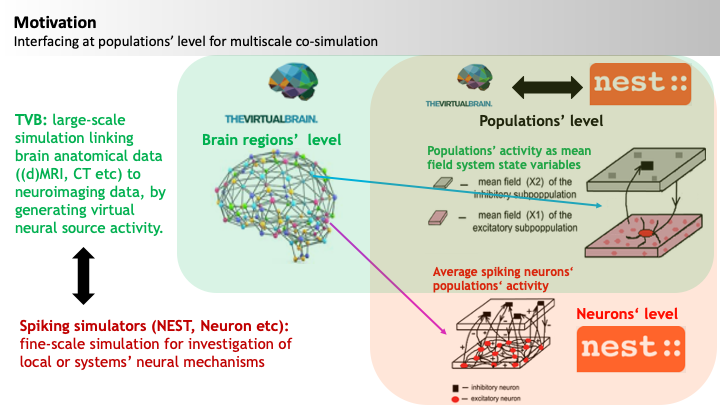

In [3]:
from IPython.core.display import Image, display
display(Image(filename='./pics/ConceptGraph1.png',  width=1000, unconfined=False))

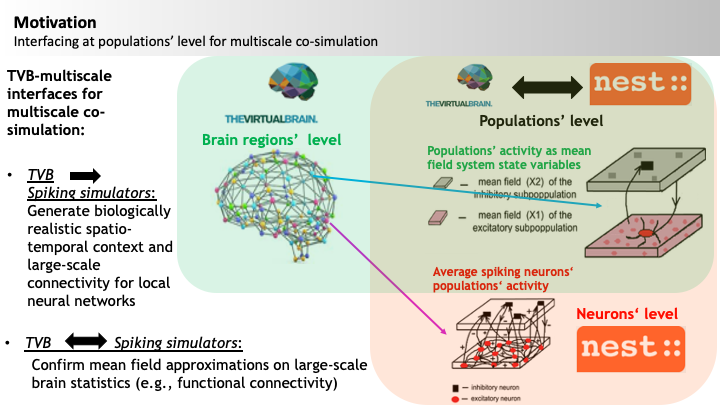

In [4]:
display(Image(filename='./pics/ConceptGraph2.png',  width=1000, unconfined=False))

## tvb-multiscale toolbox:

### https://github.com/the-virtual-brain/tvb-multiscale

For questions use the git issue tracker, or write an e-mail to me: dionysios.perdikis@charite.de

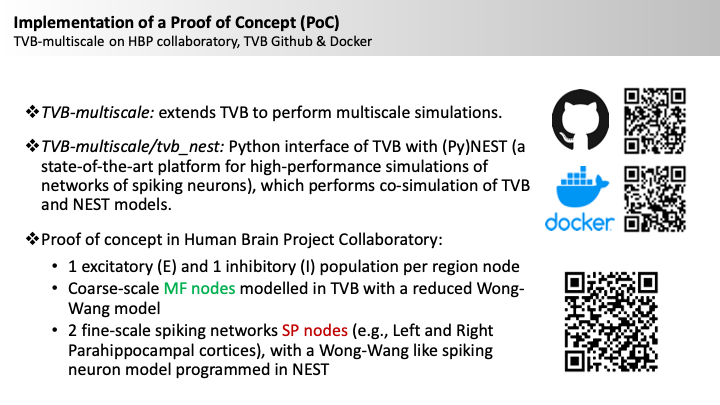

In [5]:
display(Image(filename='./pics/Overview.png',  width=1000, unconfined=False))

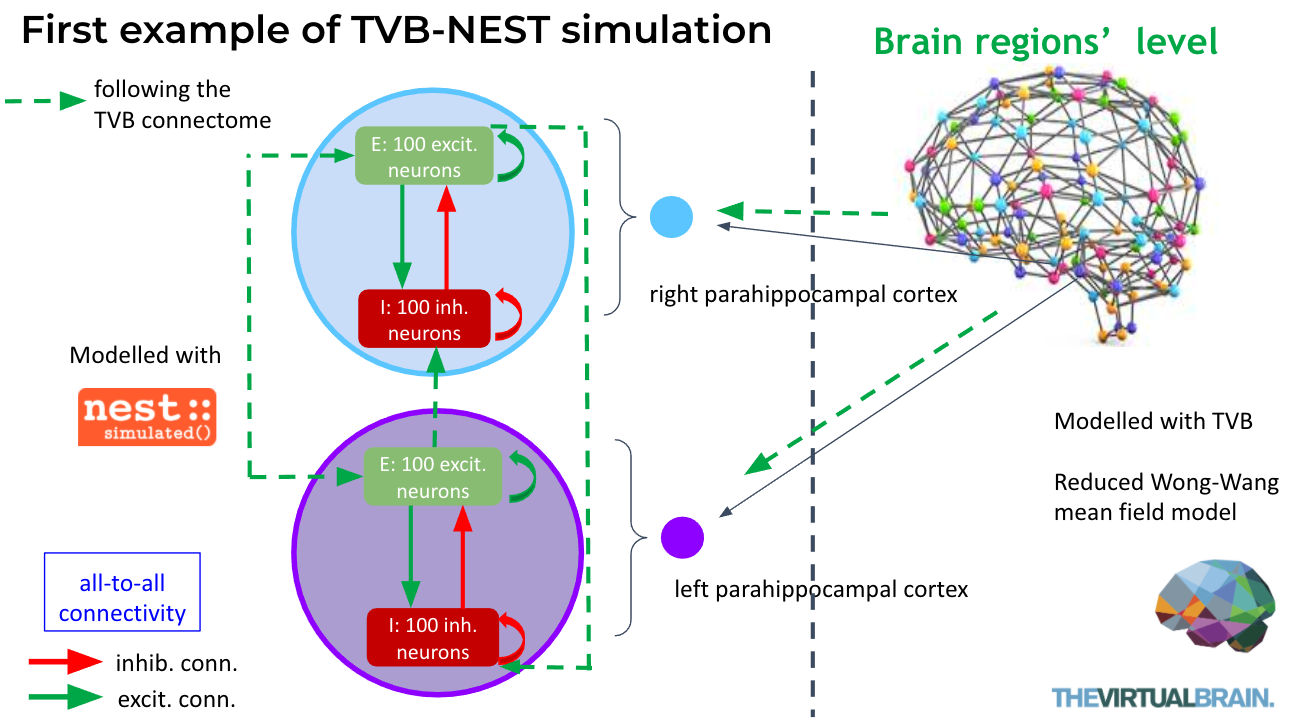

In [6]:
display(Image(filename='./pics/Example_Net.png',  width=1000, unconfined=False))

# TVB - NEST co-simulation with Reduced Wong-Wang model

We demonstrate a multiscale simulation <br> of a reduced Wong-Wang model [3] <br> using TVB [1, 2] for brain region modelled at coarse scale, <br> and NEST [4] for regions modelled as <br> networks of spiking neural populations.

## Reduced Wong-Wang mean field model

For every region node $n\prime$ modelled as a mean-field node in TVB:

(Post)Synaptic gating dynamics (i.e., proportion of synapse channels open at any given time):

$\dot{S_{n\prime}}^{(E)} = - \frac{1}{\tau_E}{S_{n\prime}}^{(E)}(t) + (1-{S_{n\prime}}^{(E)}(t))\gamma_{E} {R_{n\prime}}^{(E)}(t)$

$\dot{S_{n\prime}}^{(I)} = - \frac{1}{\tau_I}{S_{n\prime}}^{(I)}(t) + \gamma_I{R_{n\prime}}^{(I)}(t)$

where we bound ${S_{n\prime}}^{(E/I)}(t) \in $ [0.0, 1.0], 

and $ {R_{n\prime}}^{(E/I)}(t) $ is the postsynaptic firing rate given by:

$ {R_{n\prime}}^{(E/I)}(t) = H({I_{syn_{n\prime}}}^{(E/I)}(t), a_{(E/I)}, b_{(E/I)}, d_{(E/I)}) $

where

$ H({I_{syn_{n\prime}}}^{(E/I)}(t),  a_{(E/I)}, b_{(E/I)}, d_{(E/I)}) = \frac{a_{(E/I)}{I_{syn_{n\prime}}}^{(E/I)}(t)-b_{(E/I)}}{1-e^{-d_{(E/I)}(a_{(E/I)}{I_{syn_{n\prime}}}^{(E/I)}(t)-b_{(E/I)})}}$ 

is a sigmoidal activation function of the input presynaptic current.

The total input presynaptic current to excitatory populations is given by: 

$ {I_{syn_{n\prime}}}^{(E)}(t) = W_EI_o + w_+J_{NMDA}{S_{n\prime}}^{(E)}(t) - J_{{n\prime}}{S_{n\prime}}^{(I)}(t) + GJ_{NMDA}a_c\sum_{{m\prime}\neq {n\prime}}C_{{m\prime}{n\prime}}S_{m\prime}^{(E)}(t-\tau_{{m\prime}{n\prime}})$

and to inhibitory ones:

$ {I_{syn_{n\prime}}}^{(I)}(t) = W_II_o + J_{NMDA}{S_{n\prime}}^{(E)}(t) - {S_{n\prime}}^{(I)}(t) +  \lambda GJ_{NMDA}a_c\sum_{{m\prime}\neq {n\prime}}C_{{m\prime}{n\prime}}S_{m\prime}^{(E)}(t-\tau_{{m\prime}{n\prime}})$

where 
$\lambda  \in$[0, 1] for scaling feedforward inhibition.


## Reduced Wong-Wang mean field model

## Parameters following Ponce-Alvarez et al 2014:

- structural TVB connectivity weights $C_{{m\prime}{n\prime}}$ (${m\prime}->{n\prime}$)
- structural TVB connectivity delays $\tau_{{m\prime}{n\prime}}$  (${m\prime}->{n\prime}$)
- global structural brain connectivity coupling constant $G$
- multiplicative coefficient of TVB's linear ($a_c*x + b_c$) coupling function $a_c=1.0/256$, 
  assuming $b_c=0.0$
- overall effective external input current $I_o = 0.382nA$ 
- excitatory synaptic coupling $J_{NDMA} = 0.15nA$ 
- local feedback inhibitory synaptic coupling $J_{i} = 1.0nA$ 
- local excitatory recurrence $w_+ = 1.4$
- excitatory kinetic parameter $\gamma_E = 0.641 s$
- inhibitory kinetic parameter $\gamma_I = 1.0 s$
- excitatory (NMDA) time constant $\tau_E = \tau_{NMDA}=100ms$ 
- inhibitory (GABA) time constant $\tau_I = \tau_{GABA}=10ms$ 
- excitatory pool scaling constant $W_E = 1.0$
- inhibitory pool scaling constant $W_I = 0.7$
- excitatory sigmoidal functions parameters $a_{E} = 310nC^{-1}$, $b_{E} = 125Hz$, $d_{E} = 0.16s$
- inhibitory sigmoidal functions parameters $a_{I} = 615nC^{-1}$, $b_{I} = 177Hz$, $d_{I} = 0.087s$
- $\lambda = 1$, allowing for feedforward inhibition


## Spiking network model in NEST

For every neuron $i$ in region node $n$ modelled in NEST as a spiking network:


$ C_m{\dot{V}_{ni}}^m = - {I_{ni}}^L(t) - {I_{ni}}^{AMPA}(t) - {I_{ni}}^{NMDA}(t) - {I_{ni} ^{GABA}}(t)- {I_{ni}}^{AMPA,ext}(t)-G\sum_{n\prime n}C_{n\prime \neq n}{I_{n\prime n,i}}^{dc}(t-\tau_{n\prime n}) +{I_{ni}}^{ext}(t) $

$\;\;\;\;\;\;\;\;\;\;=-g_m({V_{ni}}^m(t) - V_L) $
              
$\;\;\;\;\;\;\;\;\;\;\;-g_{AMPA}({V_{ni}}^m(t) - V_E)w_E{S_{ni}}^{AMPA}(t) $

$\;\;\;\;\;\;\;\;\;\;\;-\frac{g_{NMDA}({V_{ni}}^m(t) - V_E)}{1+\lambda_{NMDA}e^{-\beta{V_{ni}}^m(t)}}w_EN_E{S_{ni}}^{NMDA}(t) $

$\;\;\;\;\;\;\;\;\;\;\;-g_{GABA}({V_{ni}}^m(t) - V_I)w_I{S_{ni}}^{GABA}(t) $

$\;\;\;\;\;\;\;\;\;\;\;-g_{AMPA,ext}({V_{ni}}^m(t) - V_E)G\sum_{n\prime \neq n}C_{n\prime \neq n}{S_{n\prime \neq ni}}^{AMPA,ext}(t) $

$\;\;\;\;\;\;\;\;\;\;\;+{I_{ni}}^{ext}(t) $

$ {\dot{S}_{ni}}^{AMPA/GABA} = \frac{1}{\tau_{AMPA/GABA,decay}}(-{S_{ni}}^{AMPA/GABA}(t) + \left[ \sum_{j=1,j \neq i}^{N_{E/I}} \sum_k \delta(t-{t_j}^k) \right]_{j \in n})$

$ {\dot{X}_{ni}}^{NMDA} = \frac{1}{\tau_{NMDA,rise}}(-{X_{ni}}^{NMDA}(t) + \left[ \sum_{j=1,j \neq i}^{N_E} \sum_k \delta(t-{t_j}^k) \right]_{j \in n}) $

$ {\dot{S}_{ni}}^{NMDA} = -\frac{1}{\tau_{NMDA,decay}}{S_{ni}}^{NMDA}(t) + \alpha \frac{{X_{ni}}^{NMDA}(t)}{N_E} (1 - \epsilon{S_{ni}}^{NMDA}(t)) $

$ {\dot{S}_{n\prime \neq ni}}^{AMPA,ext} = \frac{1}{\tau_{AMPA,decay}}(-{S_{n\prime \neq ni}}^{AMPA,ext}(t) + \left[ \sum_{j=1}^{N_E} \sum_k \delta(t-\tau_{n\prime n}-{t_j}^k) \right]_{j \in n\prime, n\prime \neq n} )$

Boundaries assuming that self-connections of neurons are not possible:

For excitatory neurons:

$ {S_{n,exc}}^{AMPA/NMDA}(t) \in [0.0, N_E-1]$

$ {S_{n,exc}}^{GABA}(t) \in [0.0, N_I]$

For inhibitory neurons:

$ {S_{n,inh}}^{AMPA/NMDA}(t) \in [0.0, N_E]$

$ {S_{n,inh}}^{GABA}(t) \in [0.0, N_I-1]$

For all neurons:

$ {S_{n,exc/inh}}^{AMPA,ext}(t) \in [0.0, N_E]$

When $V_m(t) > V_{th}$, emit a spike and clamp $V_m(t)$ to $V_{reset}$ for $\tau_{ref}$ ms.


## TVB to NEST coupling
The term 

$ G\sum_{n\prime n}C_{n\prime \neq n}{I_{n\prime n,i}}^{dc}(t-\tau_{n\prime n})$,

which is scaled by $\lambda$ for inhibitory neurons,

denotes possible inputs by NEST dc current generator devices that can play the role of TVB "proxy" nodes, i.e., mirroring their activity, where

$ I_{n\prime n,i}^{dc}(t) = N_EJ_{NMDA}{S_{n\prime}}^{(E)}(t) $

Similarly, $I_{ni}^{ext}(t)$ is an external current parameter that can be updated at each time step based on the TVB large-scale delayed coupling input towards region node n:

for excitatory neurons:

$I_{n,exc}^{ext}(t) = N_EGJ_{NMDA}\sum_{{n\prime} n}C_{{n\prime}}S_{n\prime}^{(E)}(t-\tau_{{n\prime}n})$

and for inhibitory ones:

$I_{n,inh}^{ext}(t) = N_E\lambda GJ_{NMDA}\sum_{{n\prime}n}C_{{n\prime}n}S_{n\prime}^{(E)}(t-\tau_{{n\prime}n})$

Instead, when TVB couples to NEST via instantaneous spike rate $ N_E{r_{n\prime}}^{(E/I)}(t) $, spike generator NEST devices are also used as TVB "proxy" nodes and generate spike trains 

$ \left[ \sum_k \delta(t-\tau_{n\prime n}-{t_j}^k) \right]_{j \in n\prime} $

Notice that all large-scale input is always scaled with the size of the excitatory population $ N_E $.

## NEST to TVB update

A NEST spike detector device is used to count spike for each time step, and convert it to an instant population mean rate that overrides the TVB state variables $r_e$ and $r_i$ after low pass filtering via a linear dynamical equation:

$ {\dot{r}_{n}}^{E/I}  = -\frac{1}{\tau_{rin_{n}}^{E/I}}({r_{n}}^{E/I}(t) - {r_{in_{n}}}^{E/I}(t)) $

where:

$ {r_{in_{n}}}^{E/I}(t) =  \frac{\sum_j\left[ \sum_k \delta(t-\tau_n-{t_j}^k) \right]_{j \in (E/I)_n}}{N_{(E/I)}} $

and $ \tau_{rin_{n}}^{E/I} = 1.0 ms $ by default


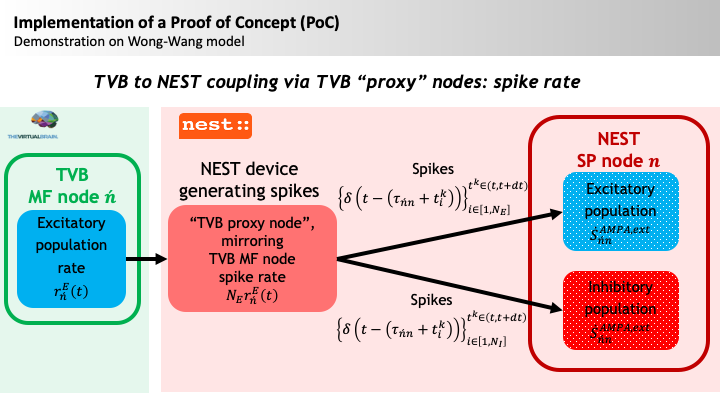

In [4]:
display(Image(filename='./pics/Rate.png',  width=1000, unconfined=False))

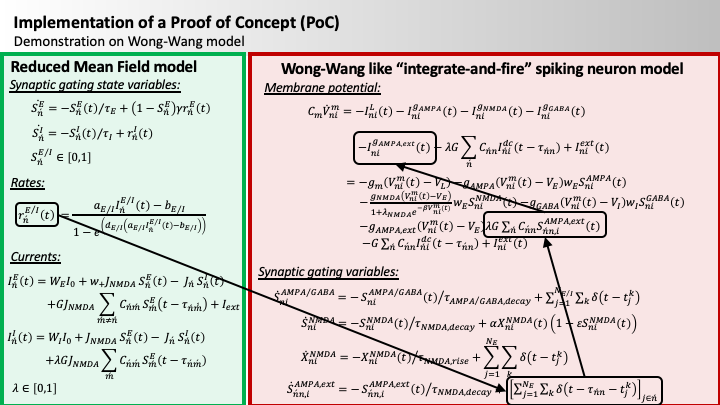

In [5]:
display(Image(filename='./pics/Rate2.png',  width=1000, unconfined=False))

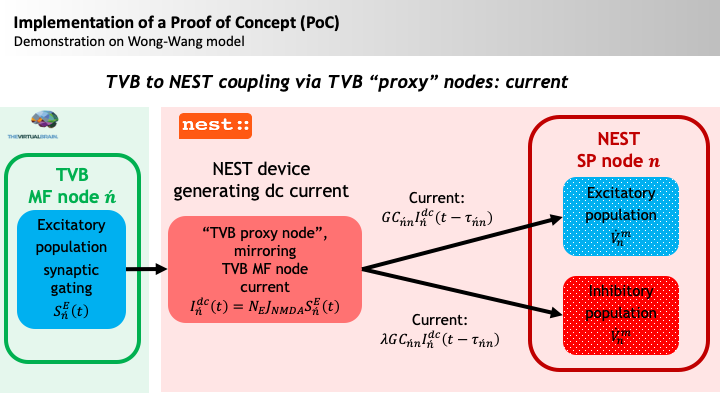

In [6]:
display(Image(filename='./pics/DC.png',  width=1000, unconfined=False))

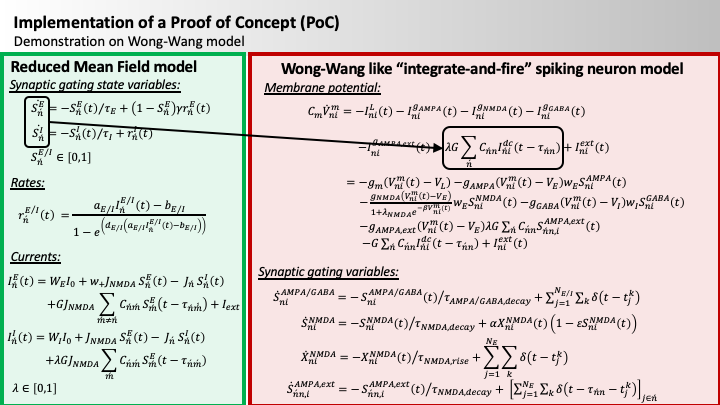

In [7]:
display(Image(filename='./pics/DC2.png',  width=1000, unconfined=False))

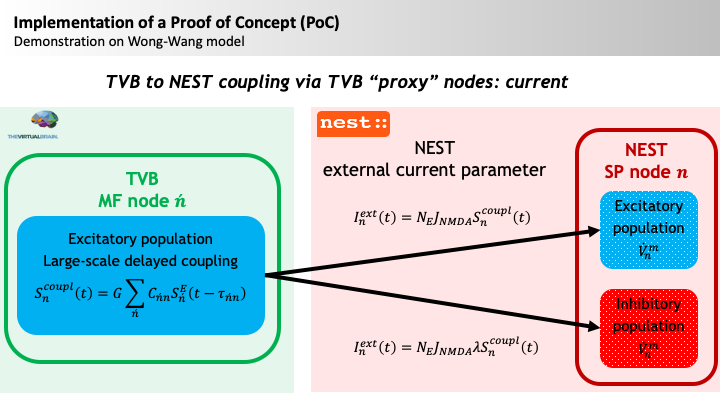

In [8]:
display(Image(filename='./pics/Ie.png',  width=1000, unconfined=False))

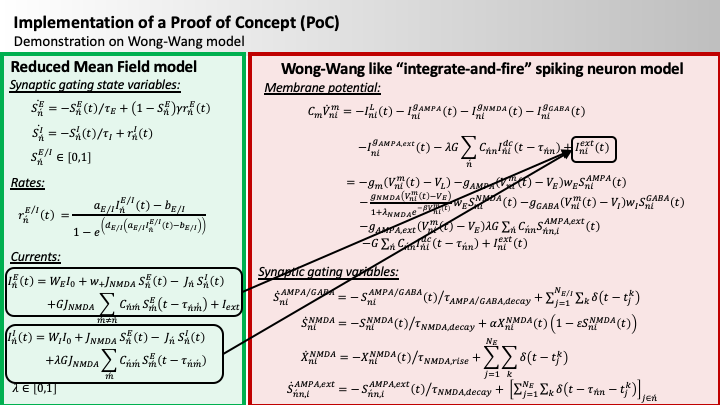

In [9]:
display(Image(filename='./pics/Ie2.png',  width=1000, unconfined=False))

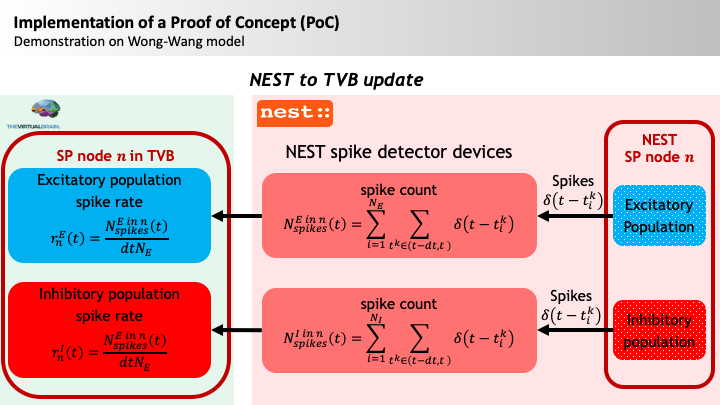

In [10]:
display(Image(filename='./pics/NESTtoTVB.png',  width=1000, unconfined=False))

## Simulator loop

### Simulating several (i.e., 10) NEST time steps for every 1 TVB time step for stable integration

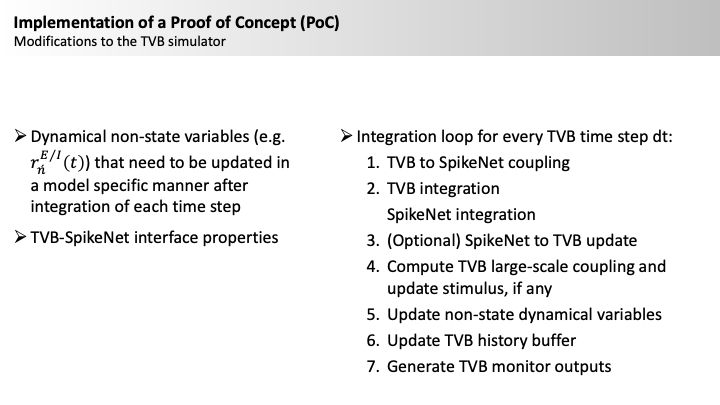

In [11]:
display(Image(filename='./pics/simulator_loop.png',  width=10000, unconfined=False))

# WORKFLOW:

In [12]:
import os

from collections import OrderedDict
import time
import numpy as np

from tvb.basic.profile import TvbProfile
TvbProfile.set_profile(TvbProfile.LIBRARY_PROFILE)

from tvb_multiscale.tvb_nest.config import *

work_path = os.getcwd()
data_path = os.path.join(work_path.split("tvb_nest")[0], "data")
outputs_path = os.path.join(work_path, "outputs/RedWongWang")
config = Config(output_base=outputs_path)

config.figures.SHOW_FLAG = True 
config.figures.SAVE_FLAG = True
config.figures.FIG_FORMAT = 'png'
config.figures.DEFAULT_SIZE= config.figures.NOTEBOOK_SIZE
FIGSIZE = config.figures.DEFAULT_SIZE

from tvb_multiscale.core.plot.plotter import Plotter
plotter = Plotter(config.figures)

# For interactive plotting:
# %matplotlib notebook  

# Otherwise:
%matplotlib inline 


2021-04-28 11:10:17,730 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2021-04-28 11:10:17,730 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2021-04-28 11:10:17,733 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2021-04-28 11:10:17,733 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2021-04-28 11:10:17,736 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2021-04-28 11:10:17,736 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2021-04-28 11:10:17,739 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2021-04-28 11:10:17,739 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2021-04-28 11:10:17,742 - INFO - tvb_multiscale.tv

## 1. Load structural data <br> (minimally a TVB connectivity)  <br> & prepare TVB simulator  <br> (region mean field model, integrator, monitors etc)

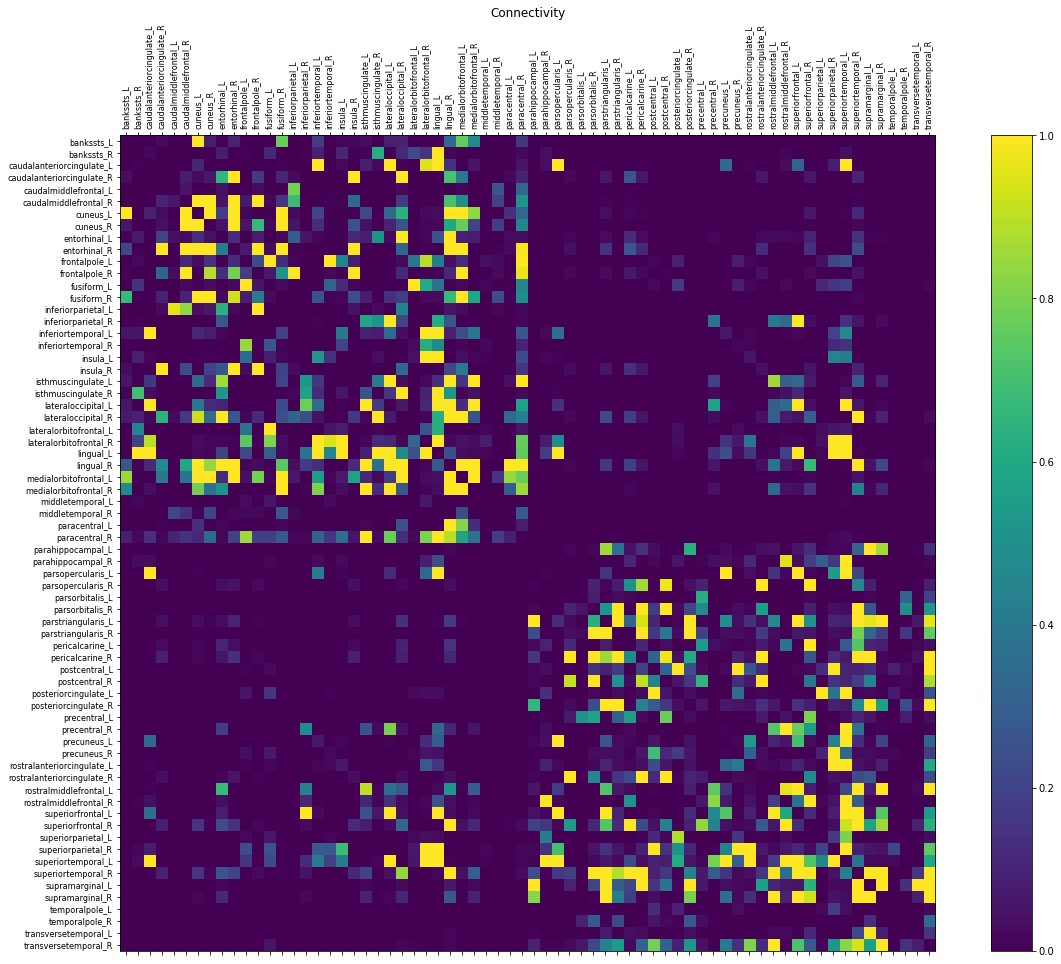

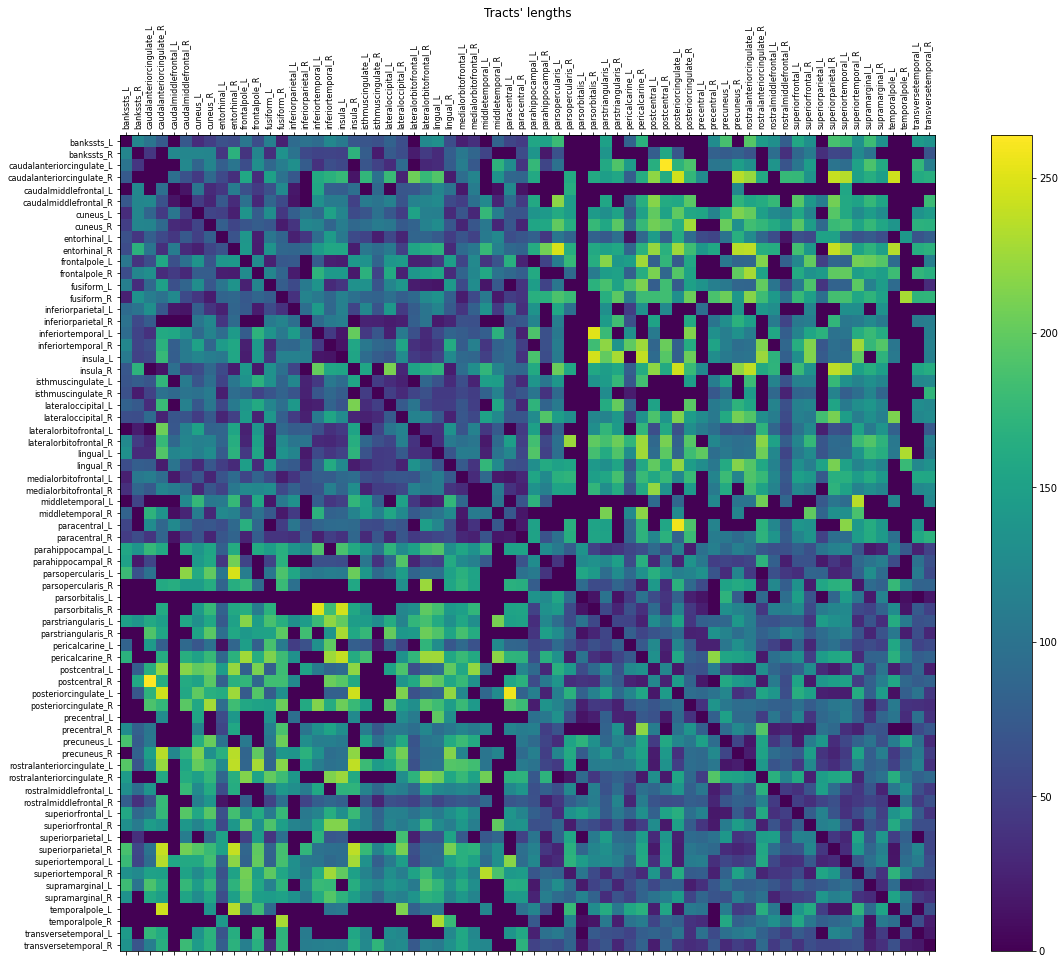

In [13]:
from tvb_multiscale.core.tvb.cosimulator.models.reduced_wong_wang_exc_io_inh_i import ReducedWongWangExcIOInhI
from tvb_multiscale.core.tvb.cosimulator.cosimulator_builder import CoSimulatorBuilder



# # ----------------------1. Build a TVB simulator (model, integrator, monitors...)----------------------------------
# simulator_builder = CoSimulatorBuilder()
# simulator_builder.connectivity = config.DEFAULT_CONNECTIVITY_ZIP
# simulator_builder.model = ReducedWongWangExcIOInhI
# model_params = {"G": np.array([2.0, ]), "lamda": np.array([0., ]), 
#                 "w_p": np.array([1.4, ]), "J_i": np.array([1.0, ])}
# simulator = simulator_builder.build(**model_params)


# Optionally modify the default configuration:

# ----------------------------------------------------------------------------------------------------------------
# ----Uncomment below to modify the simulator by changing the default options:--------------------------------------
# ----------------------------------------------------------------------------------------------------------------

from tvb.datatypes.connectivity import Connectivity
from tvb.simulator.cosimulator import CoSimulator
from tvb.simulator.integrators import HeunStochastic
from tvb.simulator.monitors import Raw  # , Bold, EEG
    
# Load connectivity
connectivity = Connectivity.from_file(config.DEFAULT_CONNECTIVITY_ZIP)
# Normalize connectivity weights
connectivity.weights = connectivity.scaled_weights(mode="region")
connectivity.weights /= np.percentile(connectivity.weights, 95)
connectivity.weights[connectivity.weights>1.0] = 1.0
connectivity.configure()

# Create a TVB simulator and set all desired inputs
# (connectivity, model, surface, stimuli etc)
# We choose all defaults in this example
simulator = CoSimulator()
simulator.model = ReducedWongWangExcIOInhI()
simulator.model.G = np.array([2.0, ])     # Global cloupling scaling
simulator.model.lamda = np.array([0.0, ]) # Feedforward inhibition
simulator.model.w_p = np.array([1.4, ])   # Feedback excitation
simulator.model.J_i = np.array([1.0, ])   # Feedback inhibition

simulator.connectivity = connectivity

simulator.integrator = HeunStochastic()
simulator.integrator.dt = 0.1
simulator.integrator.noise.nsig = np.array([1e-6])

# Setting initial conditions
# convert time delays to integration step delays:
simulator.connectivity.set_idelays(simulator.integrator.dt) 
# determine the history horizon (past states buffer)
simulator.horizon = simulator.connectivity.idelays.max() + 1
# # The initial conditions must have a shape of 
# # (past_time_horizon, number_of_variables, number_of_regions, number_of_modes)
# init_cond = np.load(os.path.join(config.out.FOLDER_RES, "init_cond.npy"))
# simulator.initial_conditions = init_cond * np.ones((simulator.horizon,
#                                                     simulator.model.nvar,
#                                                     simulator.connectivity.number_of_regions,
#                                                     simulator.model.number_of_modes))

mon_raw = Raw(period=1.0)  # ms
simulator.monitors = (mon_raw, )

# ----------------------------------------------------------------------------------------------------------------
# ----Uncomment below to modify the builder by changing the default options:--------------------------------------
# ----------------------------------------------------------------------------------------------------------------

plotter.plot_tvb_connectivity(simulator.connectivity);


## 2. Build and connect the NEST network model <br> (networks of spiking neural populations for fine-scale <br>regions, stimulation devices, spike recorders etc)

In [14]:
# Select the regions for the fine scale modeling with NEST spiking networks
number_of_regions = simulator.connectivity.region_labels.shape[0]
nest_nodes_ids = []  # the indices of fine scale regions modeled with NEST
# We model parahippocampal cortices (left and right) with NEST
for id in range(number_of_regions):
    if simulator.connectivity.region_labels[id].find("hippo") > 0:
        nest_nodes_ids.append(id)
        
from tvb_multiscale.tvb_nest.nest_models.models.ww_deco import WWDeco2014Builder

# Build a NEST network model with the corresponding builder
nest_model_builder = WWDeco2014Builder(simulator, nest_nodes_ids, config=config)
nest_model_builder.configure()

N_E = int(nest_model_builder.population_order * nest_model_builder.scale_e)
N_I = int(nest_model_builder.population_order * nest_model_builder.scale_i)


# # Using all default parameters for this example
nest_model_builder.set_defaults()

# or...

# ----------------------------------------------------------------------------------------------------------------
# ----Uncomment below to modify the builder by changing the default options:--------------------------------------
# ----------------------------------------------------------------------------------------------------------------
from copy import deepcopy

population_neuron_model = "iaf_cond_ww_deco"

nest_model_builder.population_order = 100

nest_model_builder.scale_e = 1.6
nest_model_builder.scale_i = 0.4

N_E = int(nest_model_builder.population_order * nest_model_builder.scale_e)
N_I = int(nest_model_builder.population_order * nest_model_builder.scale_i)

nest_model_builder.global_coupling_scaling = \
    nest_model_builder.tvb_serial_sim["coupling.a"][0].item() * \
    nest_model_builder.tvb_serial_sim["model.G"][0].item()
nest_model_builder.lamda = nest_model_builder.tvb_serial_sim["model.lamda"][0].item()


# When any of the properties model, params and scale below depends on regions,
# set a handle to a function with
# arguments (region_index=None) returning the corresponding property

def param_fun(node_index, params, weight):
    w_E_ext = \
        weight * nest_model_builder.tvb_weights[:, node_index]
    w_E_ext[node_index] = 1.0  # this is external input weight to this node
    out_params = deepcopy(params)
    out_params.update({"w_E_ext": w_E_ext})
    return out_params
    

common_params = {
    "V_th": -50.0, "V_reset": -55.0, "E_L": -70.0, "E_ex": 0.0, "E_in": -70.0,                       # mV
    "tau_decay_AMPA": 2.0, "tau_decay_GABA_A": 10.0, "tau_decay_NMDA": 100.0, "tau_rise_NMDA": 2.0,  # ms
    "s_AMPA_ext_max": N_E * np.ones((nest_model_builder.number_of_regions,)).astype("f"), 
    "N_E": N_E, "N_I": N_I, "epsilon": 1.0  # /N_E
}
params_E = {
    "C_m": 500.0,    # pF
    "g_L": 25.0,     # nS
    "t_ref": 2.0,    # ms
    "g_AMPA_ext": 3.37, "g_AMPA": 0.065, "g_NMDA": 0.20, "g_GABA_A": 10.94,  # nS
    "w_E": nest_model_builder.tvb_serial_sim["model.w_p"][0].item(), 
    "w_I": nest_model_builder.tvb_serial_sim["model.J_i"][0].item()
}
params_E.update(common_params)
nest_model_builder.params_E = \
    lambda node_index: param_fun(node_index, params_E,
                                 weight=nest_model_builder.global_coupling_scaling)

params_I = {
    "C_m": 200.0,  # pF
    "g_L": 20.0,   # nS
    "t_ref": 1.0,  # ms
    "g_AMPA_ext": 2.59, "g_AMPA": 0.051,"g_NMDA": 0.16, "g_GABA_A": 8.51,  # nS
    "w_E": 1.0, "w_I": 1.0
}
params_I.update(common_params)
nest_model_builder.params_I = \
    lambda node_index: param_fun(node_index, params_I,
                                 weight=nest_model_builder.lamda * nest_model_builder.global_coupling_scaling)

# Populations' configurations
# When any of the properties model, params and scale below depends on regions,
# set a handle to a function with
# arguments (region_index=None) returning the corresponding property
nest_model_builder.populations = [
    {"label": "E", "model": population_neuron_model,
     "nodes": None,  # None means "all"
     "params": nest_model_builder.params_E,
     "scale": nest_model_builder.scale_e},
    {"label": "I", "model": population_neuron_model,
     "nodes": None,  # None means "all"
     "params": nest_model_builder.params_I,
     "scale": nest_model_builder.scale_i}
  ]

# Within region-node connections
# When any of the properties model, conn_spec, weight, delay, receptor_type below
# set a handle to a function with
# arguments (region_index=None) returning the corresponding property
synapse_model = "static_synapse"
conn_spec = {"allow_autapses": True, 'allow_multapses': True, 'rule': "all_to_all",
             "indegree": None, "outdegree": None, "N": None, "p": 0.1}

w_E = 1.0 
w_I = -1.0 

within_node_delay = nest_model_builder.default_min_delay

nest_model_builder.populations_connections = [
     #              ->
    {"source": "E", "target": "E",  # E -> E This is a self-connection for population "E"
     "synapse_model": synapse_model, "conn_spec": conn_spec,
     "weight": w_E, "delay": within_node_delay,
     "receptor_type": 0, "nodes": None},  # None means apply to all
    {"source": "E", "target": "I",  # E -> I
     "synapse_model": synapse_model, "conn_spec": conn_spec,
     "weight": w_E, "delay": within_node_delay,
     "receptor_type": 0, "nodes": None},  # None means apply to all
    {"source": "I", "target": "E",  # I -> E
     "synapse_model": synapse_model, "conn_spec": conn_spec, 
     "weight": w_I, "delay": within_node_delay,
     "receptor_type": 0, "nodes": None},  # None means apply to all
    {"source": "I", "target": "I",  # I -> I This is a self-connection for population "I"
     "synapse_model": synapse_model, "conn_spec": conn_spec,
     "weight": w_I, "delay": within_node_delay,
     "receptor_type": 0, "nodes": None}  # None means apply to all
    ]


# Among/Between region-node connections
# Given that only the AMPA population of one region-node couples to
# all populations of another region-node,
# we need only one connection type
        
# When any of the properties model, conn_spec, weight, delay, receptor_type below
# depends on regions, set a handle to a function with
# arguments (source_region_index=None, target_region_index=None)

from tvb_multiscale.core.spiking_models.builders.templates import tvb_delay
from tvb_multiscale.tvb_nest.nest_models.builders.nest_templates import random_uniform_tvb_delay
    
lamda = nest_model_builder.tvb_serial_sim["model.lamda"][0]

tvb_delay_fun = lambda source_node, target_node: \
                 tvb_delay(source_node, target_node, nest_model_builder.tvb_delays)
#                  random_uniform_tvb_delay(source_node, target_node, nest_model_builder.tvb_delays, 
#                                           low=nest_model_builder.tvb_dt, 
#                                           high=2*nest_model_builder.tvb_dt, 
#                                           sigma=0.1)

receptor_by_source_region = lambda source_node, target_node: int(source_node + 1)

# Total excitatory spikes of one region node will be distributed to
nest_model_builder.nodes_connections = [
    #              ->
    {"source": "E", "target": ["E"],
     "synapse_model": synapse_model, "conn_spec": conn_spec,
     "weight": w_E, "delay": tvb_delay_fun,  
    # Each region emits spikes in its own port:
     "receptor_type": receptor_by_source_region,
     "source_nodes": None, "target_nodes": None}  # None means apply to all
    ]

if lamda > 0:
    nest_model_builder.nodes_connections.append(
        {"source": "E", "target": ["I"],
         "synapse_model": synapse_model, "conn_spec": conn_spec,
         "weight": w_E, "delay": tvb_delay_fun,  
        # Each region emits spikes in its own port:
         "receptor_type": receptor_by_source_region,
         "source_nodes": None, "target_nodes": None}  # None means apply to all
    )
    
    
# Creating  devices to be able to observe NEST activity:

nest_model_builder.output_devices = []

connections = OrderedDict({})
#          label <- target population
connections["E_spikes"] = "E"
connections["I_spikes"] = "I"
nest_model_builder.output_devices.append(
    {"model": "spike_recorder", "params": {"record_to": "memory"},
     "connections": connections, "nodes": None})  # None means apply to all

# Labels have to be different

connections = OrderedDict({})
#               label    <- target population
connections["E"] = "E"
connections["I"] = "I"
record_from = ["V_m", "I_L", "I_e",
               "spikes_exc", "s_AMPA", "I_AMPA",
               "x_NMDA", "s_NMDA", "I_NMDA",
               "spikes_inh", "s_GABA", "I_GABA"]
for i_node in range(nest_model_builder.number_of_regions):
    record_from.append("spikes_exc_ext_%d" % i_node)
    record_from.append("s_AMPA_ext_%d" % i_node)
    record_from.append("I_AMPA_ext_%d" % i_node)
params = {"interval": 1.0, 'record_from': record_from, "record_to": "memory"}  # ms
nest_model_builder.output_devices.append(
    {"model": "multimeter", "params": params,
     "connections": connections, "nodes": None})  # None means apply to all
    

# Create a spike stimulus input device
nest_model_builder.input_devices = [
    {"model": "poisson_generator",
     "params": {"rate": 2400.0, "origin": 0.0, "start": 0.1},  # "stop": 100.0
     "connections": {"Stimulus": ["E", "I"]}, 
     "nodes": None,         # None means apply to all
     "weights": w_E, 
     "delays": nest_model_builder.tvb_dt, 
    "receptor_type": lambda target_node: int(target_node + 1)},
                                  ]  #

# ----------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------

nest_network = nest_model_builder.build(set_defaults=False) # or true, if nest_model_builder.set_default() is not yet ran



2021-04-28 11:10:33,973 - INFO - tvb_multiscale.tvb_nest.nest_models.builders.base - Trying to install module iaf_cond_ww_decomodule...
2021-04-28 11:10:33,973 - INFO - tvb_multiscale.tvb_nest.nest_models.builders.base - Trying to install module iaf_cond_ww_decomodule...
2021-04-28 11:10:33,991 - INFO - tvb_multiscale.tvb_nest.nest_models.builders.base - DONE installing module iaf_cond_ww_decomodule!
2021-04-28 11:10:33,991 - INFO - tvb_multiscale.tvb_nest.nest_models.builders.base - DONE installing module iaf_cond_ww_decomodule!
2021-04-28 11:10:34,105 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model spike_recorder for E_spikes created!
2021-04-28 11:10:34,105 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model spike_recorder for E_spikes created!
2021-04-28 11:10:34,170 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_

In [15]:
# print(nest_network.print_str(connectivity=True))

## 3. Build the TVB-NEST interface

In [16]:
from tvb_multiscale.tvb_nest.interfaces.models.builders.red_ww import \
    RedWWexcIOinhIBuilder as InterfaceRedWWexcIOinhIBuilder

# Build a TVB-NEST interface with all the appropriate connections between the
# TVB and NEST modelled regions
tvb_nest_builder = \
    InterfaceRedWWexcIOinhIBuilder(simulator, nest_network, nest_nodes_ids, 
                                   exclusive_nodes=True, populations_sizes=[N_E, N_I])

tvb_to_nest_mode = "rate"  # "rate", "current", "param"
nest_to_tvb = True

# Using all default parameters for this example

# or...


# ----------------------------------------------------------------------------------------------------------------
# ----Uncomment below to modify the builder by changing the default options:--------------------------------------
# ----------------------------------------------------------------------------------------------------------------

from tvb_multiscale.core.spiking_models.builders.templates import tvb_delay, scale_tvb_weight
from tvb_multiscale.tvb_nest.nest_models.builders.nest_templates \
    import random_normal_tvb_weight, random_uniform_tvb_delay, receptor_by_source_region

lamda = nest_model_builder.tvb_serial_sim["model.lamda"][0].item()
G = nest_model_builder.tvb_serial_sim["model.G"][0].item()
tvb_nest_builder.global_coupling_scaling = G * nest_model_builder.tvb_serial_sim["coupling.a"][0].item()


# TVB -> NEST

if tvb_to_nest_mode in ["rate", "current"]:

    tvb_delay_fun = lambda tvb_node_id, nest_node_id: \
                        tvb_delay(tvb_node_id, nest_node_id, tvb_nest_builder.tvb_delays)
#                         random_uniform_tvb_delay(tvb_node_id, nest_node_id, tvb_nest_builder.tvb_delays,
#                                                  low=tvb_nest_builder.tvb_dt, 
#                                                  high=2*tvb_nest_builder.tvb_dt,
#                                                  sigma=0.1)

# --------For spike transmission from TVB to NEST devices acting as TVB proxy nodes with TVB delays:--------

# Mean spike rates are applied in parallel to all target neurons

if tvb_to_nest_mode == "rate":
    weights = 1.0 # 
    receptor_by_source_region = lambda source_node, target_node: int(source_node + 1)
    
    tvb_nest_builder.tvb_to_spikeNet_interfaces = [
        {"model": "inhomogeneous_poisson_generator",
         "params": {"allow_offgrid_times": False},
    # # ---------Properties potentially set as function handles with args (tvb_node_id=None)-------------------------
         "interface_weights": 1.0 * N_E, # Convert mean value to total value
    # Applied outside NEST for each interface device
    # -------Properties potentially set as function handles with args (tvb_node_id=None, nest_node_id=None)-----------
        "weights": weights, "delays": tvb_delay_fun,
        "receptor_type": receptor_by_source_region,
        # --------------------------------------------------------------------------------------------------------------
        #             TVB sv -> NEST population
        "connections": {"R_e": ["E"]},
        "source_nodes": None, "target_nodes": None}]  # None means all here

    if lamda > 0.0:
        tvb_nest_builder.tvb_to_spikeNet_interfaces.append(
            {"model": "inhomogeneous_poisson_generator",
             "params": {"allow_offgrid_times": False},
        # # ---------Properties potentially set as function handles with args (tvb_node_id=None)-------------------------
             "interface_weights": 1.0 * N_E, # Convert mean value to total value
        # Applied outside NEST for each interface device
        # -------Properties potentially set as function handles with args (tvb_node_id=None, nest_node_id=None)-----------
            "weights": weights, "delays": tvb_delay_fun,
            "receptor_type": receptor_by_source_region,
            # --------------------------------------------------------------------------------------------------------------
            #             TVB sv -> NEST population
            "connections": {"R_e": ["I"]},
            "source_nodes": None, "target_nodes": None
            }
        )


    
# Mean currents are distributed to all target neurons


if tvb_to_nest_mode == "current":
    
    tvb_weight_fun = \
        lambda tvb_node_id, nest_node_id: \
            scale_tvb_weight(tvb_node_id, nest_node_id, tvb_nest_builder.tvb_weights, 
                             scale=tvb_nest_builder.global_coupling_scaling)
#             random_normal_tvb_weight(tvb_node_id, nest_node_id, tvb_nest_builder.tvb_weights, 
#                                      scale=tvb_nest_builder.global_coupling_scaling, sigma=0.1)

    # --------For injecting current to NEST neurons via dc generators acting as TVB proxy nodes with TVB delays:--------

    tvb_nest_builder.tvb_to_spikeNet_interfaces = [
        {"model": "dc_generator", "params": {},
    # Properties potentially set as function handles with args (tvb_node_id=None)
    #   Applied outside NEST for each interface device
         "interface_weights": 17.5,  # N_E / N_E
    # Properties potentially set as function handles with args (tvb_node_id=None, nest_node_id=None)
         "weights": tvb_weight_fun,
         "delays": tvb_delay_fun,
    #                   TVB sv -> NEST population
         "connections": {"S_e": ["E"]},
         "source_nodes": None, "target_nodes": None}]  # None means all here

    if lamda > 0.0:
        tvb_nest_builder.tvb_to_spikeNet_interfaces.append(
           {"model": "dc_generator", "params": {},
        # ---------Properties potentially set as function handles with args (tvb_node_id=None)
        #   Applied outside NEST for each interface device
             "interface_weights": lamda * N_E / N_I,
        # Properties potentially set as function handles with args (tvb_node_id=None, nest_node_id=None)
             "weights": tvb_weight_fun,
             "delays": tvb_delay_fun,
        #                  TVB sv -> NEST population
             "connections": {"S_e": ["I"]},
             "source_nodes": None, "target_nodes": None}
        )


if tvb_to_nest_mode == "param":

    # --------For directly setting an external current parameter in NEST neurons instantaneously:--------
    tvb_nest_builder.tvb_to_spikeNet_interfaces = [
        {"model": "current",  "parameter": "I_e",
    # Properties potentially set as function handles with args (tvb_node_id=None)
         "interface_weights": G,  # N_E / N_E
    #                  TVB sv -> NEST population
         "connections": {"S_e": ["E"]},
         "nodes": None}]  # None means all here
    if lamda > 0.0:
        # Coupling to inhibitory populations as well (feedforward inhibition):
        tvb_nest_builder.tvb_to_spikeNet_interfaces.append(
        {
            "model": "current", "parameter": "I_e",
    # Properties potentially set as function handles with args (tvb_node_id=None)
            "interface_weights": lamda * G * N_E / N_I,
    #                     TVB sv -> NEST population
            "connections": {"S_e": ["I"]},
            "nodes": None}
    )

    

if nest_to_tvb:
    # NEST -> TVB:
    # Use S_e and S_i instead of r_e and r_i
    # for transmitting to the TVB state variables directly
    connections = OrderedDict()
    #            TVB <- NEST
    connections["Rin_e"] = ["E"]
    connections["Rin_i"] = ["I"]
    tvb_nest_builder.spikeNet_to_tvb_interfaces = [
        {"model": "spike_recorder", "params": {},
    # ------------------Properties potentially set as function handles with args (nest_node_id=None)--------------------
         "interface_weights": 1.0, "delays": 0.0,
    # -----------------------------------------------------------------------------------------------------------------
         "connections": connections, "nodes": None}]  # None means all here

    
tvb_nest_builder.w_tvb_to_current = 1000 * nest_model_builder.tvb_serial_sim["model.J_N"][0]  # (nA of TVB -> pA of NEST)
# WongWang model parameter r is in Hz, just like poisson_generator assumes in NEST:
tvb_nest_builder.w_tvb_to_spike_rate = 1.0
# We return from a NEST spike_detector the ratio number_of_population_spikes / number_of_population_neurons
# for every TVB time step, which is usually a quantity in the range [0.0, 1.0],
# as long as a neuron cannot fire twice during a TVB time step, i.e.,
# as long as the TVB time step (usually 0.001 to 0.1 ms)
# is smaller than the neurons' refractory time, t_ref (usually 1-2 ms)
# For conversion to a rate, one has to do:
# w_spikes_to_tvb = 1/tvb_dt, to get it in spikes/ms, and
# w_spikes_to_tvb = 1000/tvb_dt, to get it in Hz
# given WongWang model parameter r is in Hz but tvb dt is in ms:
tvb_nest_builder.w_spikes_to_tvb = 1000.0 / tvb_nest_builder.tvb_dt
# ----------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------------------

tvb_nest_model = tvb_nest_builder.build_interface(tvb_to_spikeNet_mode=tvb_to_nest_mode, spikeNet_to_tvb=nest_to_tvb)


2021-04-28 11:10:35,056 - INFO - tvb_multiscale.core.interfaces.base - <class 'tvb_multiscale.tvb_nest.interfaces.models.models.RedWWexcIOinhI'> created!
2021-04-28 11:10:35,056 - INFO - tvb_multiscale.core.interfaces.base - <class 'tvb_multiscale.tvb_nest.interfaces.models.models.RedWWexcIOinhI'> created!
2021-04-28 11:10:35,059 - INFO - tvb_multiscale.tvb_nest.interfaces.models.models - <class 'tvb_multiscale.tvb_nest.interfaces.models.models.RedWWexcIOinhI'> created!
2021-04-28 11:10:35,059 - INFO - tvb_multiscale.tvb_nest.interfaces.models.models - <class 'tvb_multiscale.tvb_nest.interfaces.models.models.RedWWexcIOinhI'> created!
2021-04-28 11:10:35,076 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model inhomogeneous_poisson_generator for R_e created!
2021-04-28 11:10:35,076 - INFO - tvb_multiscale.core.spiking_models.devices - <class 'tvb_multiscale.core.spiking_models.devices.DeviceSet'> of model inhomogen

In [17]:
print(tvb_nest_model.print_str(detailed_output=True, connectivity=False))


----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
RedWWexcIOinhI TVB-NEST Interface


----------------------------------------------------------------------------------------------------


TVB to spikeNet interfaces:

----------------------------------------------------------------------------------------------------

Index: 0_R_e->['E']

TVBtoNESTInhomogeneousPoissonGeneratorInterface
Name: R_e, TVB state variable indice: 2, 
Interface weights: [160.0]
Source TVB nodes' indices:
0...33, 36...67 
Target NEST nodes' indices:
34...35 
TVBtoNESTInhomogeneousPoissonGeneratorInterface - Name: R_e, Model: inhomogeneous_poisson_generator,
Devices:
-----------------------------------------------------------------------------------------------

In [18]:
# for ii in range(len(tvb_nest_builder.tvb_to_spikeNet_interfaces)):
#     print("Interface=%d" % ii)
#     for key in tvb_nest_builder.tvb_to_spikeNet_interfaces[ii].keys():
#         print(key)
#         print(tvb_nest_builder.tvb_to_spikeNet_interfaces[ii][key])


## 4. Configure simulator, simulate, gather results

In [19]:
# Configure the simulator with the TVB-NEST interface...
simulator.configure(tvb_spikeNet_interface=tvb_nest_model)
# ...and simulate!
t = time.time()
simulation_length=110.0  # Set at least 1100.0 for a meaningful simulation
transient = simulation_length/11
results = simulator.run(simulation_length=simulation_length)
# Integrate NEST one more NEST time step so that multimeters get the last time point
# unless you plan to continue simulation later
simulator.run_spiking_simulator(simulator.tvb_spikeNet_interface.nest_instance.GetKernelStatus("resolution"))
print("\nSimulated in %f secs!" % (time.time() - t))

...10.0% done in 4.7 sec
...20.0% done in 9.8 sec
...30.0% done in 14.4 sec
...40.0% done in 18.7 sec
...50.0% done in 24.2 sec
...60.0% done in 28.5 sec
...70.0% done in 32.9 sec
...80.0% done in 37.9 sec
...90.0% done in 42.5 sec
...100.0% done in 46.9 sec

Simulated in 47.058776 secs!


In [20]:
# Clean-up NEST simulation
simulator.tvb_spikeNet_interface.nest_instance.Cleanup()

## 5. Plot results and write them to HDF5 files

In [21]:
# set to False for faster plotting of only mean field variables and dates, apart from spikes" rasters:
from scipy.io import savemat
plot_per_neuron = False 
MAX_VARS_IN_COLS = 3
MAX_REGIONS_IN_ROWS = 10
MIN_REGIONS_FOR_RASTER_PLOT = 9
# from examples.plot_write_results import plot_write_results
# populations = []
# populations_sizes = []
# for pop in nest_model_builder.populations:
#     populations.append(pop["label"])
#     populations_sizes.append(int(np.round(pop["scale"] * nest_model_builder.population_order)))
# plot_write_results(results, simulator, populations=populations, populations_sizes=populations_sizes, 
#                    transient=transient, tvb_state_variable_type_label="State Variables", 
#                    tvb_state_variables_labels=simulator.model.variables_of_interest, 
#                    plot_per_neuron=plot_per_neuron, plotter=plotter, config=config)

In [22]:
# If you want to see what the function above does, take the steps, one by one
try:
    # We need framework_tvb for writing and reading from HDF5 files
    from tvb_multiscale.tvb.core.io.h5_writer import H5Writer
    writer = H5Writer()
except:
    writer = False
    
from tvb.contrib.scripts.datatypes.time_series import TimeSeriesRegion
from tvb.contrib.scripts.datatypes.time_series_xarray import TimeSeriesRegion as TimeSeriesXarray

# Put the results in a Timeseries instance
from tvb.contrib.scripts.datatypes.time_series import TimeSeriesRegion

source_ts = TimeSeriesXarray(  # substitute with TimeSeriesRegion fot TVB like functionality
        data=results[0][1], time=results[0][0]-results[0][0][0],
        connectivity=simulator.connectivity,
        labels_ordering=["Time", "State Variable", "Region", "Neurons"],
        labels_dimensions={"State Variable": list(simulator.model.variables_of_interest),
                           "Region": simulator.connectivity.region_labels.tolist()},
        sample_period=simulator.integrator.dt)
source_ts.configure()

t = source_ts.time
    
# np.save(os.path.join(config.out.FOLDER_RES, "init_cond.npy"), results[0][1][-100:].mean(axis=0))

# Write to file
if writer:
    writer.write_tvb_to_h5(TimeSeriesRegion().from_xarray_DataArray(source_ts._data,
                                                                    connectivity=source_ts.connectivity),
                           os.path.join(config.out.FOLDER_RES, source_ts.title)+".h5")
source_ts

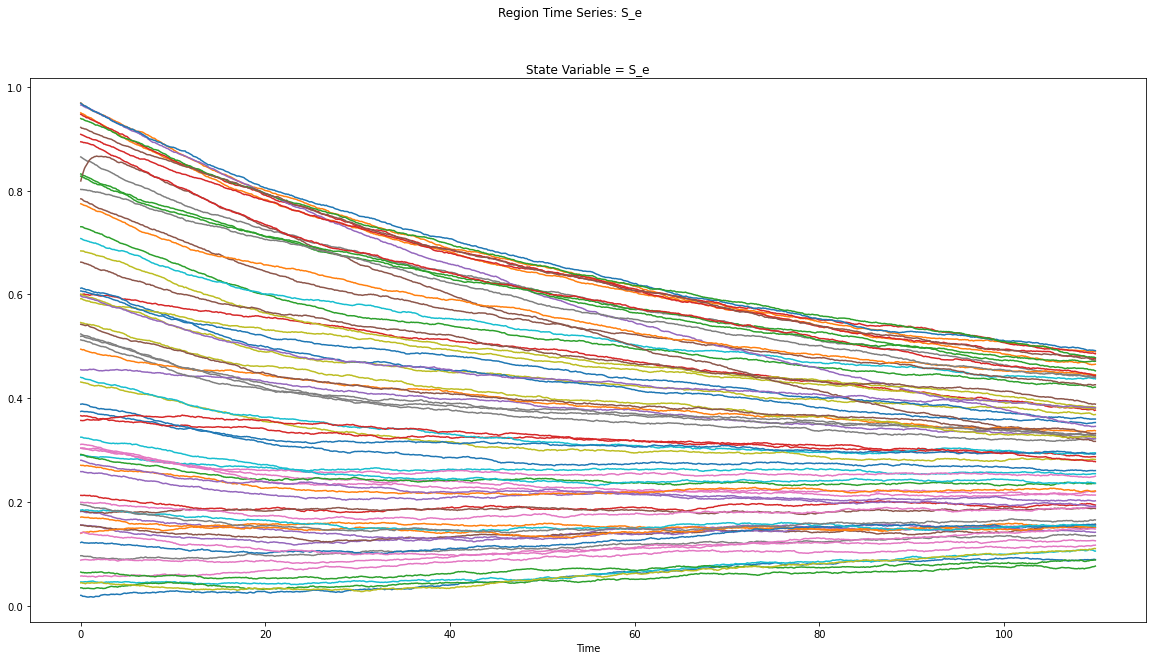

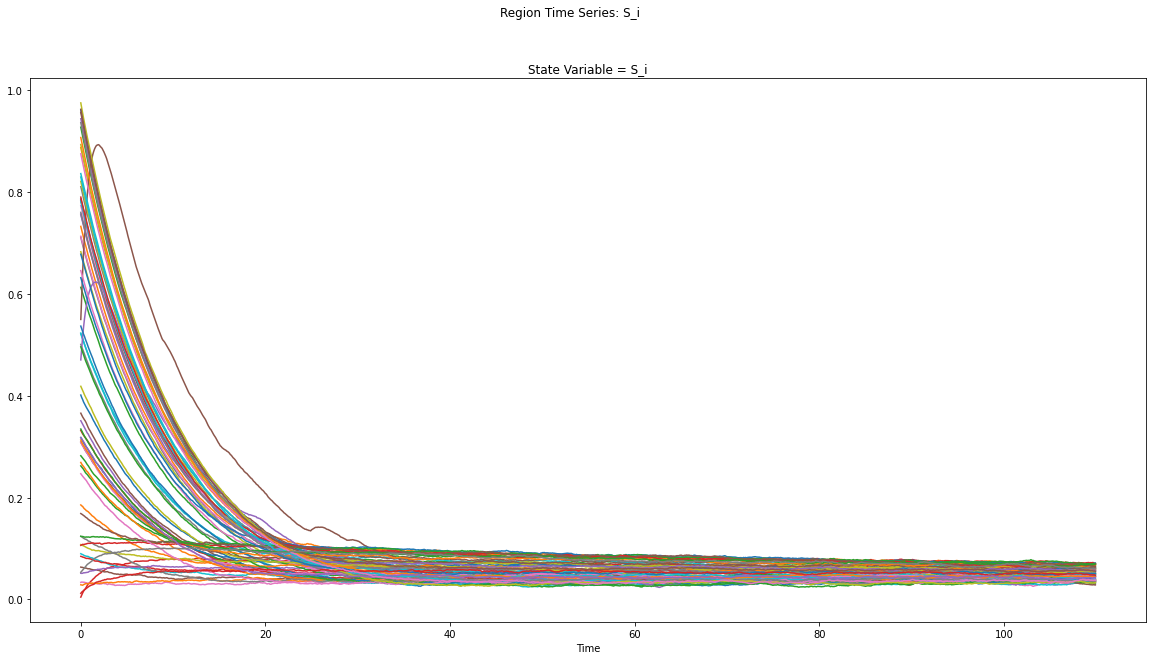

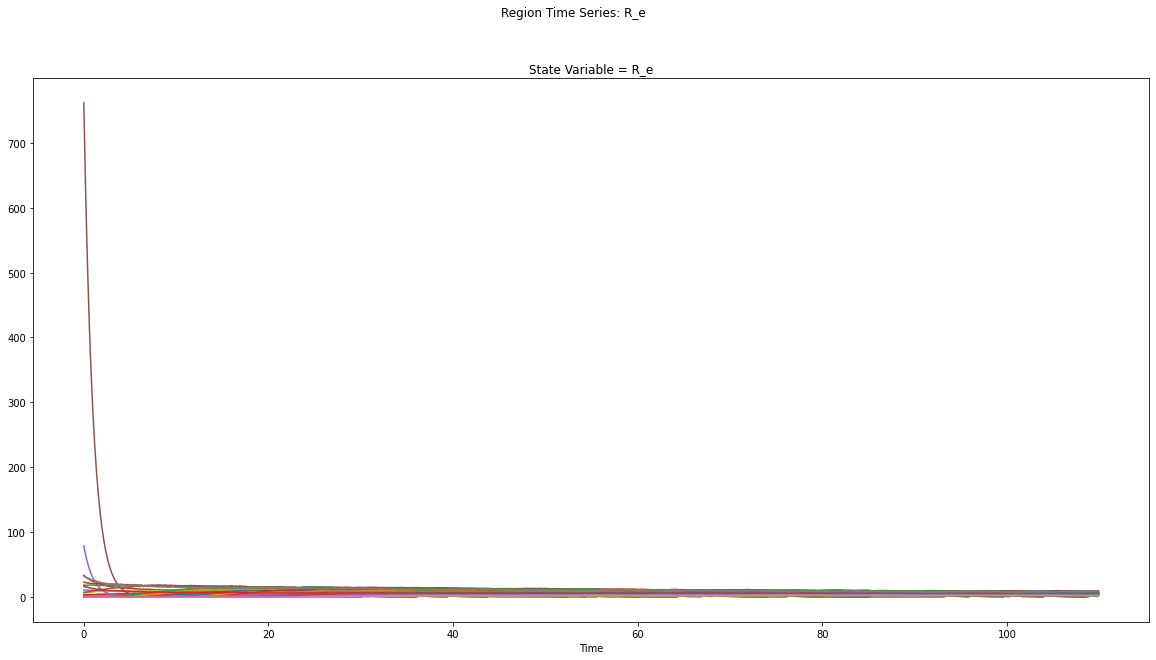

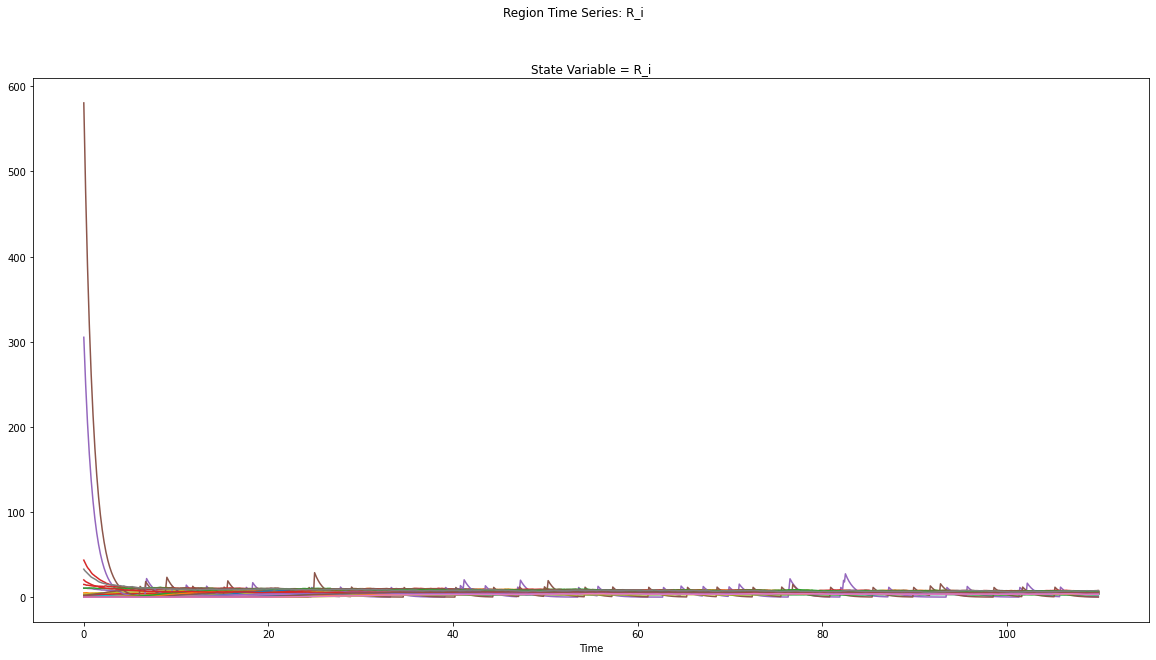

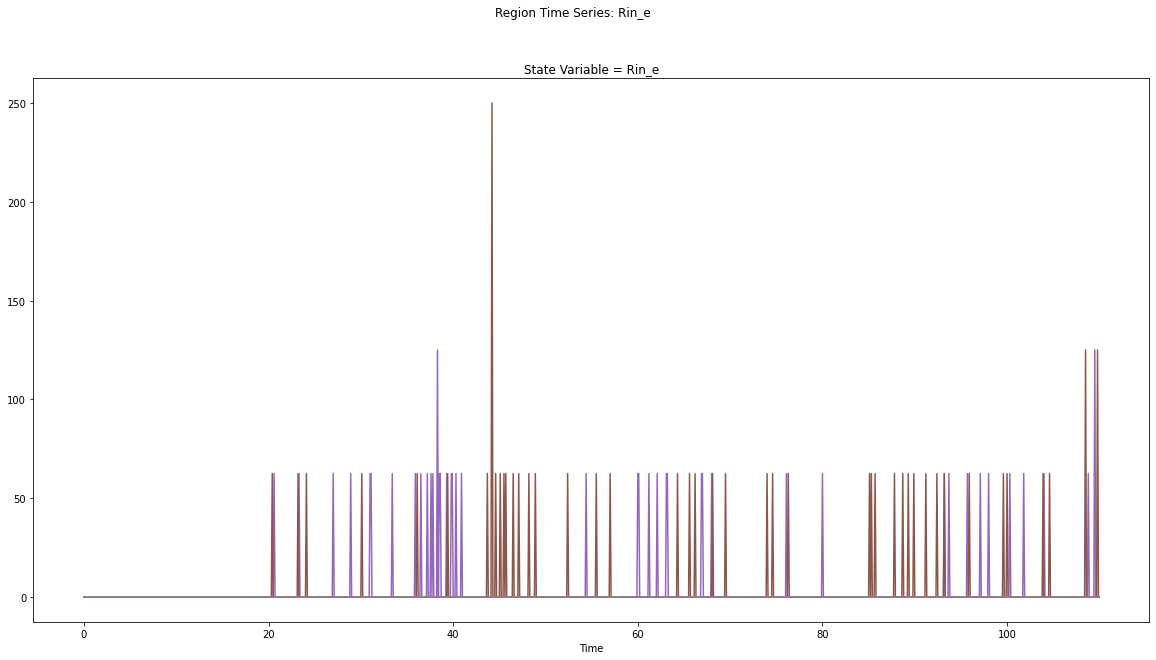

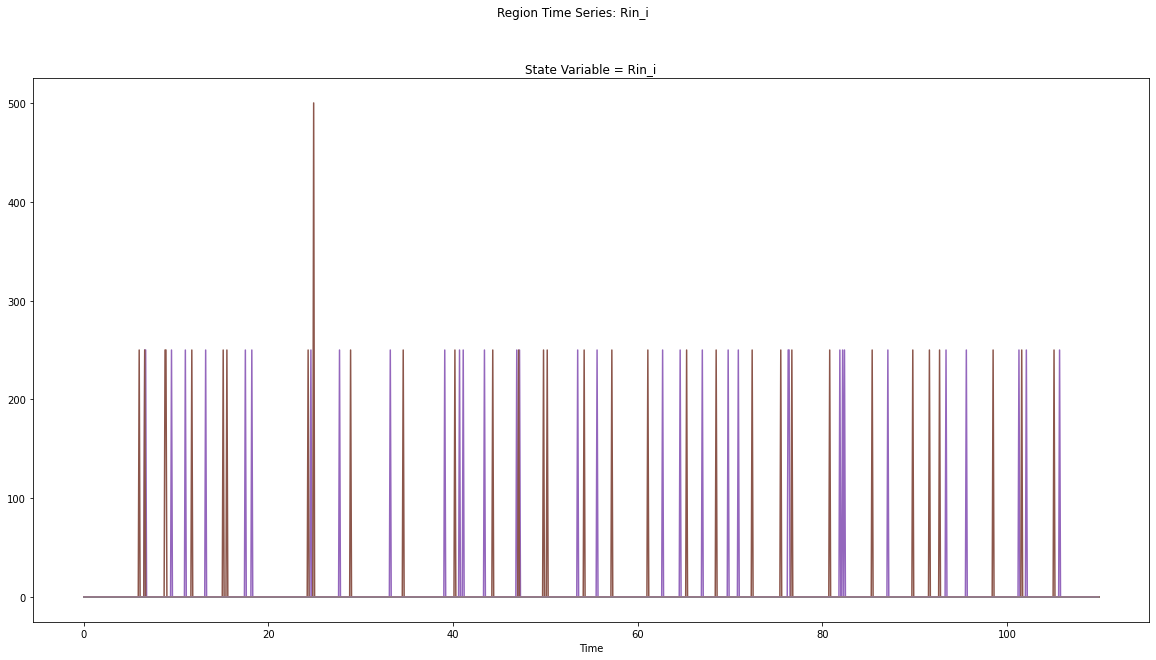

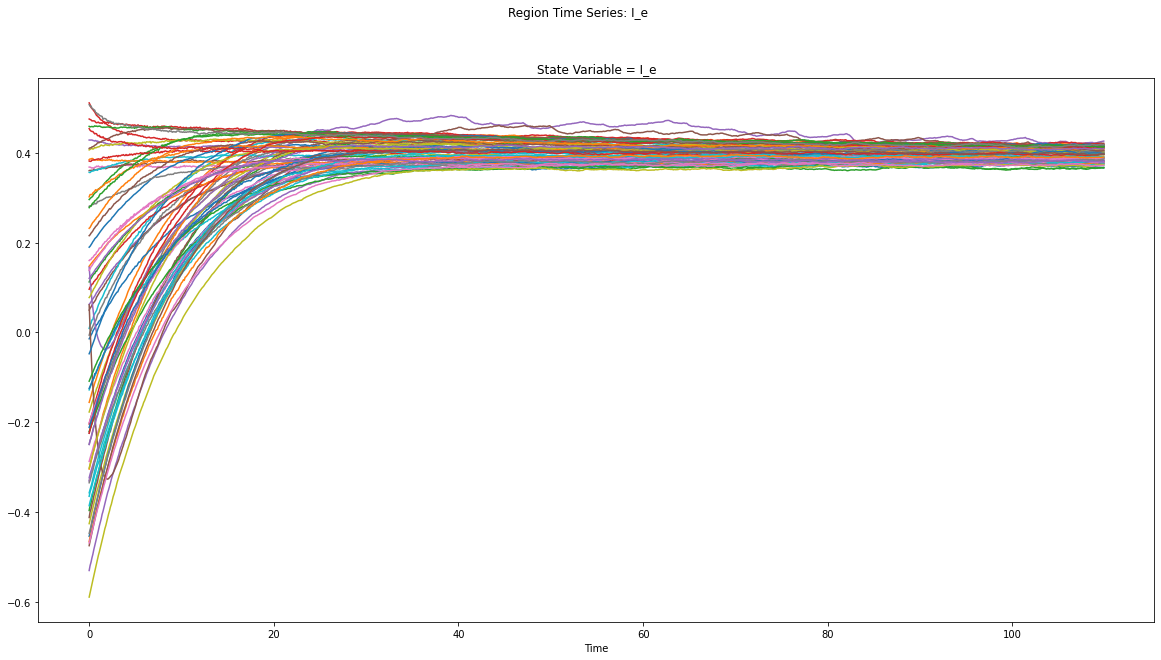

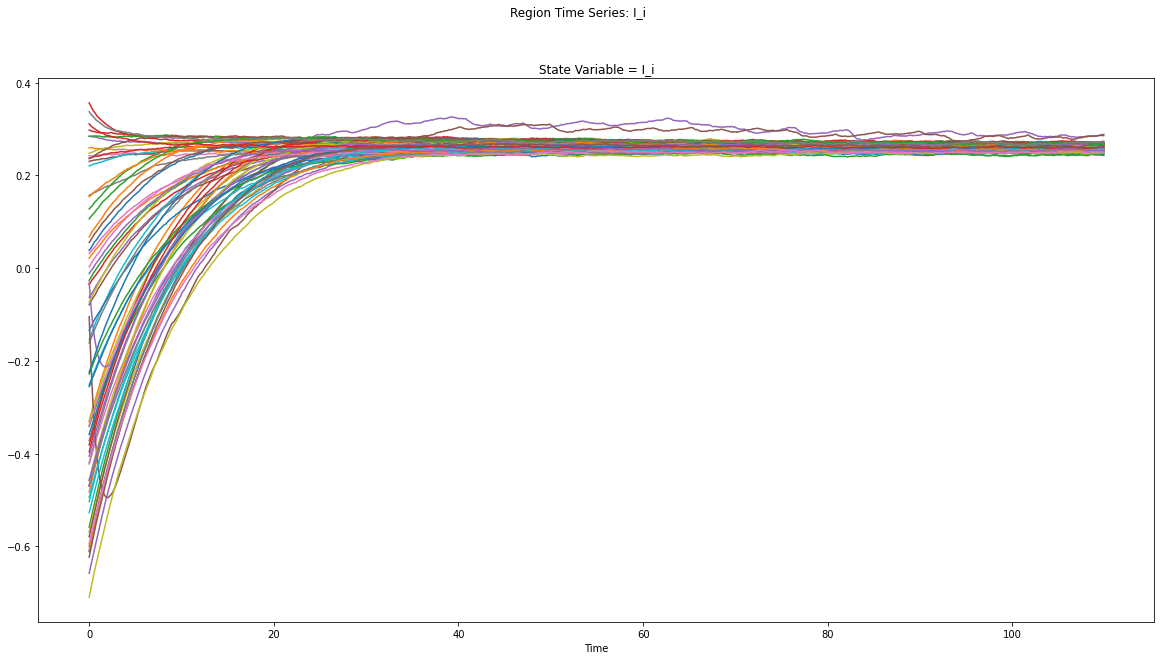

In [23]:
# Plot TVB time series
source_ts.plot_timeseries(plotter_config=plotter.config, 
                          hue="Region" if source_ts.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                          per_variable=source_ts.shape[1] > MAX_VARS_IN_COLS, 
                          figsize=FIGSIZE);

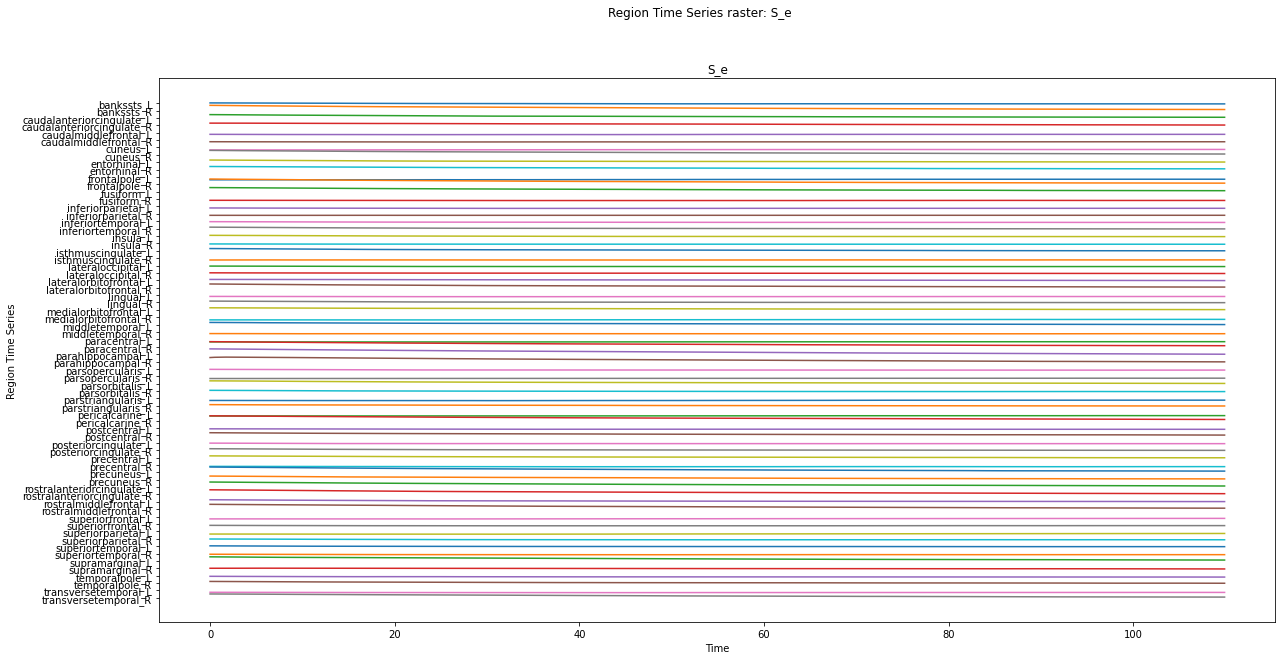

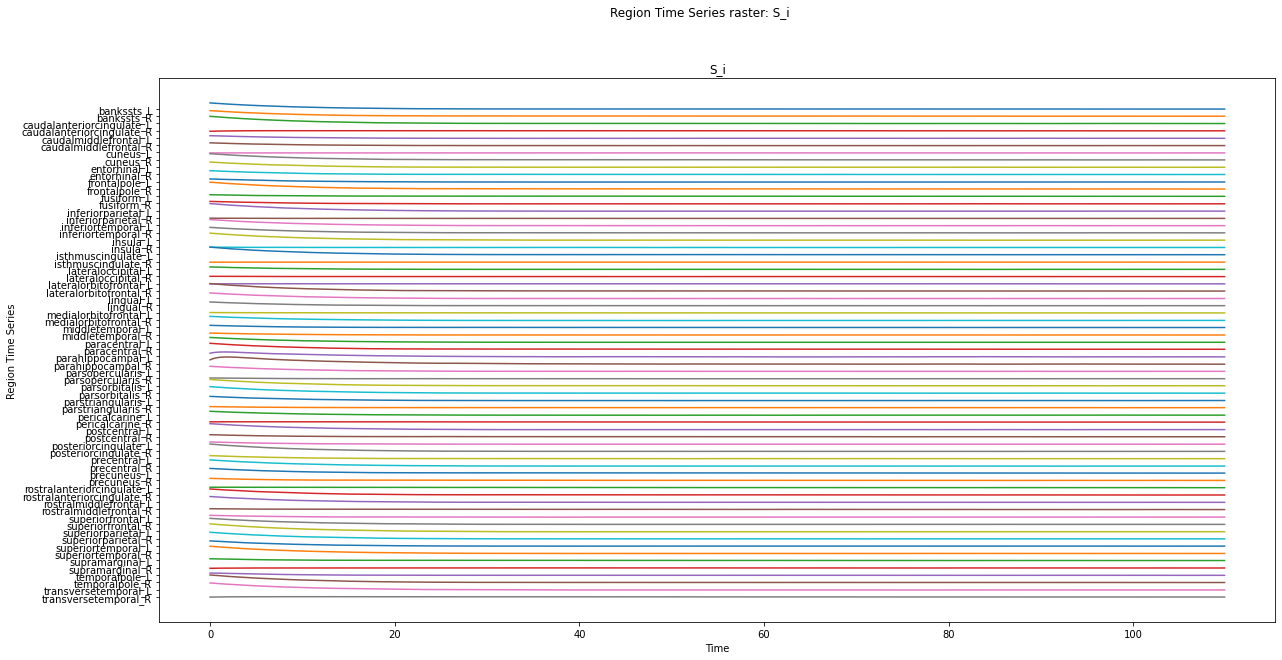

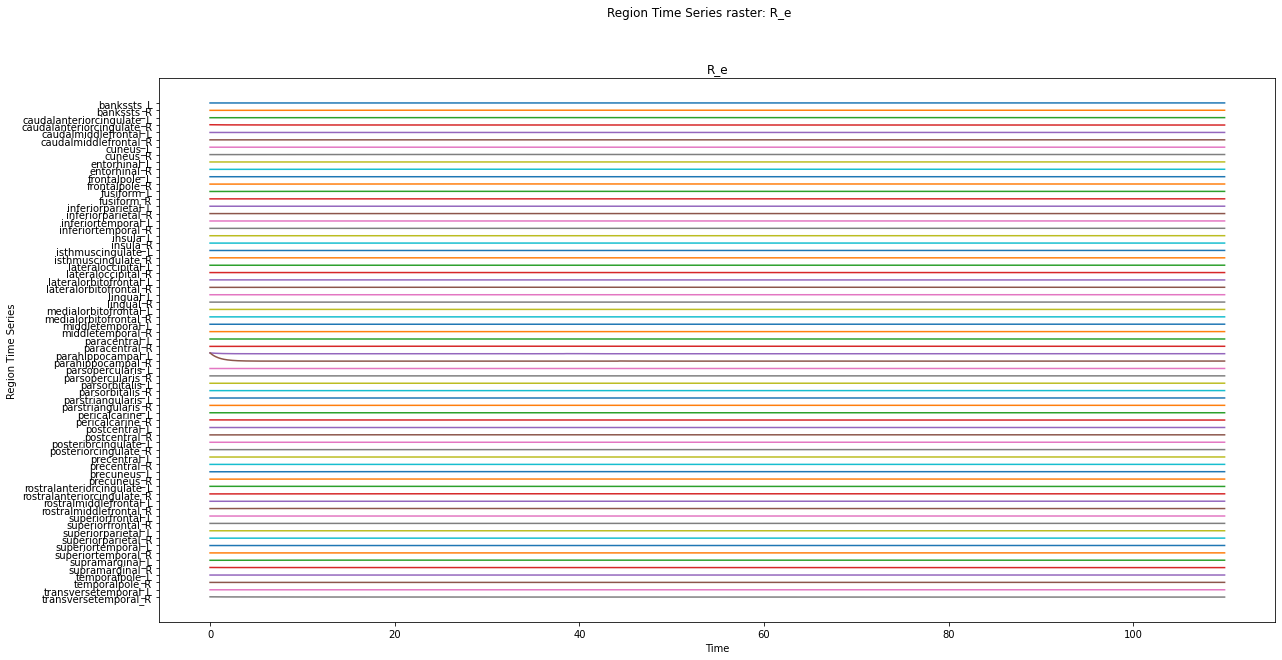

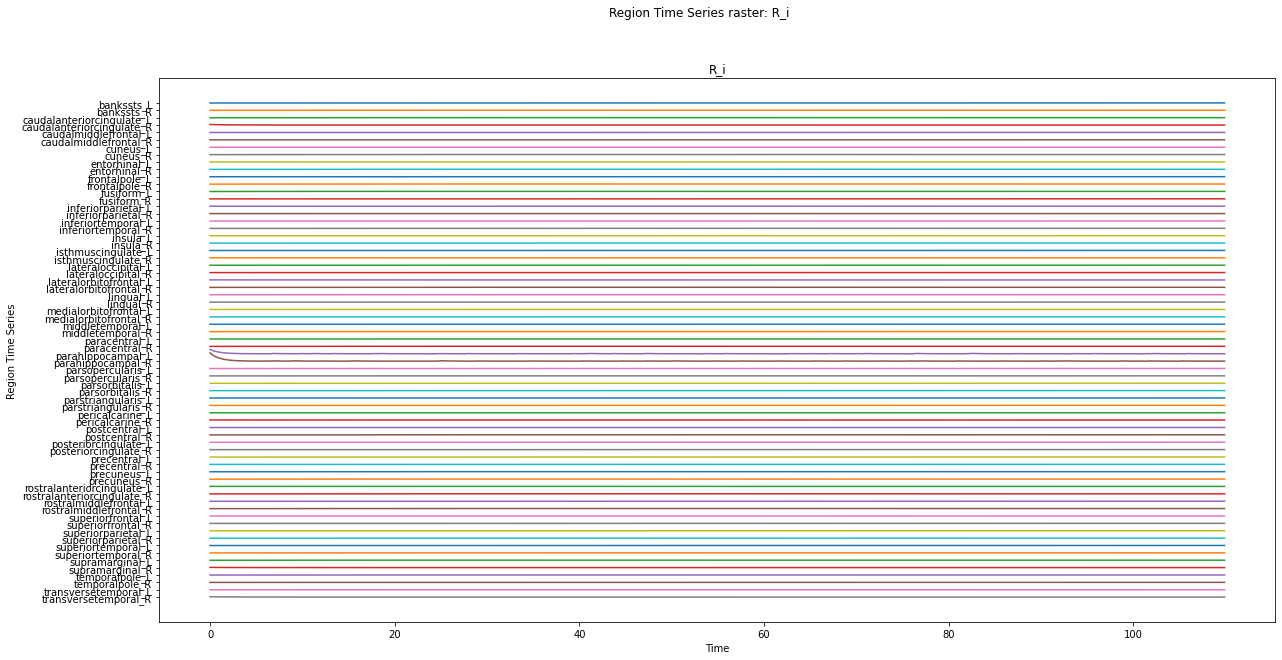

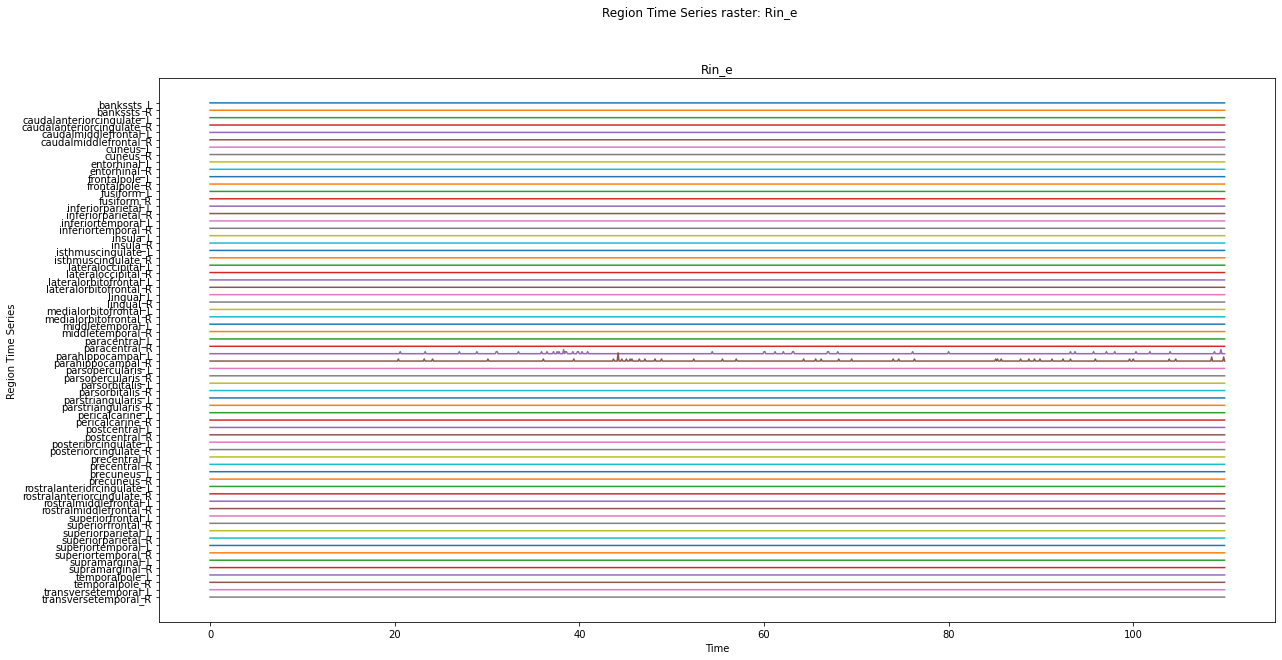

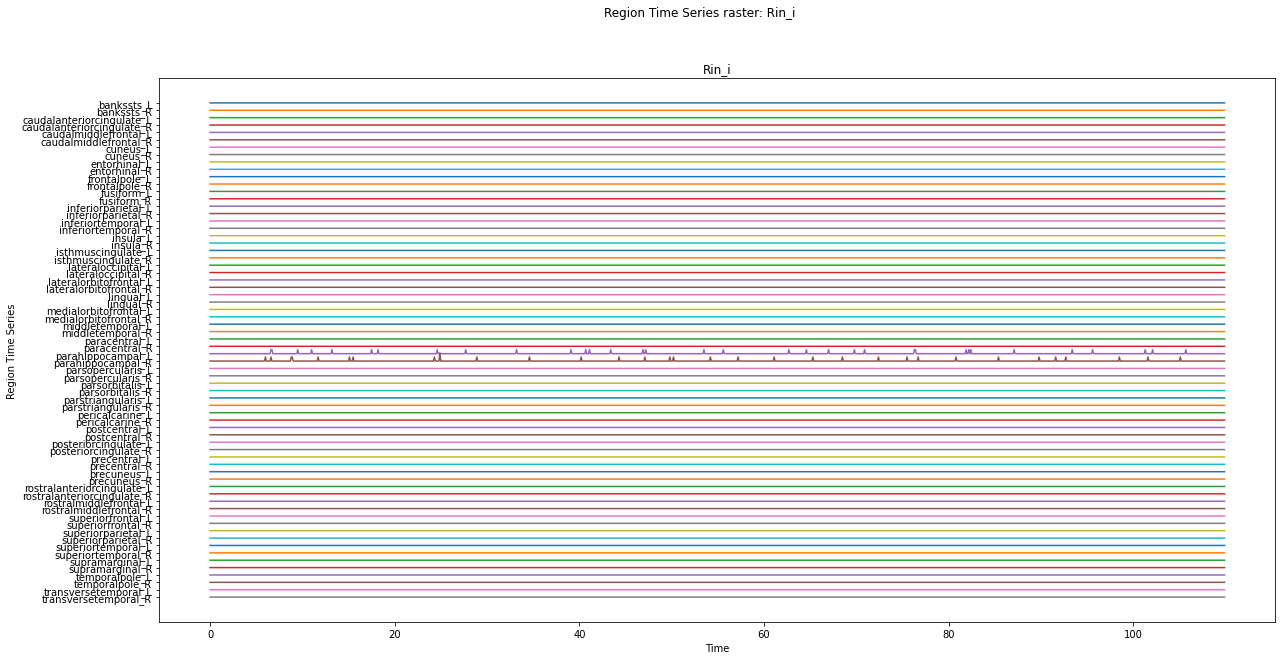

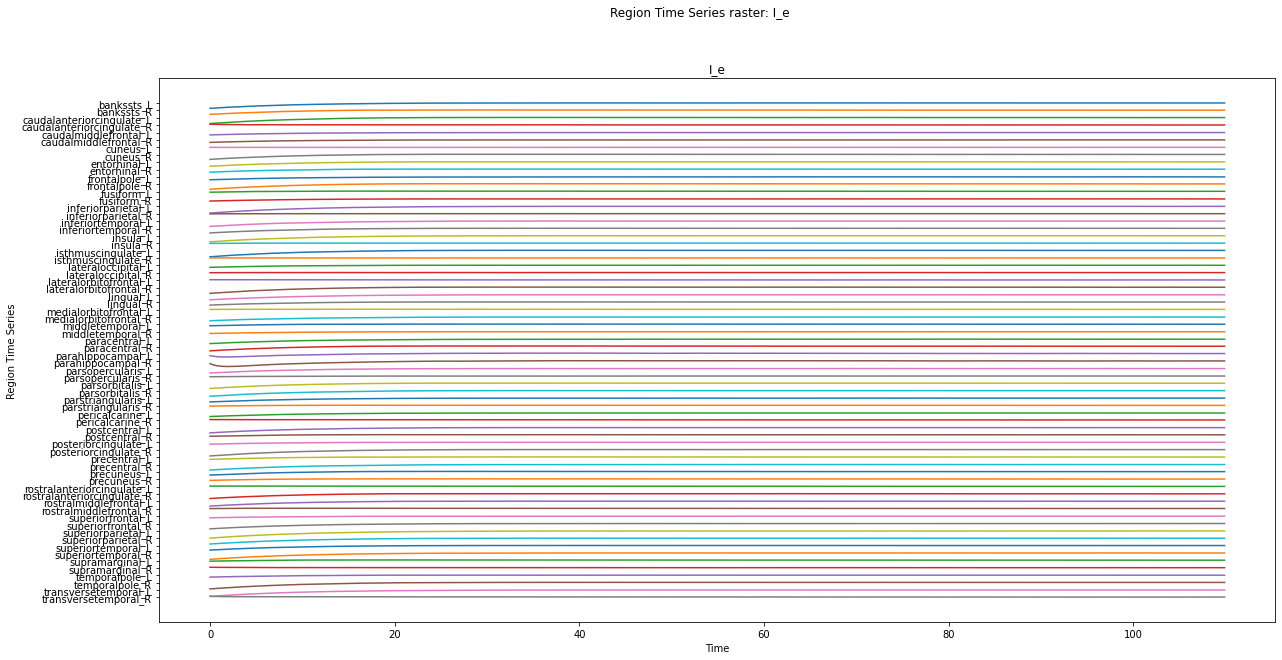

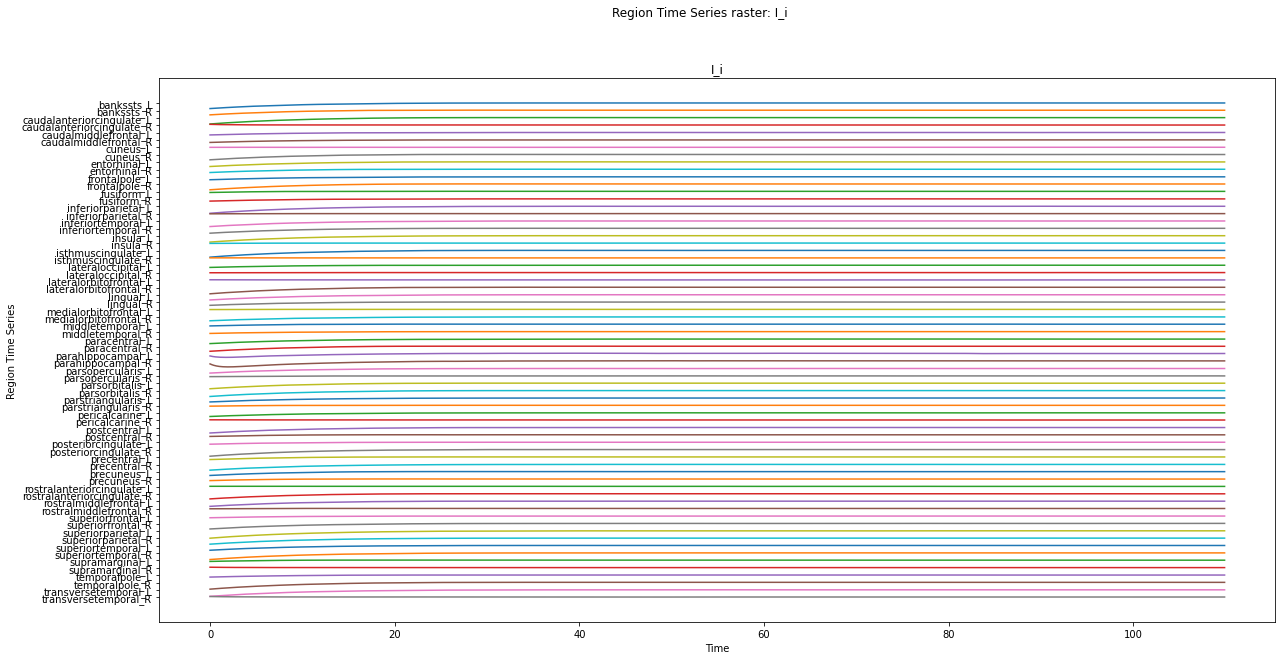

In [24]:
# TVB time series raster plot:
if source_ts.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
    source_ts.plot_raster(plotter_config=plotter.config, 
                          per_variable=source_ts.shape[1] > MAX_VARS_IN_COLS,
                          figsize=FIGSIZE);

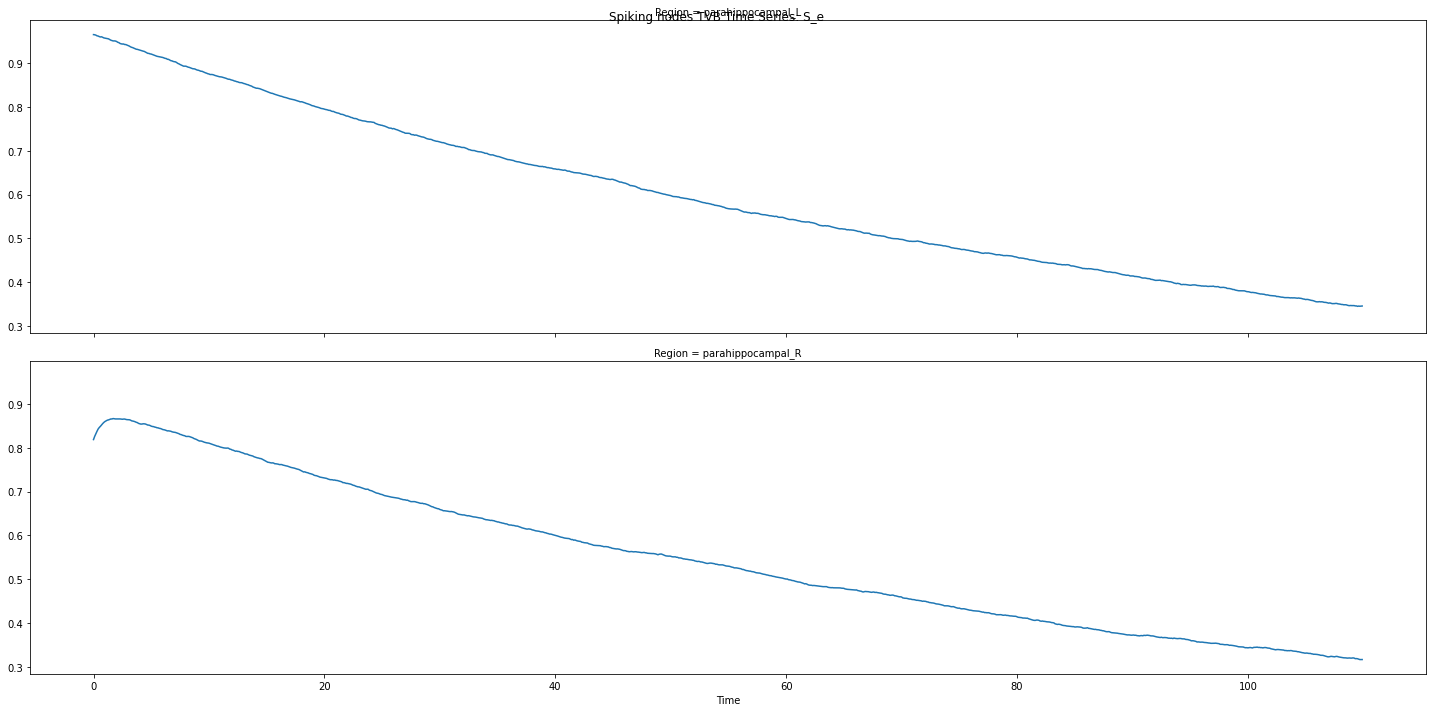

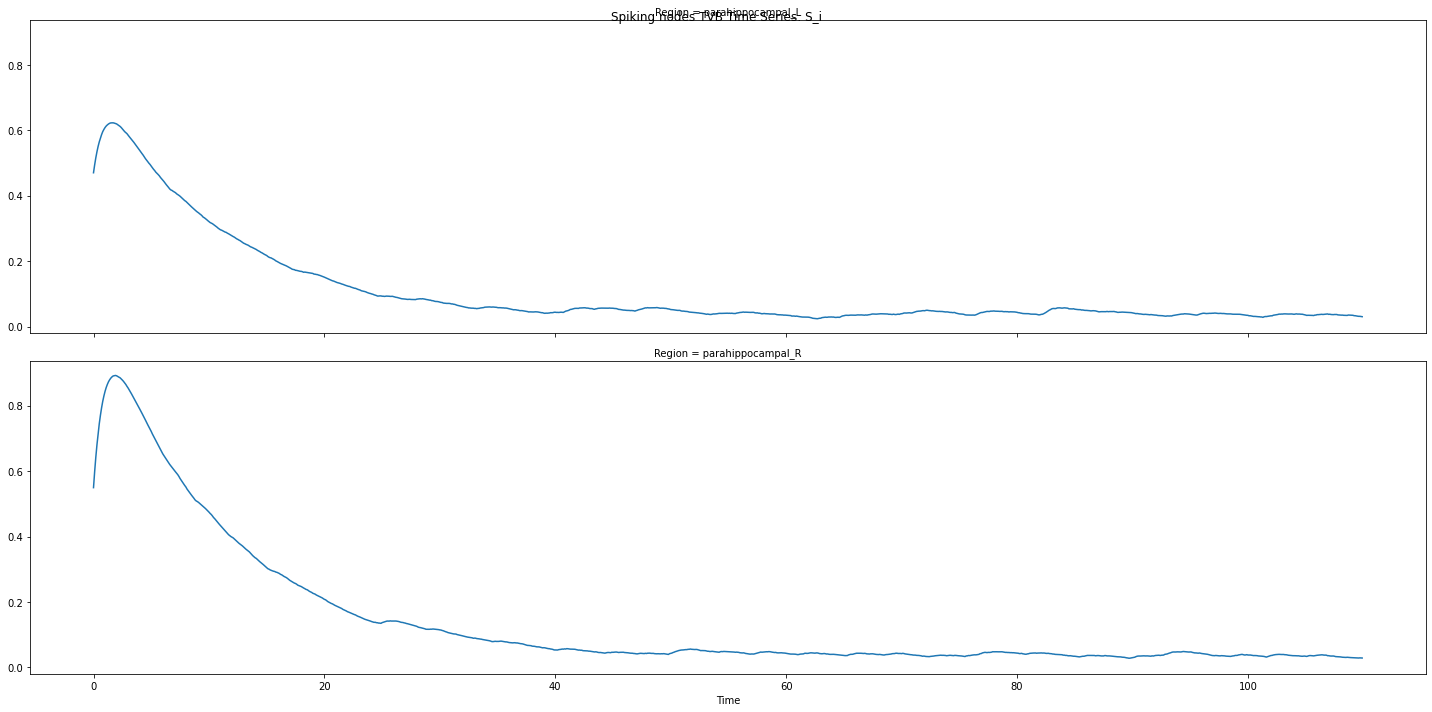

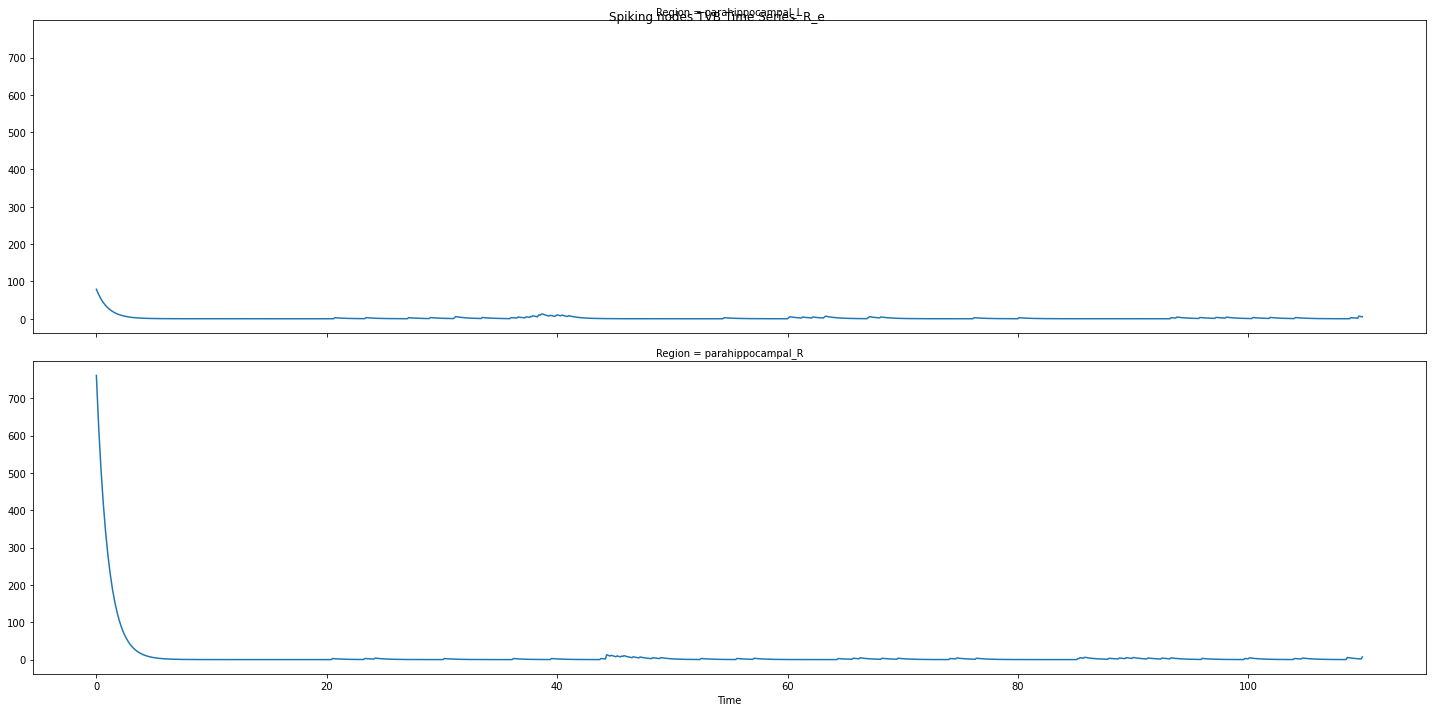

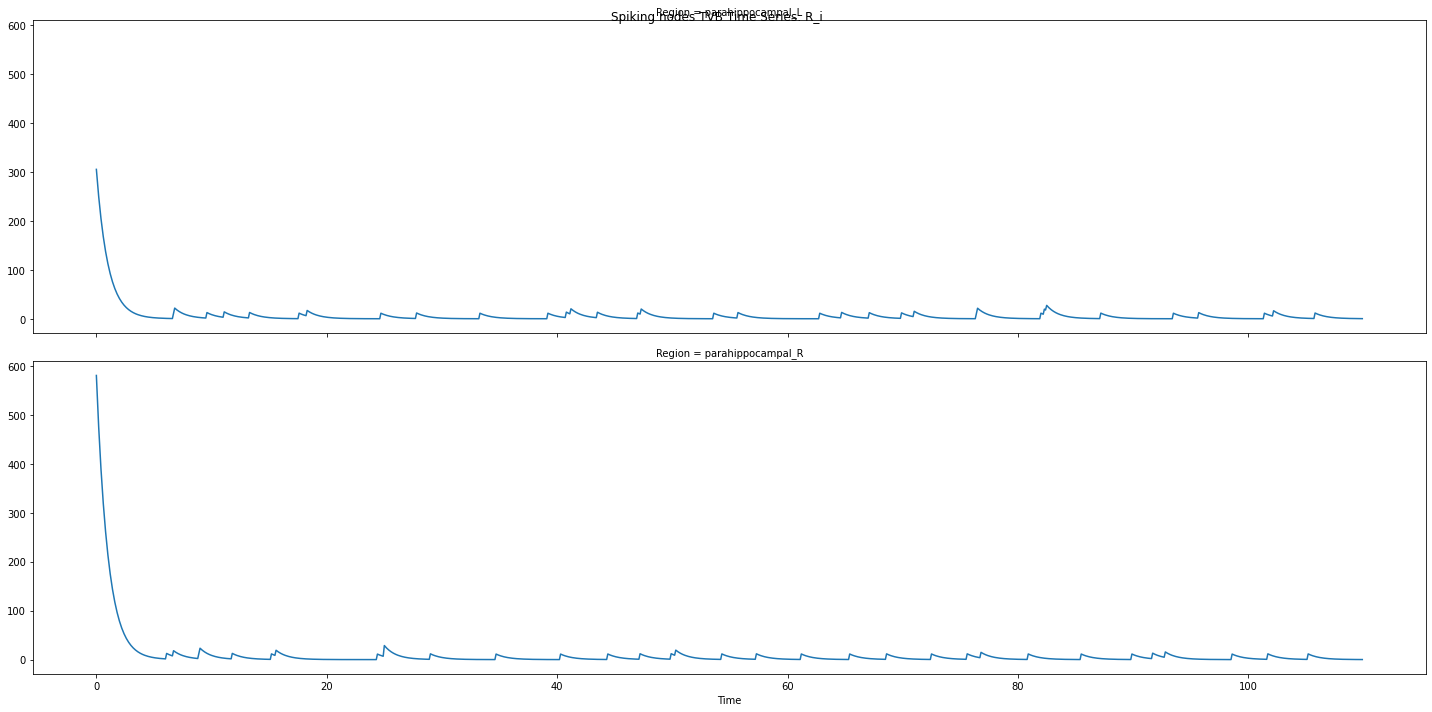

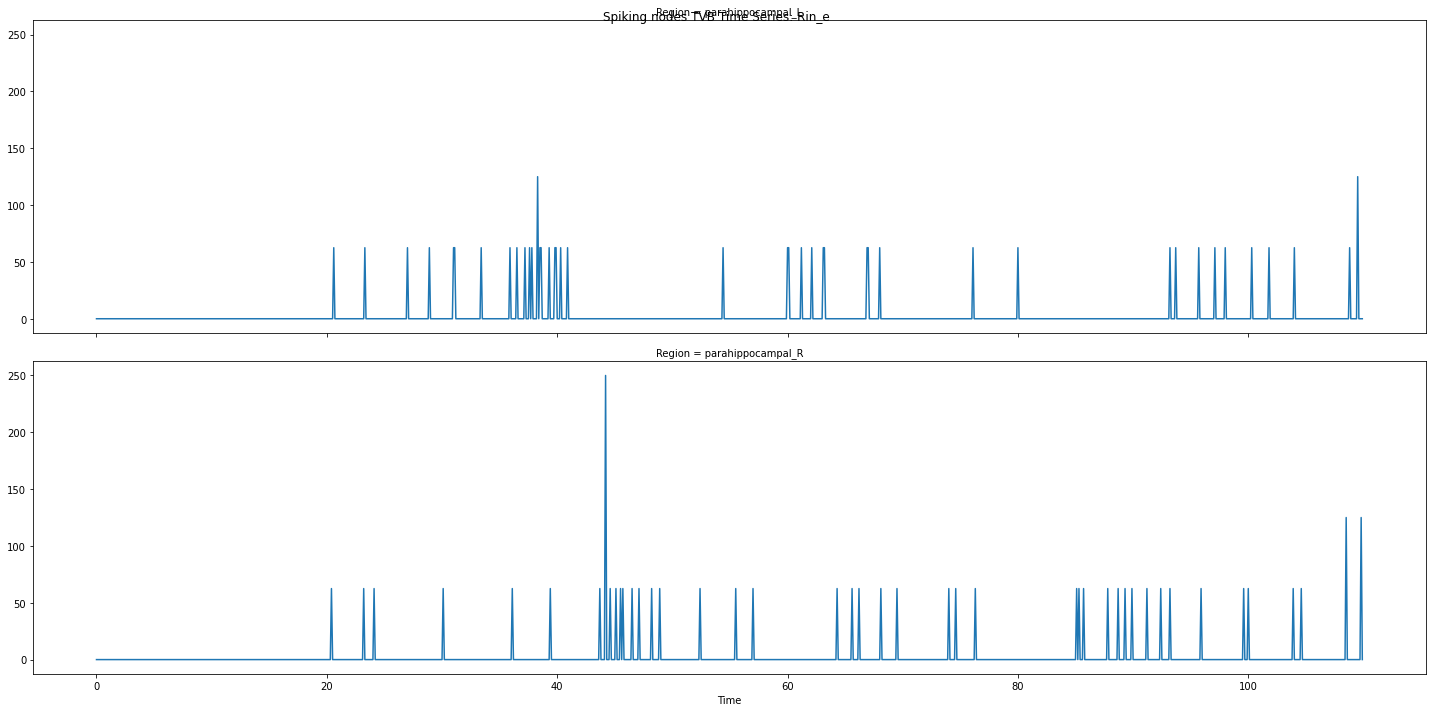

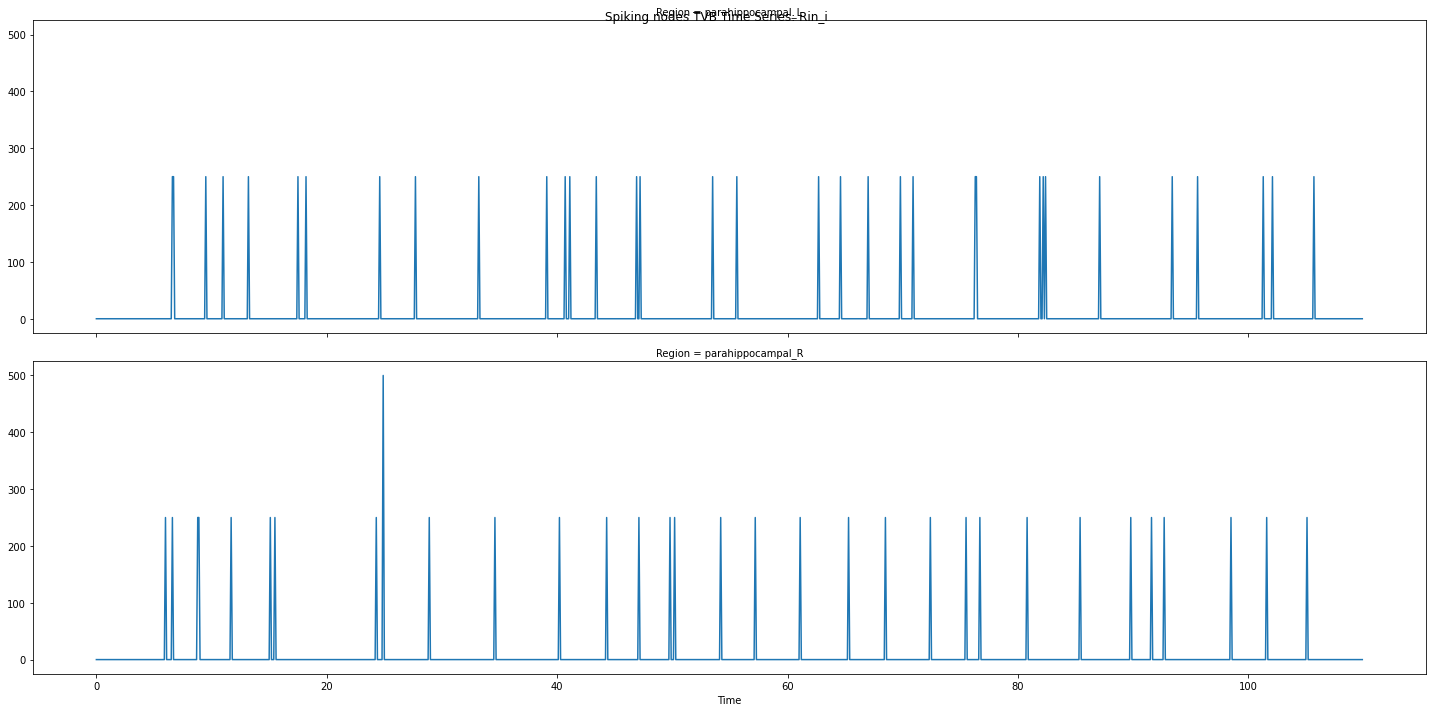

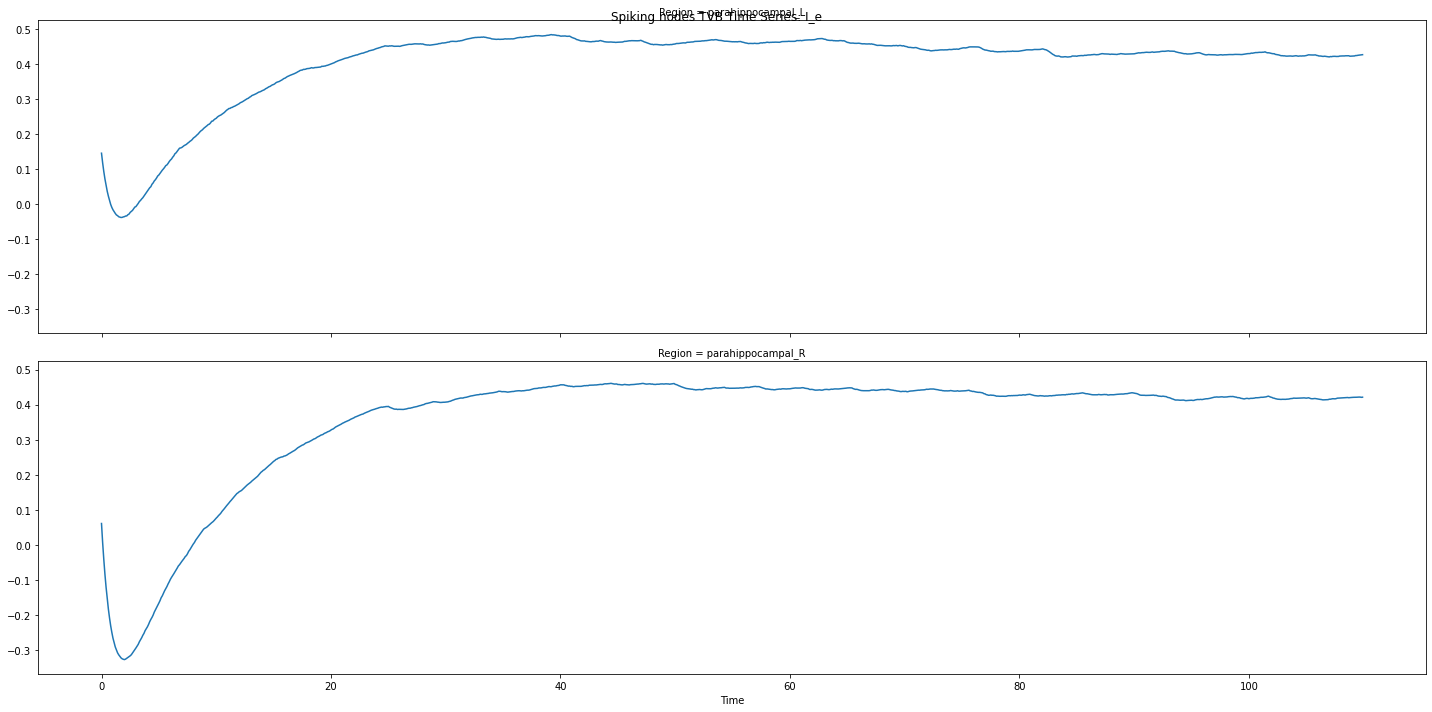

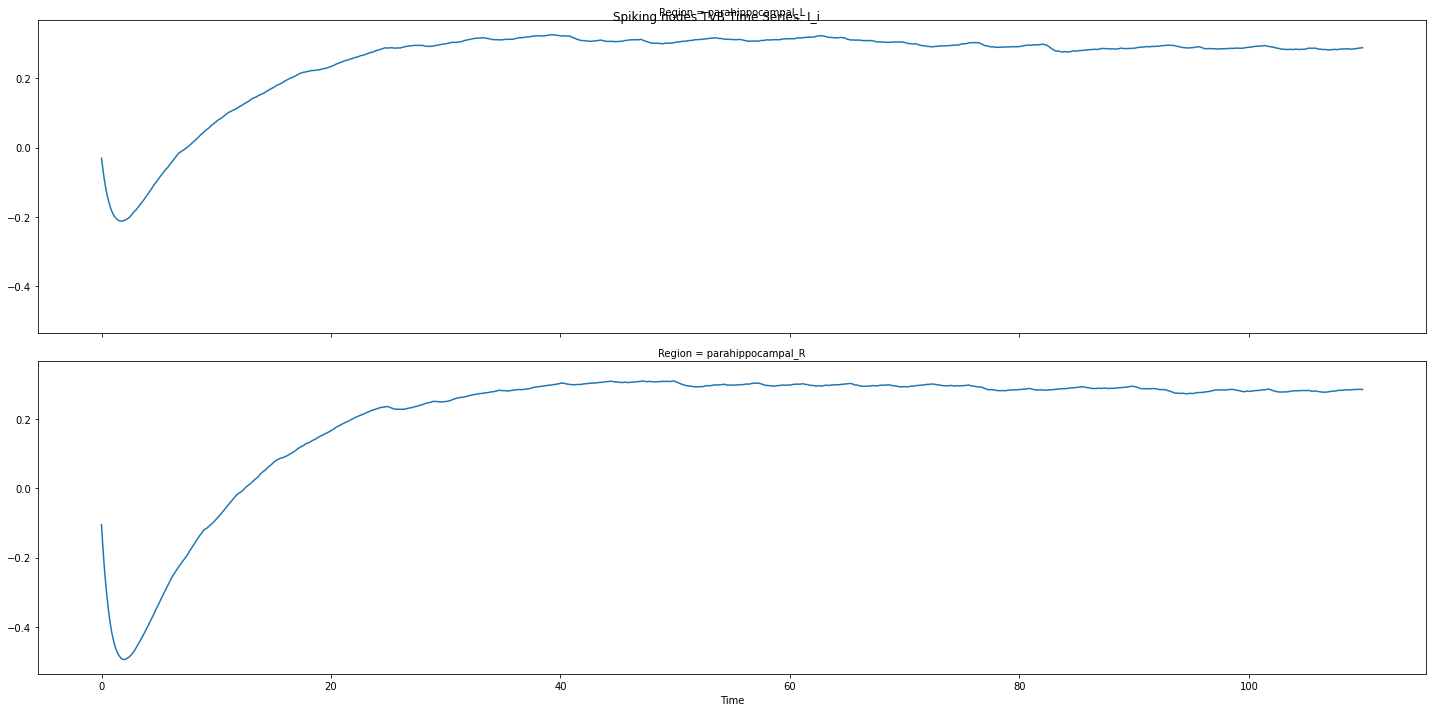

In [25]:
# Focus on the nodes modelled in NEST: 
n_spiking_nodes = len(simulator.tvb_spikeNet_interface.spiking_nodes_inds)
source_ts_nest = source_ts[:, :, simulator.tvb_spikeNet_interface.spiking_nodes_inds]
source_ts_nest.plot_timeseries(plotter_config=plotter.config, 
                               hue="Region" if source_ts_nest.shape[2] > MAX_REGIONS_IN_ROWS else None, 
                               per_variable=source_ts_nest.shape[1] > MAX_VARS_IN_COLS, 
                               figsize=FIGSIZE, figname="Spiking nodes TVB Time Series");

In [26]:
# Focus on the nodes modelled in NEST: raster plot
if source_ts_nest.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
    source_ts_nest.plot_raster(plotter_config=plotter.config, 
                               per_variable=source_ts_nest.shape[1] > MAX_VARS_IN_COLS,
                               figsize=FIGSIZE, figname="Spiking nodes TVB Time Series Raster");

### Spiking Network plots

In [27]:
from tvb_multiscale.core.data_analysis.spiking_network_analyser import SpikingNetworkAnalyser
# Create a SpikingNetworkAnalyzer:
spikeNet_analyzer = \
    SpikingNetworkAnalyser(spikeNet=nest_network,
                           start_time=source_ts.time[0], end_time=source_ts.time[-1], 
                           period=simulator.monitors[0].period, transient=transient,
                           time_series_output_type="TVB", return_data=True, 
                           force_homogeneous_results=True, connectivity=simulator.connectivity)

### Plot spikes' raster and mean spike rates and correlations

In [28]:
# Spikes rates and correlations per Population and Region
spikes_res = \
    spikeNet_analyzer.\
        compute_spikeNet_spikes_rates_and_correlations(
            populations_devices=None, regions=None,
            rates_methods=[], rates_kwargs=[{}], rate_results_names=[],
            corrs_methods=[], corrs_kwargs=[{}], corrs_results_names=[], bin_kwargs={},
            data_method=spikeNet_analyzer.get_spikes_from_device, data_kwargs={},
            return_devices=False
        );

/home/docker/env/neurosci/lib/python3.7/site-packages/elephant/conversion.py:1169: UserWarning:Binning discarded 1 last spike(s) of the input spiketrain


<xarray.DataArray "Mean Populations' Spikes' Rates" (Population: 2, Region: 2)>
array([[2.7527527 , 3.0655655 ],
       [7.7577576 , 7.25725711]])
Coordinates:
  * Region      (Region) object 'parahippocampal_L' 'parahippocampal_R'
  * Population  (Population) object 'E_spikes' 'I_spikes'
<xarray.DataArray "Populations' Correlation Coefficient" (Population_i: 2, Population_j: 2, Region_i: 2, Region_j: 2)>
array([[[[ 1.        , -0.01707461],
         [-0.01707461,  1.        ]],

        [[-0.00763001, -0.03479684],
         [-0.01029347,  0.01651542]]],


       [[[-0.00763001, -0.01029347],
         [-0.03479684,  0.01651542]],

        [[ 1.        , -0.03092191],
         [-0.03092191,  1.        ]]]])
Coordinates:
  * Population_i  (Population_i) object 'E_spikes' 'I_spikes'
  * Region_i      (Region_i) object 'parahippocampal_L' 'parahippocampal_R'
  * Population_j  (Population_j) object 'E_spikes' 'I_spikes'
  * Region_j      (Region_j) object 'parahippocampal_L' 'parahippocampa

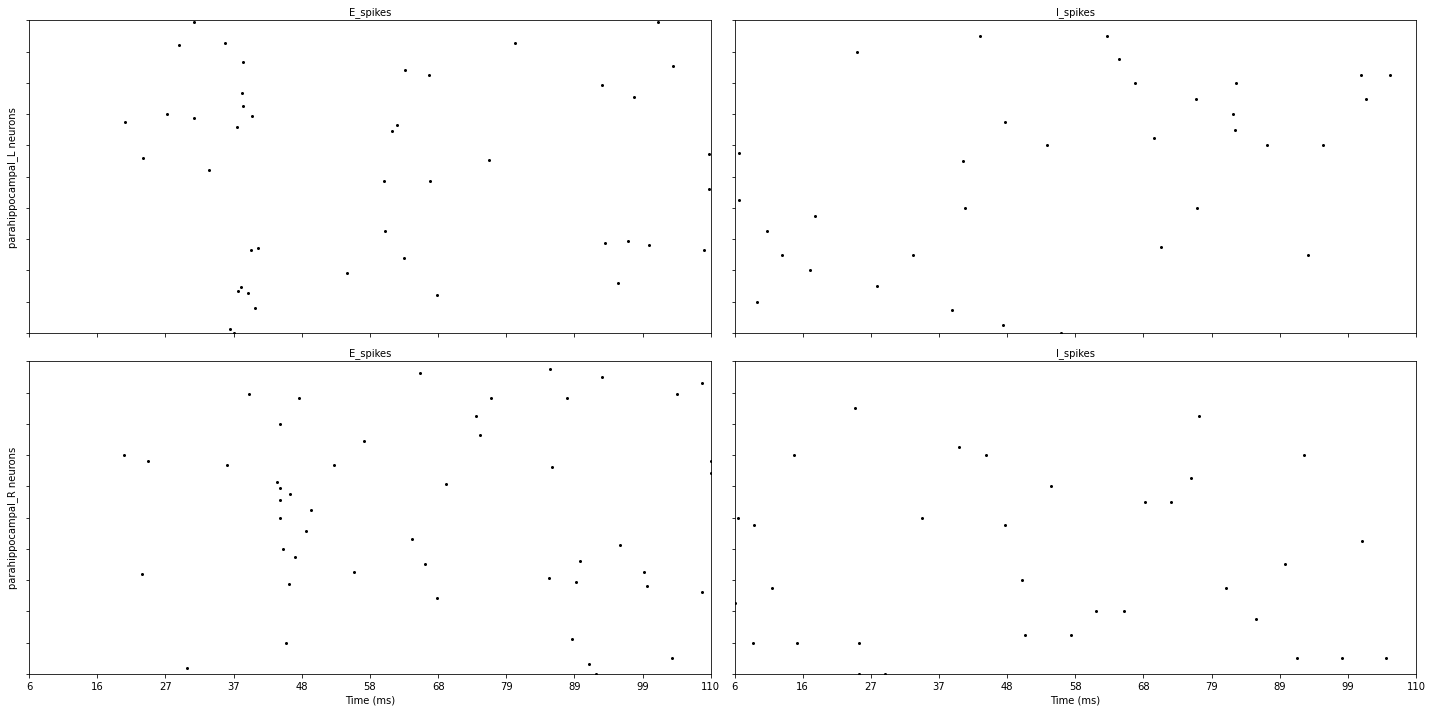

<Figure size 432x288 with 0 Axes>

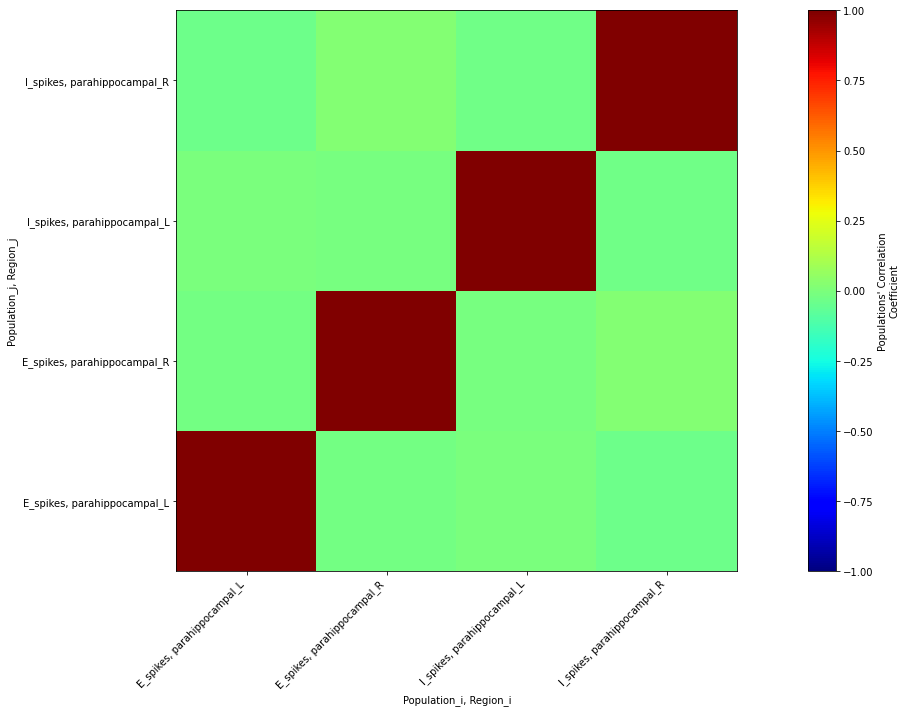

In [29]:
if spikes_res:
    print(spikes_res["mean_rate"])
    print(spikes_res["spikes_correlation_coefficient"])
    # Plot spikes' rasters together with mean population's spikes' rates' time series
    if plotter:
        plotter.plot_spike_events(spikes_res["spikes"], rates=spikes_res["mean_rate_time_series"], figsize=FIGSIZE)
        from tvb_multiscale.core.plot.correlations_plot import plot_correlations
        plot_correlations(spikes_res["spikes_correlation_coefficient"], plotter)

In [30]:
if spikes_res:
    print("Mean spike rates:")
    for pop in spikes_res["mean_rate"].coords["Population"]:
        for reg in spikes_res["mean_rate"].coords["Region"]:
            if not np.isnan(spikes_res["mean_rate"].loc[pop, reg]):
                print("%s - %s: %g" % (pop.values.item().split("_spikes")[0], reg.values.item(), 
                                       spikes_res["mean_rate"].loc[pop, reg].values.item()))

    # savemat(os.path.join(config.out.FOLDER_RES, "spikes_mean_rates.mat"), spikes_res["mean_rate"].to_dict())


Mean spike rates:
E - parahippocampal_L: 2.75275
E - parahippocampal_R: 3.06557
I - parahippocampal_L: 7.75776
I - parahippocampal_R: 7.25726


In [31]:
spikeNet_analyzer.resample = True
spikes_sync = \
    spikeNet_analyzer.compute_spikeNet_synchronization(populations_devices=None, regions=None,
                                                       comp_methods=[spikeNet_analyzer.compute_spikes_sync, 
                                                                     spikeNet_analyzer.compute_spikes_sync_time_series, 
                                                                     spikeNet_analyzer.compute_spikes_distance, 
                                                                     spikeNet_analyzer.compute_spikes_distance_time_series,
                                                                     spikeNet_analyzer.compute_spikes_isi_distance, 
                                                                     spikeNet_analyzer.compute_spikes_isi_distance_time_series],
                                                       computations_kwargs=[{}], data_kwargs={},
                                                       return_spikes_trains=False, return_devices=False)
# print(spikes_sync)


2021-04-28 11:11:57,665 - ERROR - tvb.contrib.scripts.datatypes.time_series_xarray - Cannot access index 3 of labels ordering: ('Time', 'Population', 'Region')!
2021-04-28 11:11:57,670 - ERROR - tvb.contrib.scripts.datatypes.time_series_xarray - Cannot access index 3 of labels ordering: ('Time', 'Population', 'Region')!


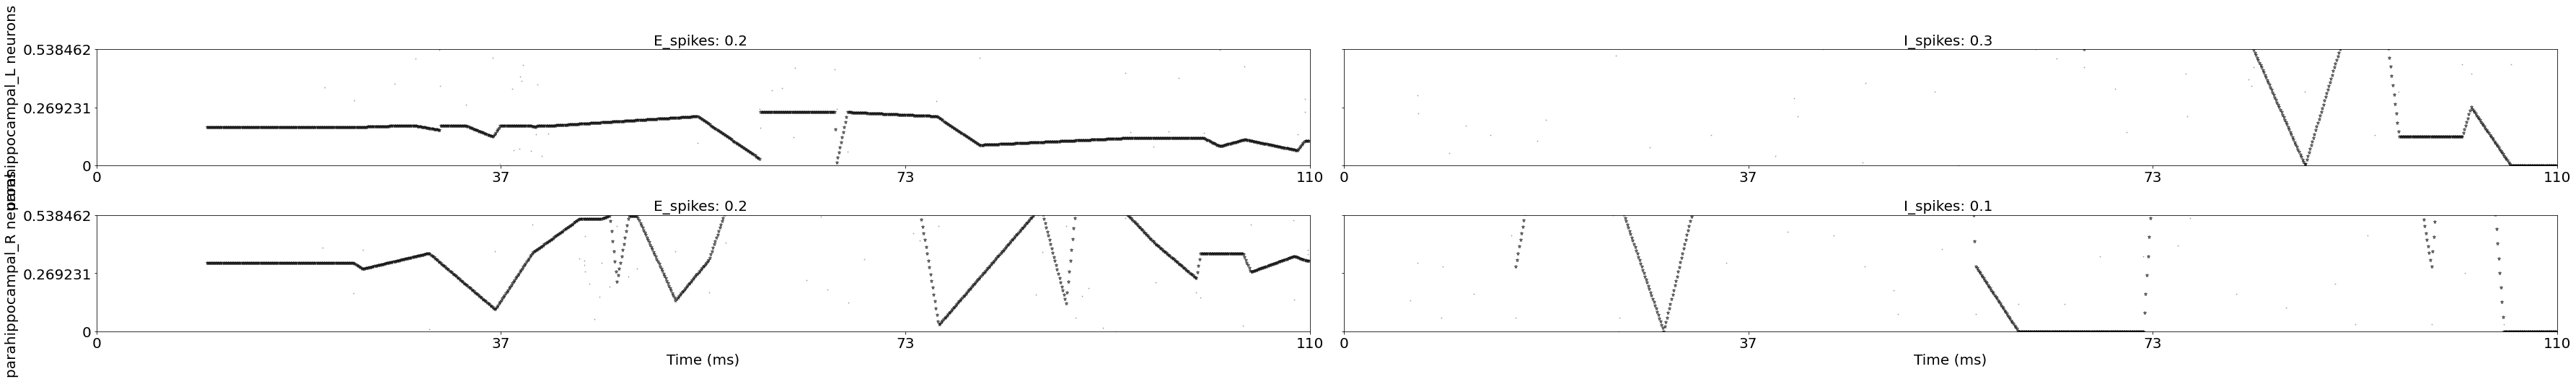

In [32]:
if spikes_sync:
    plotter.config.FONTSIZE = 20 # plotter.config.LARGE_FONTSIZE  # LARGE = 12, default = 10
    plotter.plot_spike_events(spikes_res["spikes"], 
                              time_series=spikes_sync["spikes_sync_time_series"], 
                              mean_results=spikes_sync["spikes_sync"], 
                              plot_spikes=True, spikes_alpha=0.25,
                              spikes_markersize=1.0, time_series_marker="*", 
                              figsize=(50, 7), n_y_ticks=3, n_time_ticks=4, show_time_axis=True,
                              time_axis_min=0.0, time_axis_max=simulation_length
                                     )

2021-04-28 11:11:58,269 - ERROR - tvb.contrib.scripts.datatypes.time_series_xarray - Cannot access index 3 of labels ordering: ('Time', 'Population', 'Region')!
2021-04-28 11:11:58,272 - ERROR - tvb.contrib.scripts.datatypes.time_series_xarray - Cannot access index 3 of labels ordering: ('Time', 'Population', 'Region')!


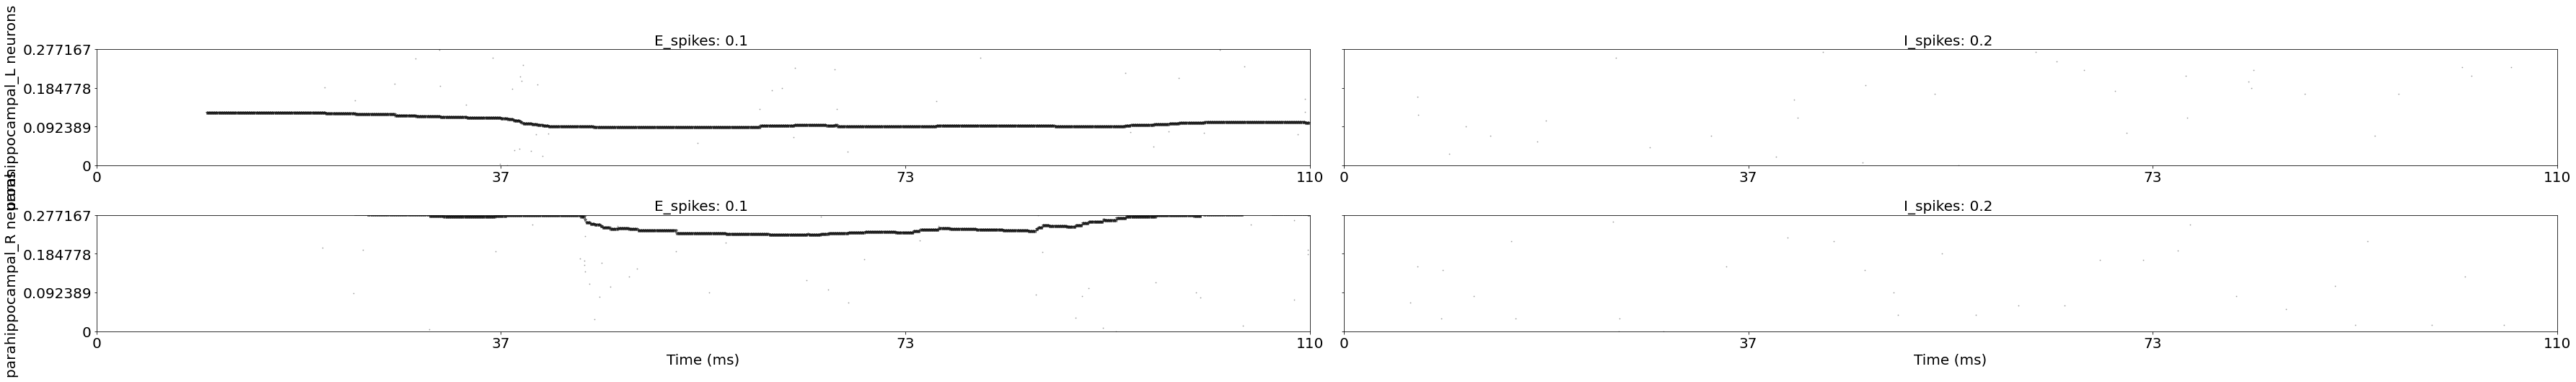

In [33]:
if spikes_sync:
    plotter.config.FONTSIZE = 20 # plotter.config.LARGE_FONTSIZE  # LARGE = 12, default = 10
    plotter.plot_spike_events(spikes_res["spikes"], 
                              time_series=spikes_sync["spikes_distance_time_series"], 
                              mean_results=spikes_sync["spikes_distance"], 
                              plot_spikes=True, spikes_alpha=0.25,
                              spikes_markersize=1.0, time_series_marker="*", 
                              figsize=(50, 7), n_time_ticks=4, show_time_axis=True, n_y_ticks=4,
                              time_axis_min=0.0, time_axis_max=simulation_length
                                     )

2021-04-28 11:11:58,926 - ERROR - tvb.contrib.scripts.datatypes.time_series_xarray - Cannot access index 3 of labels ordering: ('Time', 'Population', 'Region')!
2021-04-28 11:11:58,929 - ERROR - tvb.contrib.scripts.datatypes.time_series_xarray - Cannot access index 3 of labels ordering: ('Time', 'Population', 'Region')!


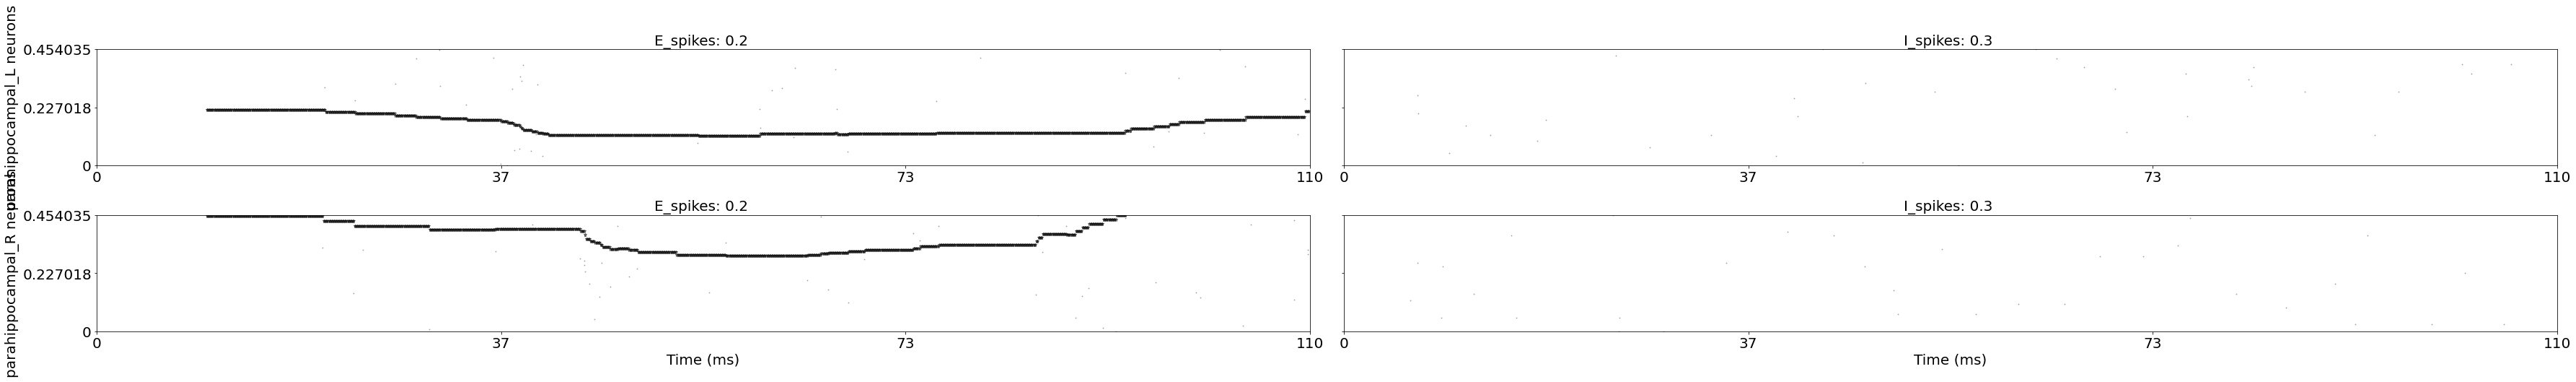

In [34]:
if spikes_sync:
    plotter.config.FONTSIZE = 20 # plotter.config.LARGE_FONTSIZE  # LARGE = 12, default = 10
    plotter.plot_spike_events(spikes_res["spikes"], 
                              time_series=spikes_sync["spikes_isi_distance_time_series"], 
                              mean_results=spikes_sync["spikes_isi_distance"], 
                              plot_spikes=True, spikes_alpha=0.25,
                              spikes_markersize=1.0,  time_series_marker="*", 
                              figsize=(50, 7), n_y_ticks=3, n_time_ticks=4, show_time_axis=True,
                              time_axis_min=0.0, time_axis_max=simulation_length
                                     )

In [35]:
if spikes_sync:
    print("Spike synchronization:")
    for pop in spikes_sync["spikes_sync"].coords["Population"]:
        for reg in spikes_sync["spikes_sync"].coords["Region"]:
            if not np.isnan(spikes_sync["spikes_sync"].loc[pop, reg]):
                print("%s - %s: %g" % (pop.values.item().split("_spikes")[0], reg.values.item(), 
                                       spikes_sync["spikes_sync"].loc[pop, reg].values.item()))

#     savemat(os.path.join(config.out.FOLDER_RES, "spikes_sync.mat"), spikes_sync["spikes_sync"].to_dict())
#     savemat(os.path.join(config.out.FOLDER_RES, "spikes_sync_time_series.mat"), spikes_sync["spikes_sync_time_series"].to_dict())

Spike synchronization:
E - parahippocampal_L: 0.166095
E - parahippocampal_R: 0.190219
I - parahippocampal_L: 0.279035
I - parahippocampal_R: 0.13209


In [36]:
if spikes_sync:
    print("Spike distance:")
    for pop in spikes_sync["spikes_distance"].coords["Population"]:
        for reg in spikes_sync["spikes_distance"].coords["Region"]:
            if not np.isnan(spikes_sync["spikes_distance"].loc[pop, reg]):
                print("%s - %s: %g" % (pop.values.item().split("_spikes")[0], reg.values.item(), 
                                       spikes_sync["spikes_distance"].loc[pop, reg].values.item()))

#     savemat(os.path.join(config.out.FOLDER_RES, "spikes_distance.mat"), spikes_sync["spikes_distance"].to_dict())
#     savemat(os.path.join(config.out.FOLDER_RES, "spikes_distance_time_series.mat"), spikes_sync["spikes_distance_time_series"].to_dict())

Spike distance:
E - parahippocampal_L: 0.101935
E - parahippocampal_R: 0.11335
I - parahippocampal_L: 0.248145
I - parahippocampal_R: 0.211995


In [37]:
if spikes_sync:
    print("Spike ISI distance:")
    for pop in spikes_sync["spikes_isi_distance"].coords["Population"]:
        for reg in spikes_sync["spikes_isi_distance"].coords["Region"]:
            if not np.isnan(spikes_sync["spikes_isi_distance"].loc[pop, reg]):
                print("%s - %s: %g" % (pop.values.item().split("_spikes")[0], reg.values.item(), 
                                       spikes_sync["spikes_isi_distance"].loc[pop, reg].values.item()))

#     savemat(os.path.join(config.out.FOLDER_RES, "spikes_isi_distance.mat"), spikes_sync["spikes_isi_distance"].to_dict())
#     savemat(os.path.join(config.out.FOLDER_RES, "spikes_isi_distance_time_series.mat"), spikes_sync["spikes_isi_distance_time_series"].to_dict())

Spike ISI distance:
E - parahippocampal_L: 0.153029
E - parahippocampal_R: 0.169689
I - parahippocampal_L: 0.319509
I - parahippocampal_R: 0.280067


In [38]:
if spikes_res and writer:
    writer.write_object(spikes_res["spikes"].to_dict(), 
                        path=os.path.join(config.out.FOLDER_RES,  "Spikes") + ".h5");
    writer.write_object(spikes_res["mean_rate"].to_dict(),
                        path=os.path.join(config.out.FOLDER_RES,
                                          spikes_res["mean_rate"].name) + ".h5");
    writer.write_tvb_to_h5(TimeSeriesRegion().from_xarray_DataArray(
                              spikes_res["mean_rate_time_series"]._data,
                               connectivity=spikes_res["mean_rate_time_series"].connectivity),
                           os.path.join(config.out.FOLDER_RES,
                                        spikes_res["mean_rate_time_series"].title) + ".h5",
                           recursive=False);
    writer.write_object(spikes_res["spikes_correlation_coefficient"].to_dict(),
                        path=os.path.join(config.out.FOLDER_RES,
                                          spikes_res["spikes_correlation_coefficient"].name) + ".h5");

### Get  SpikingNetwork mean field variable time series and plot them

/home/docker/env/neurosci/lib/python3.7/site-packages/xarray/plot/facetgrid.py:172: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


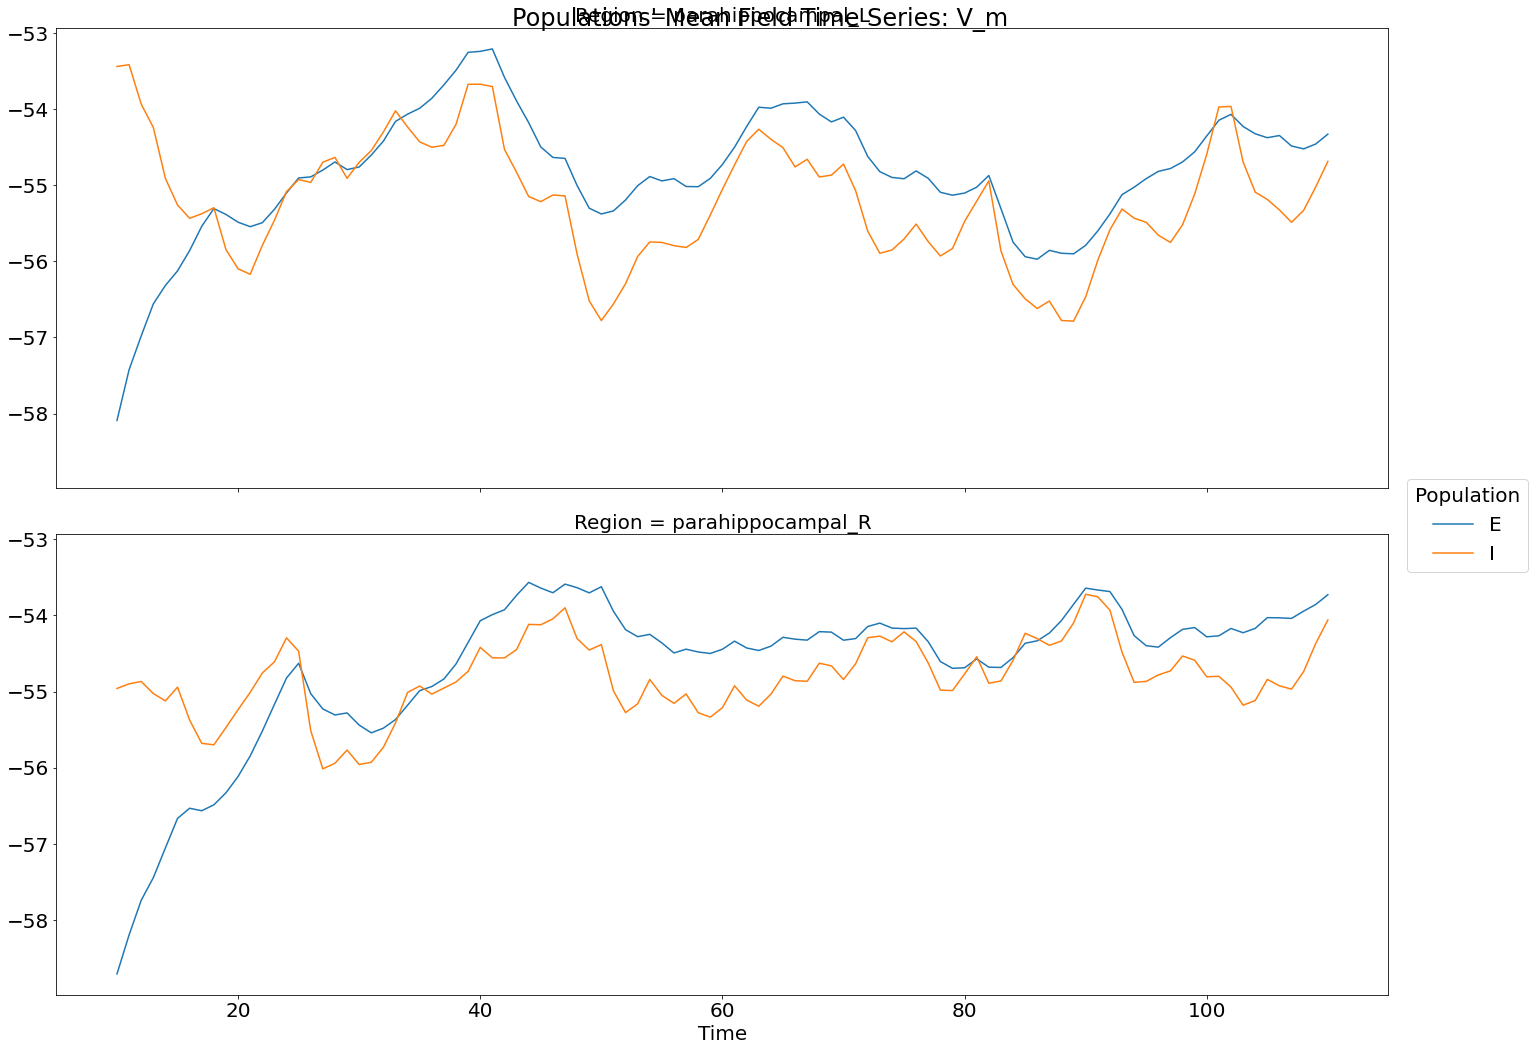

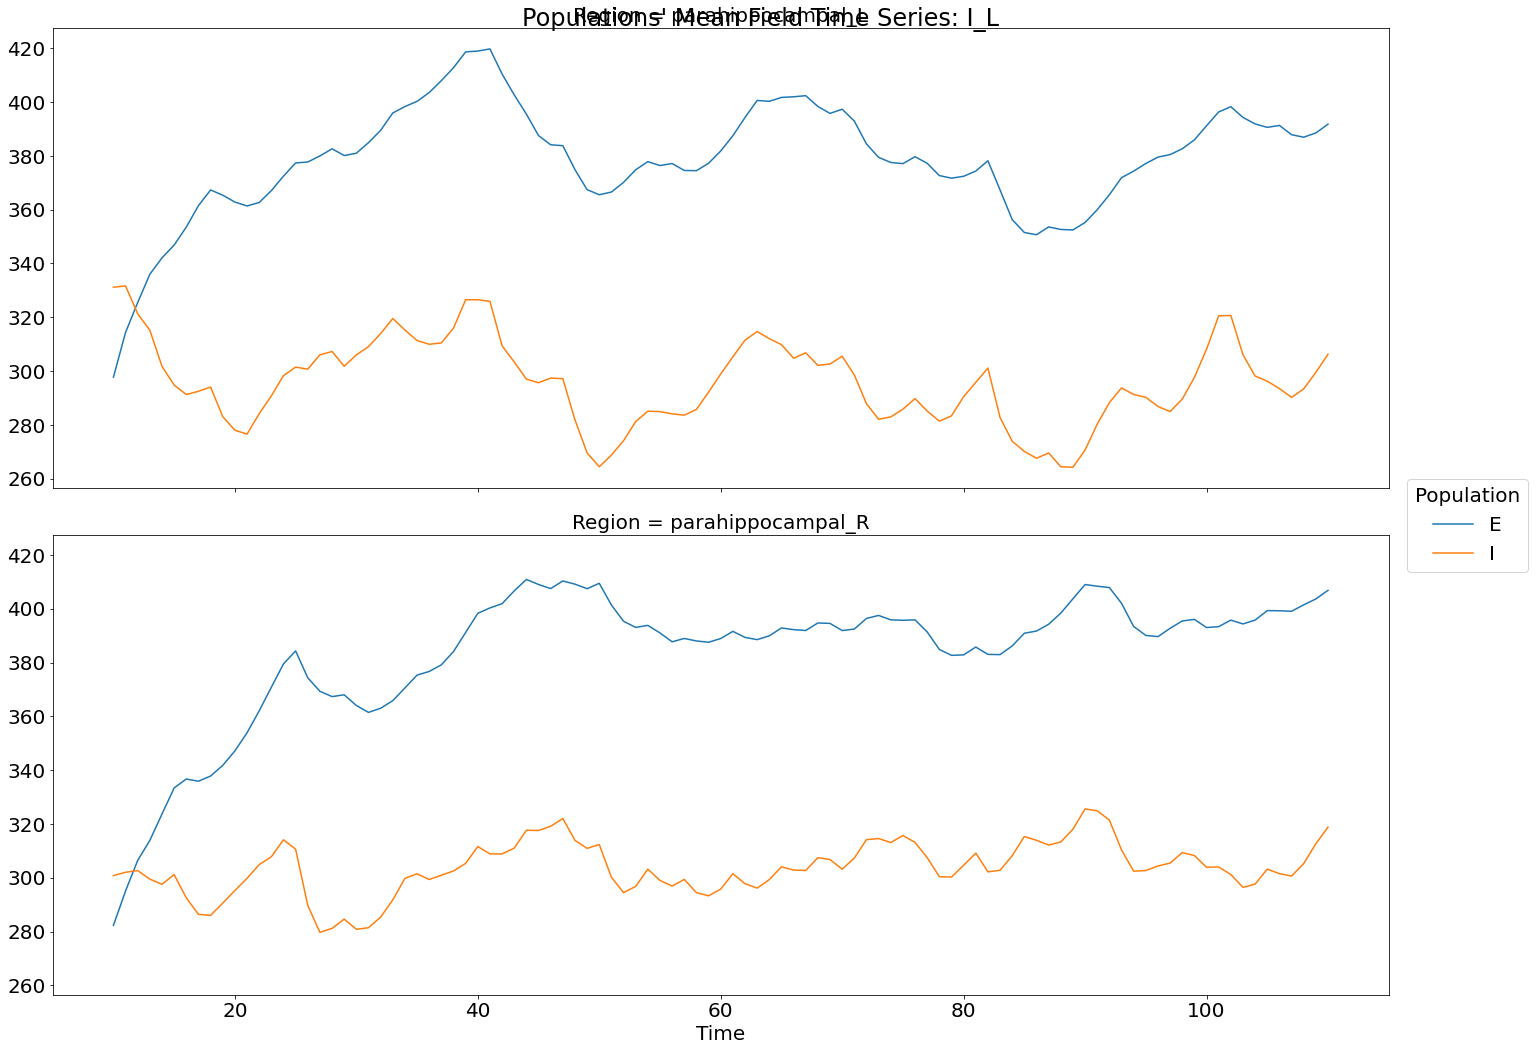

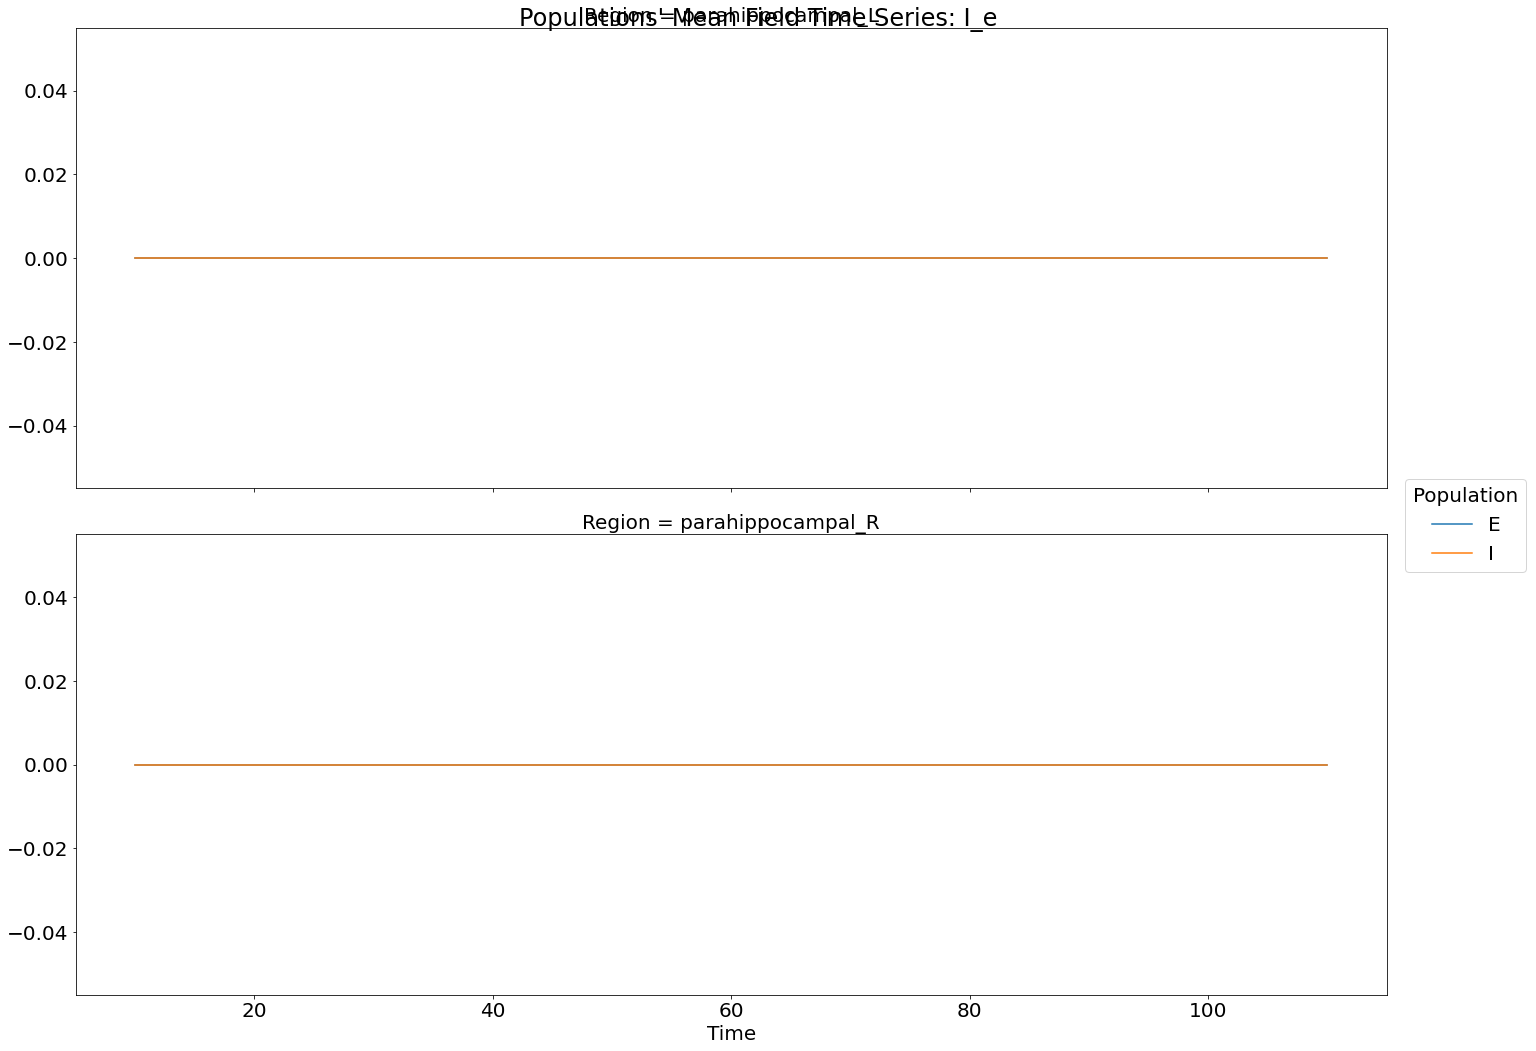

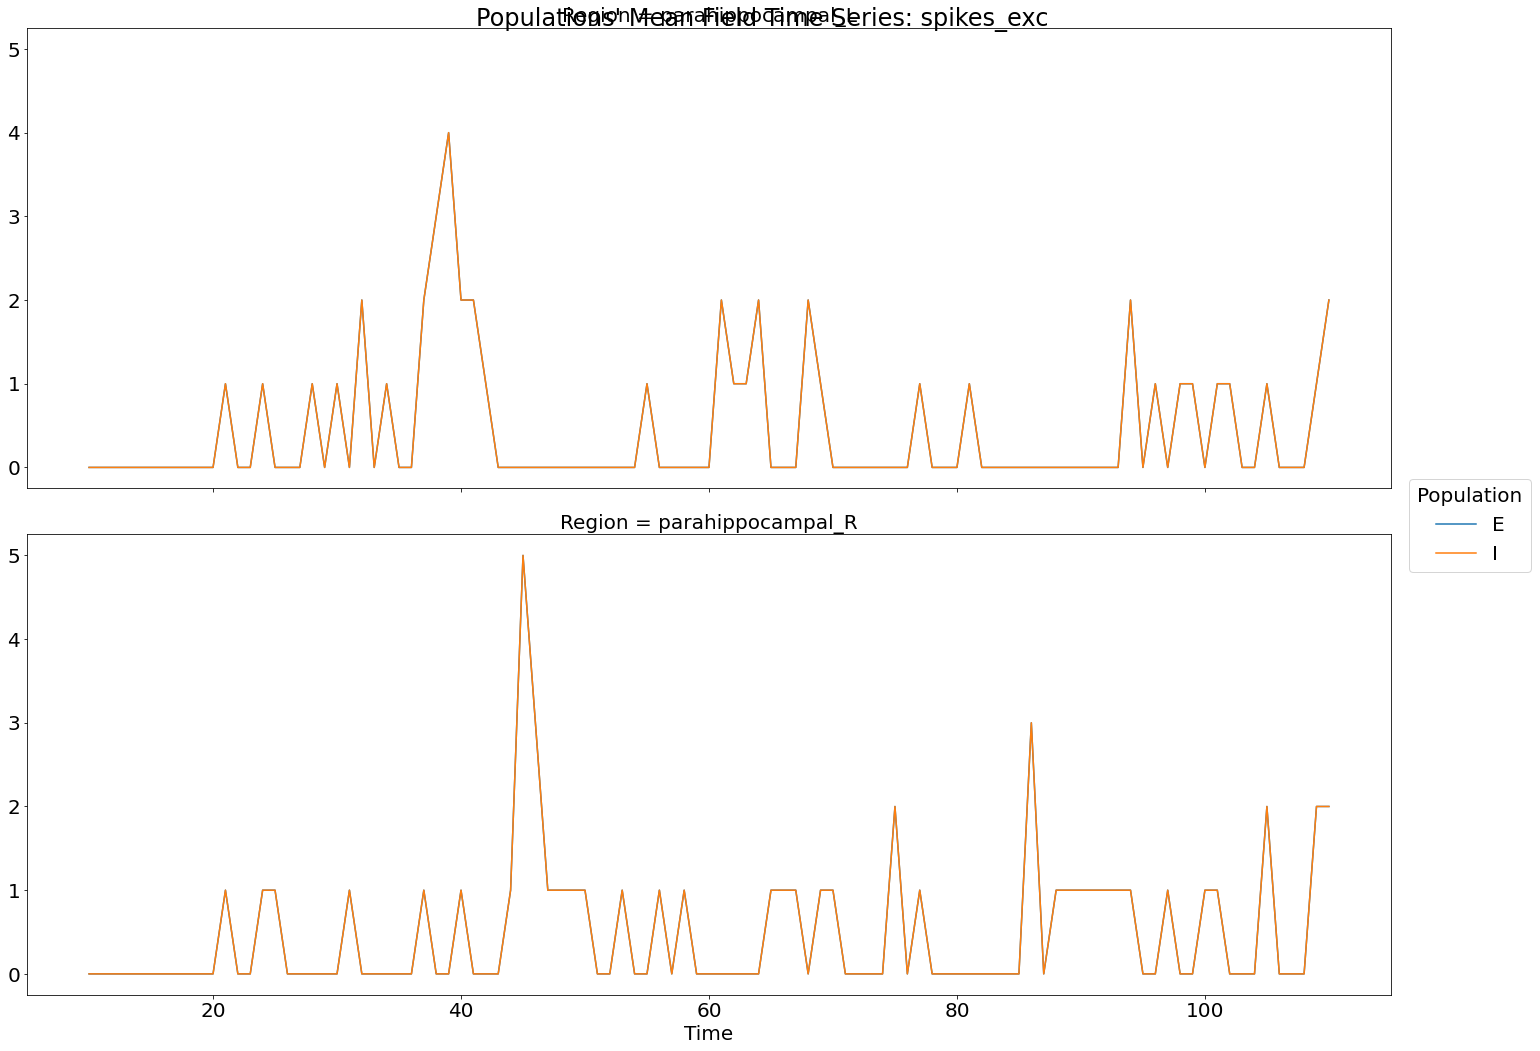

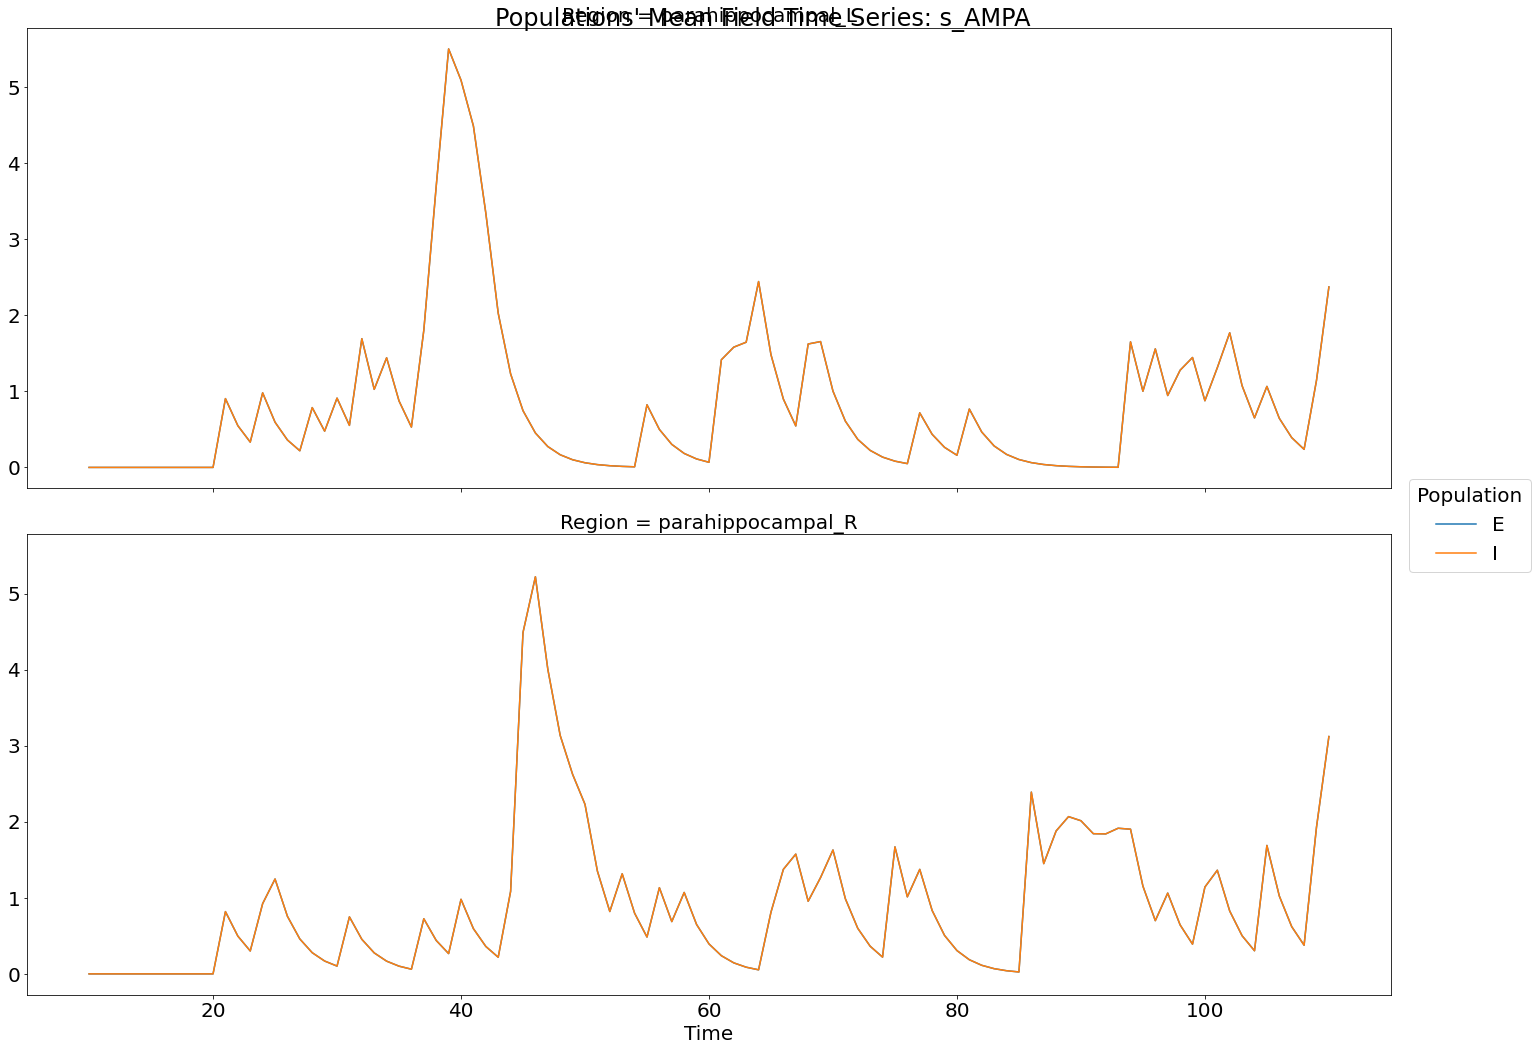

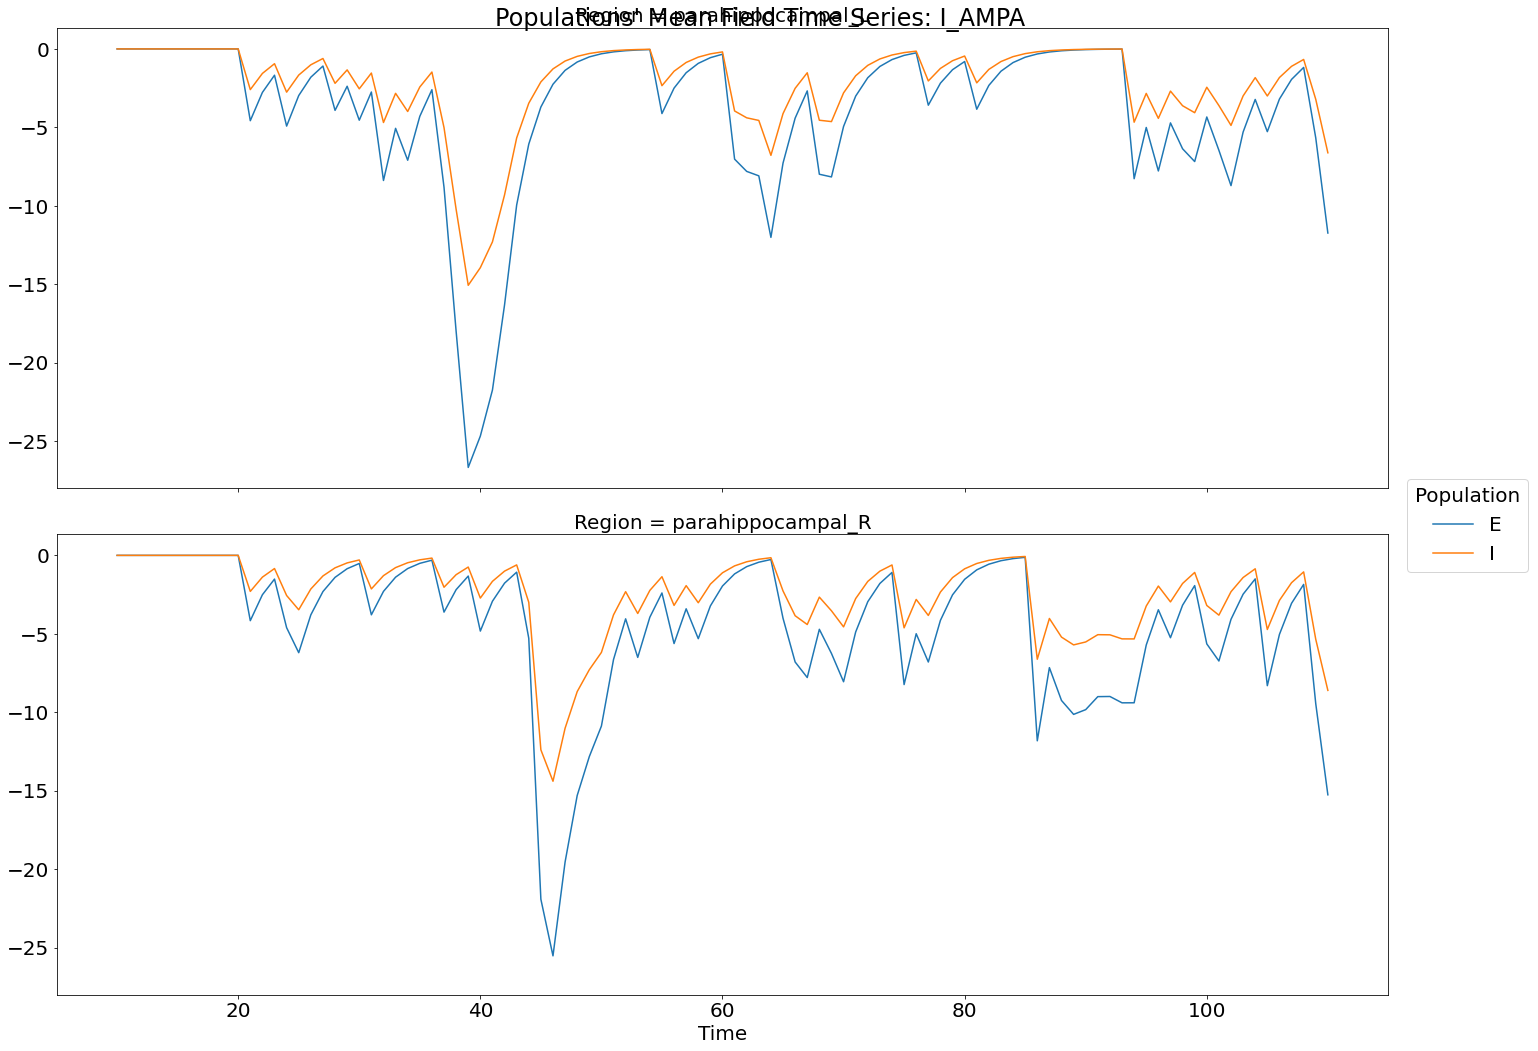

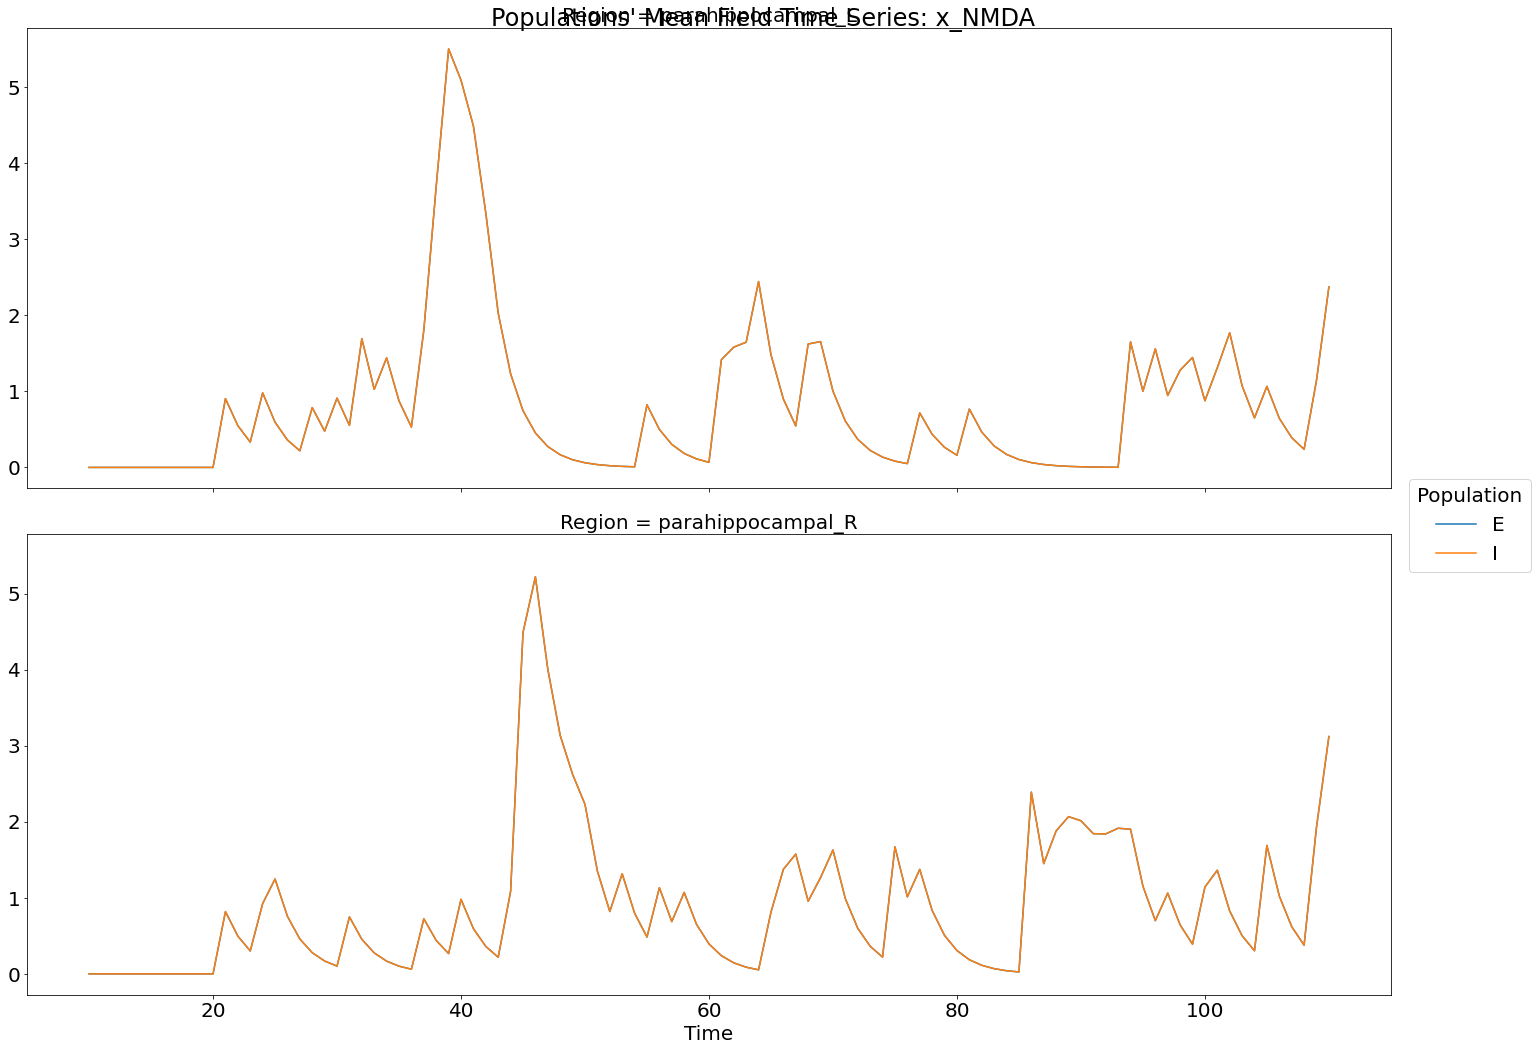

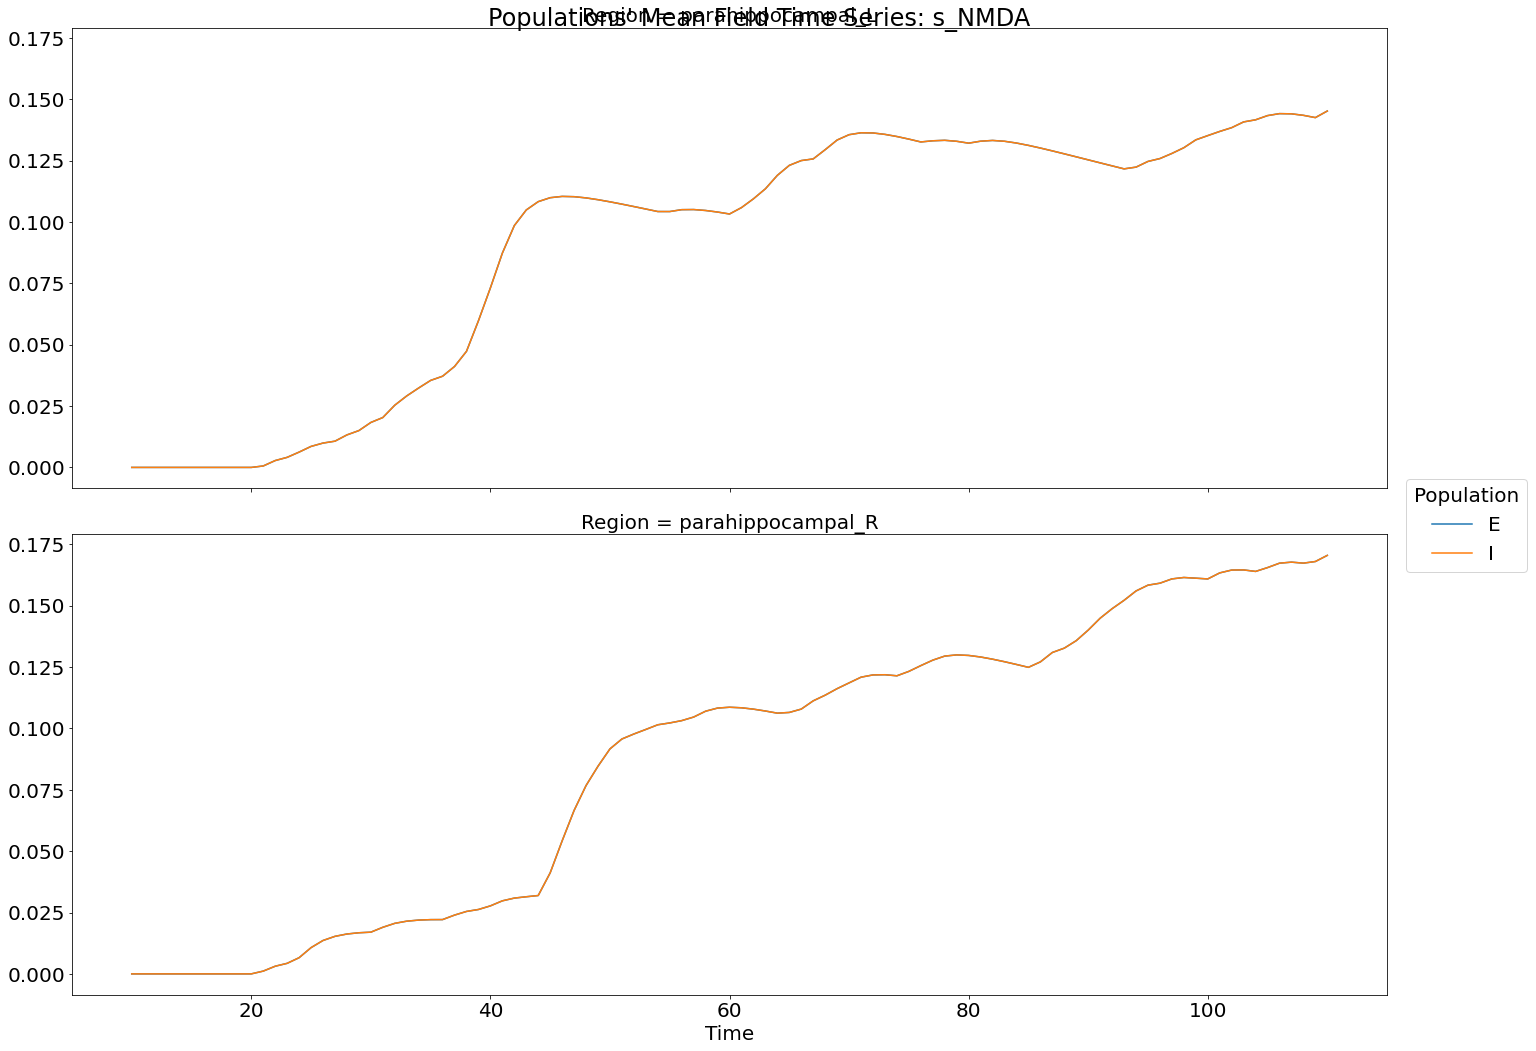

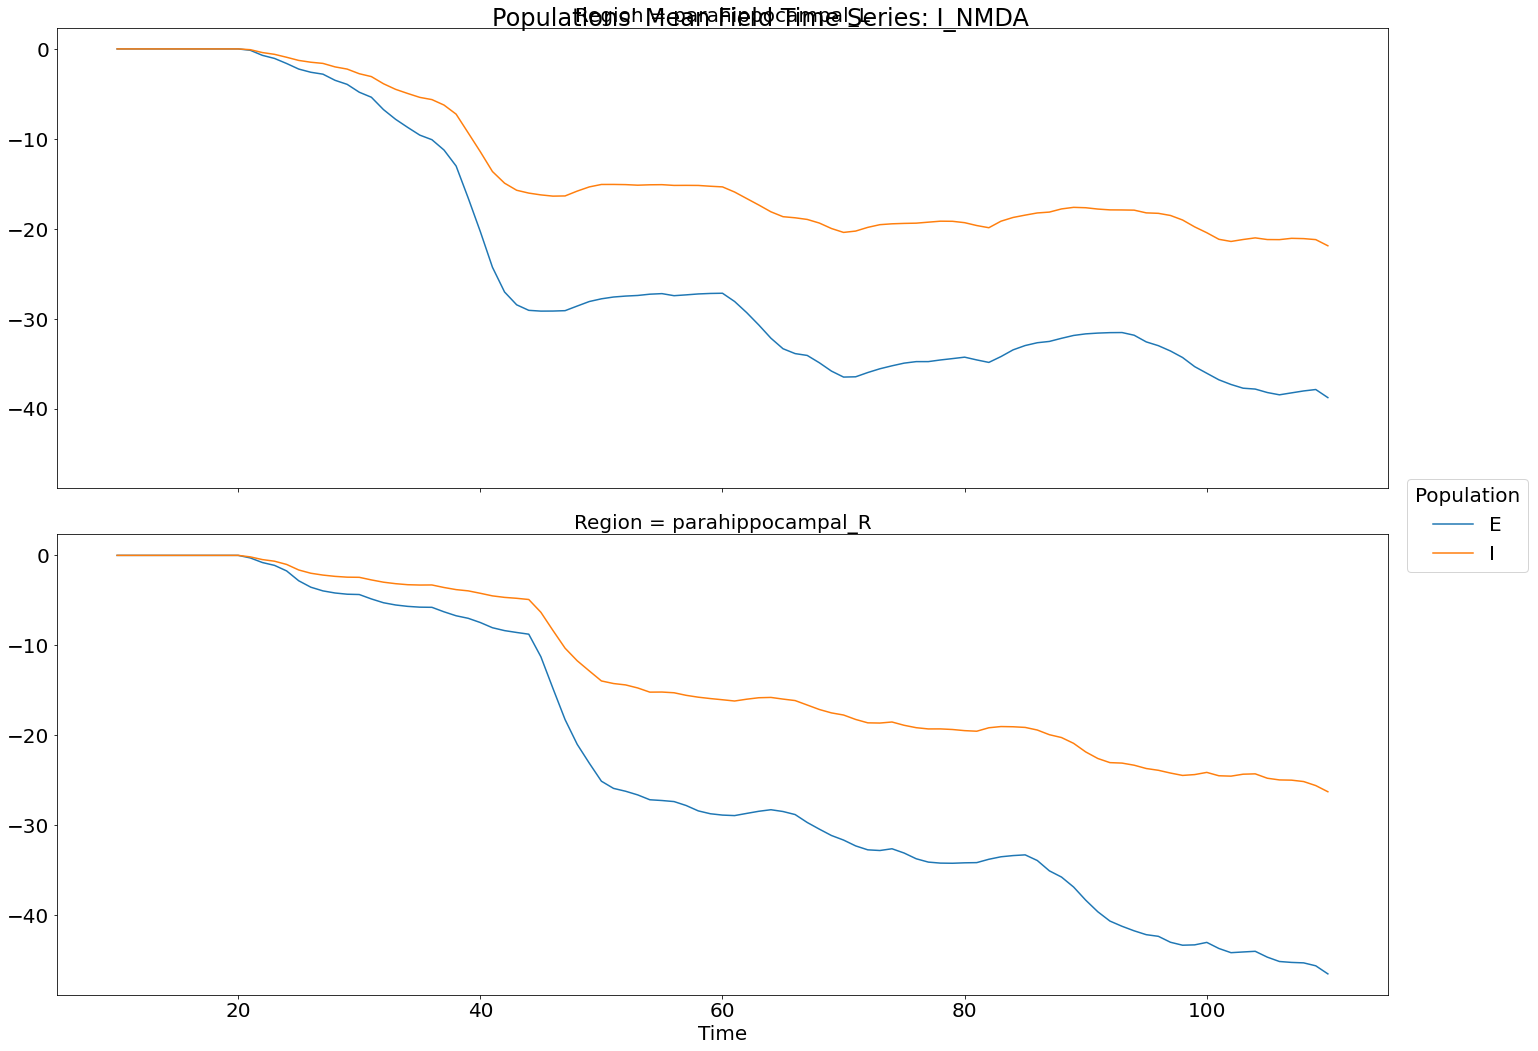

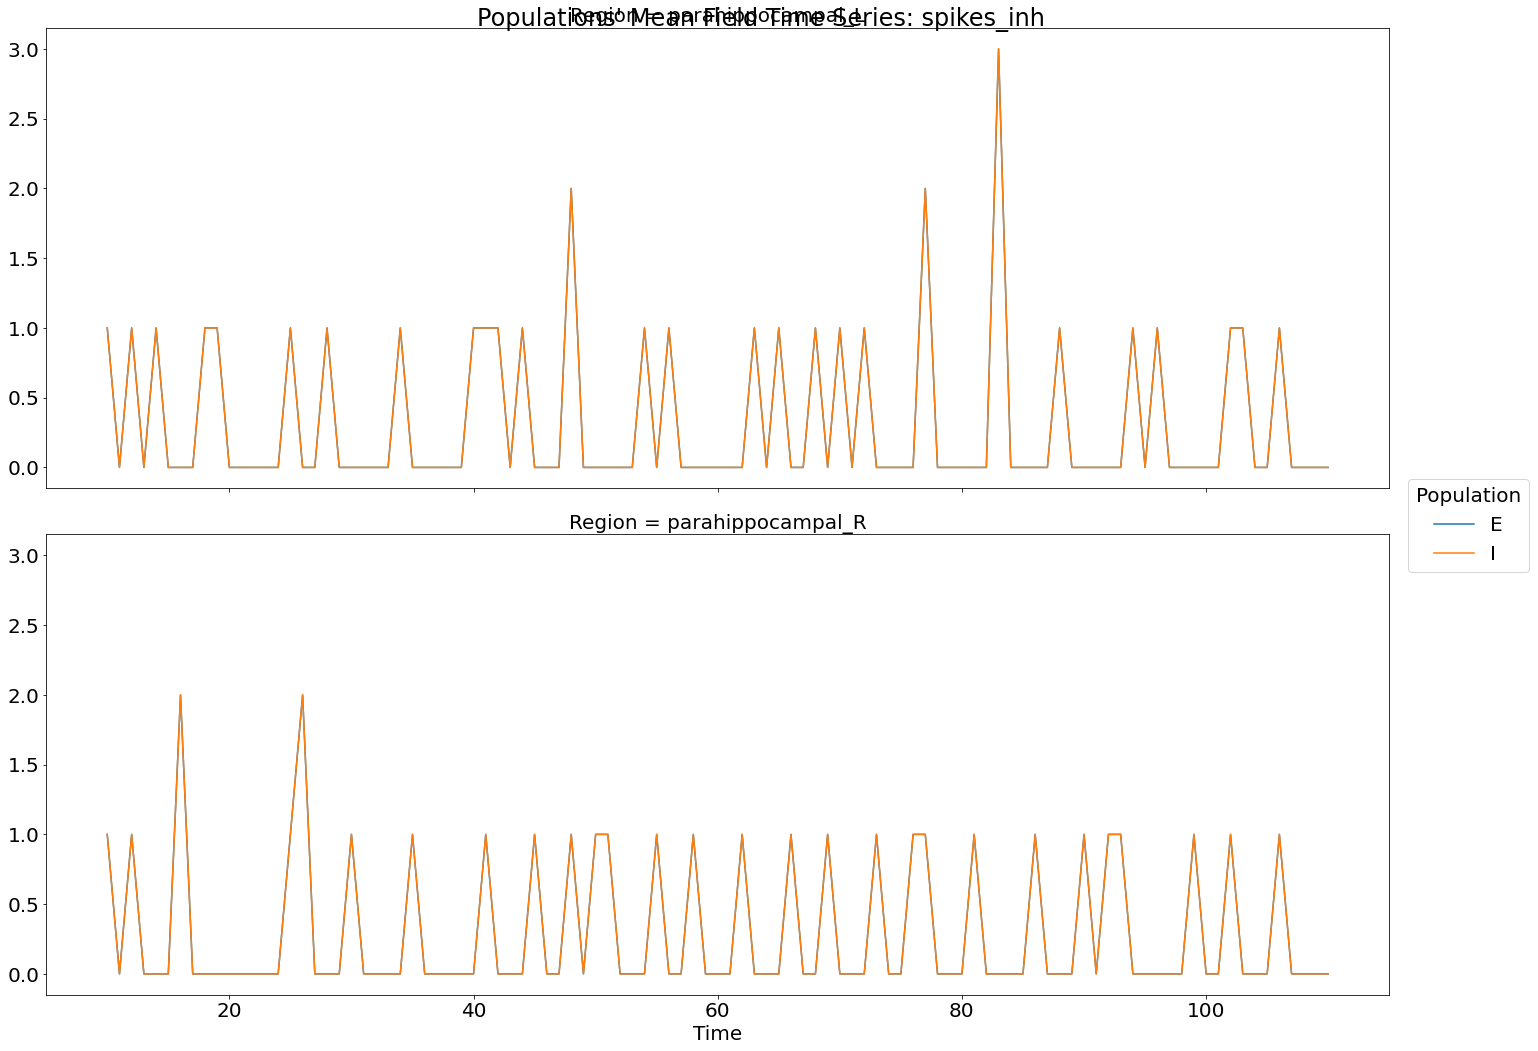

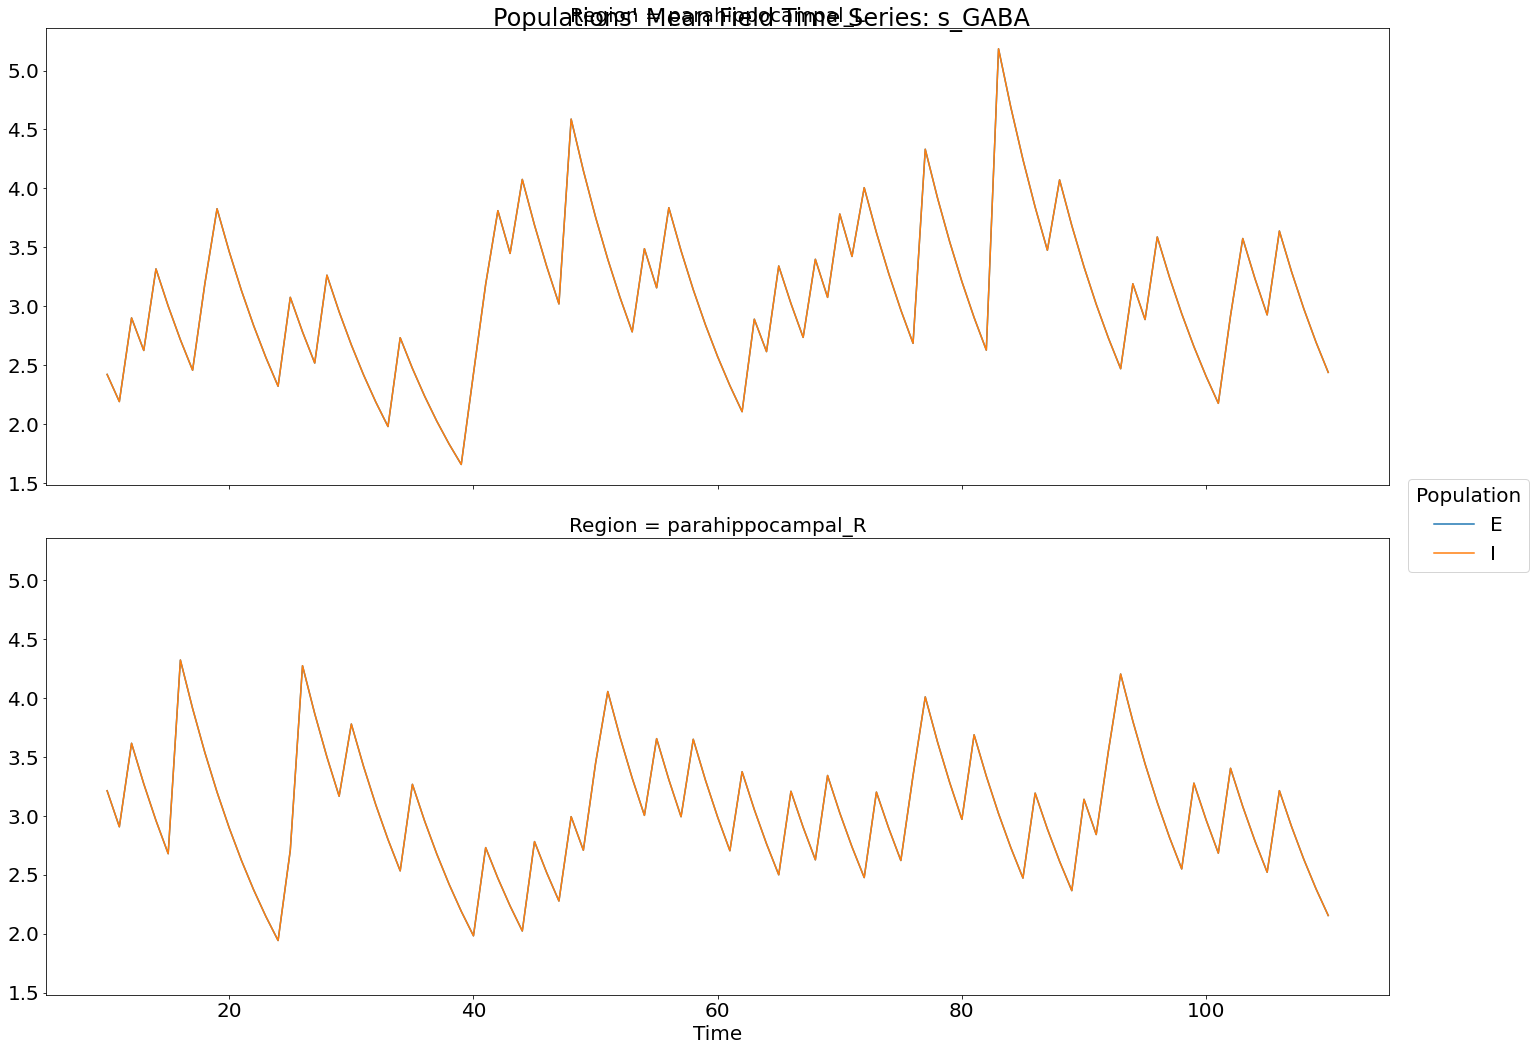

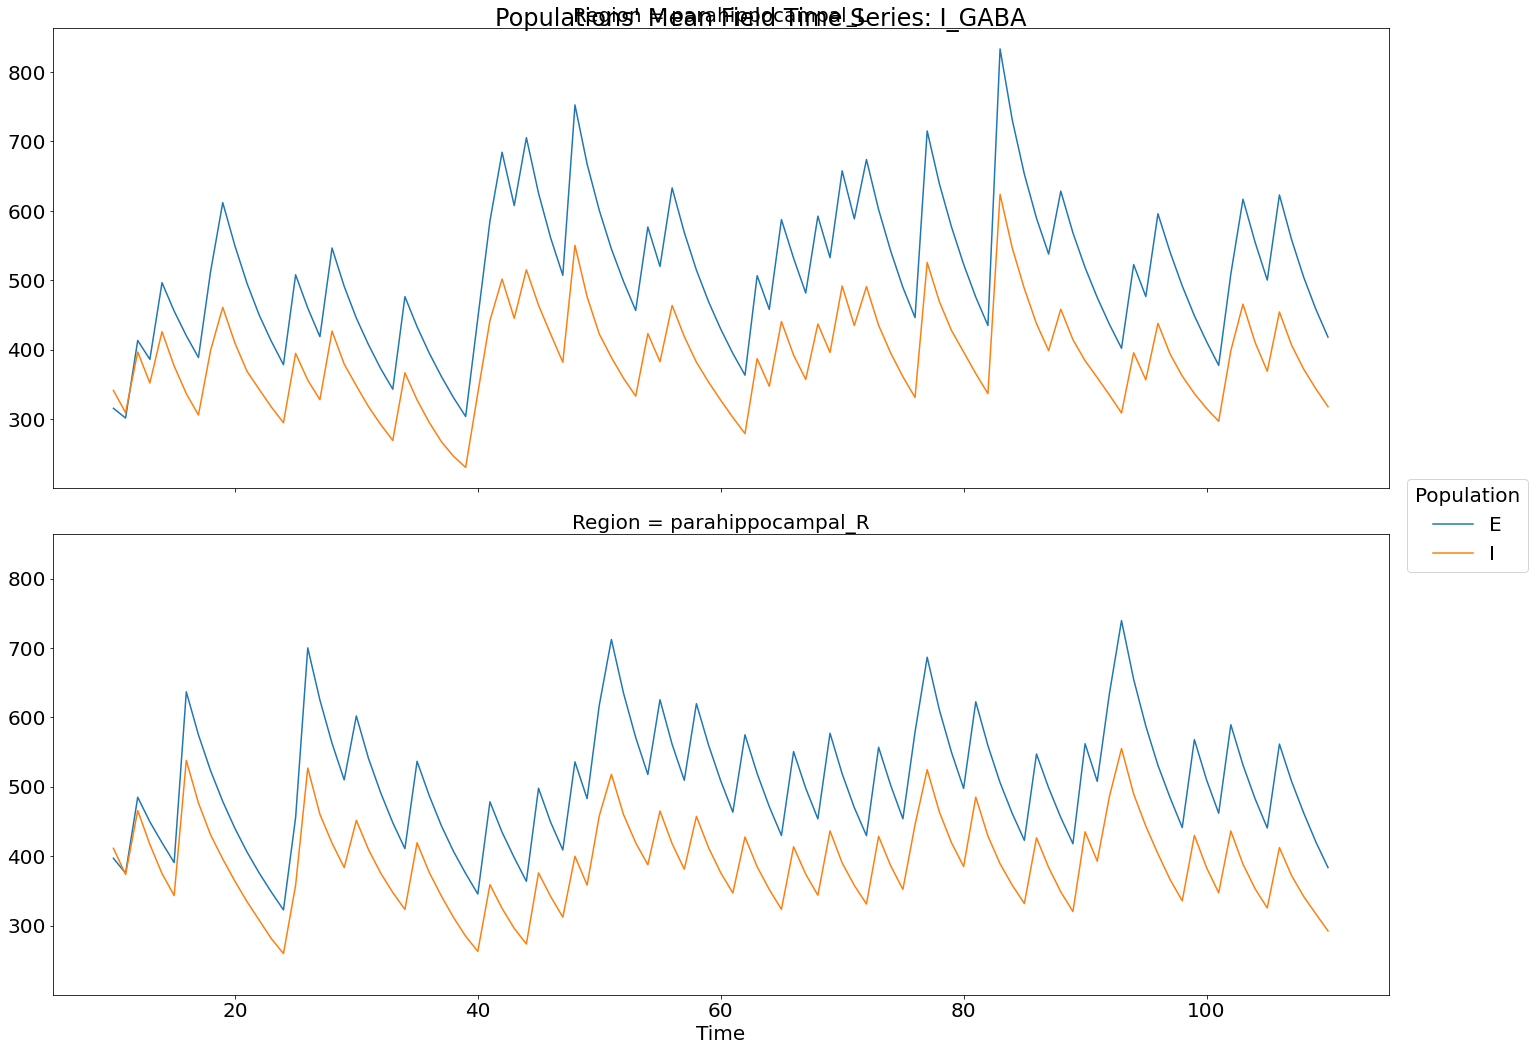

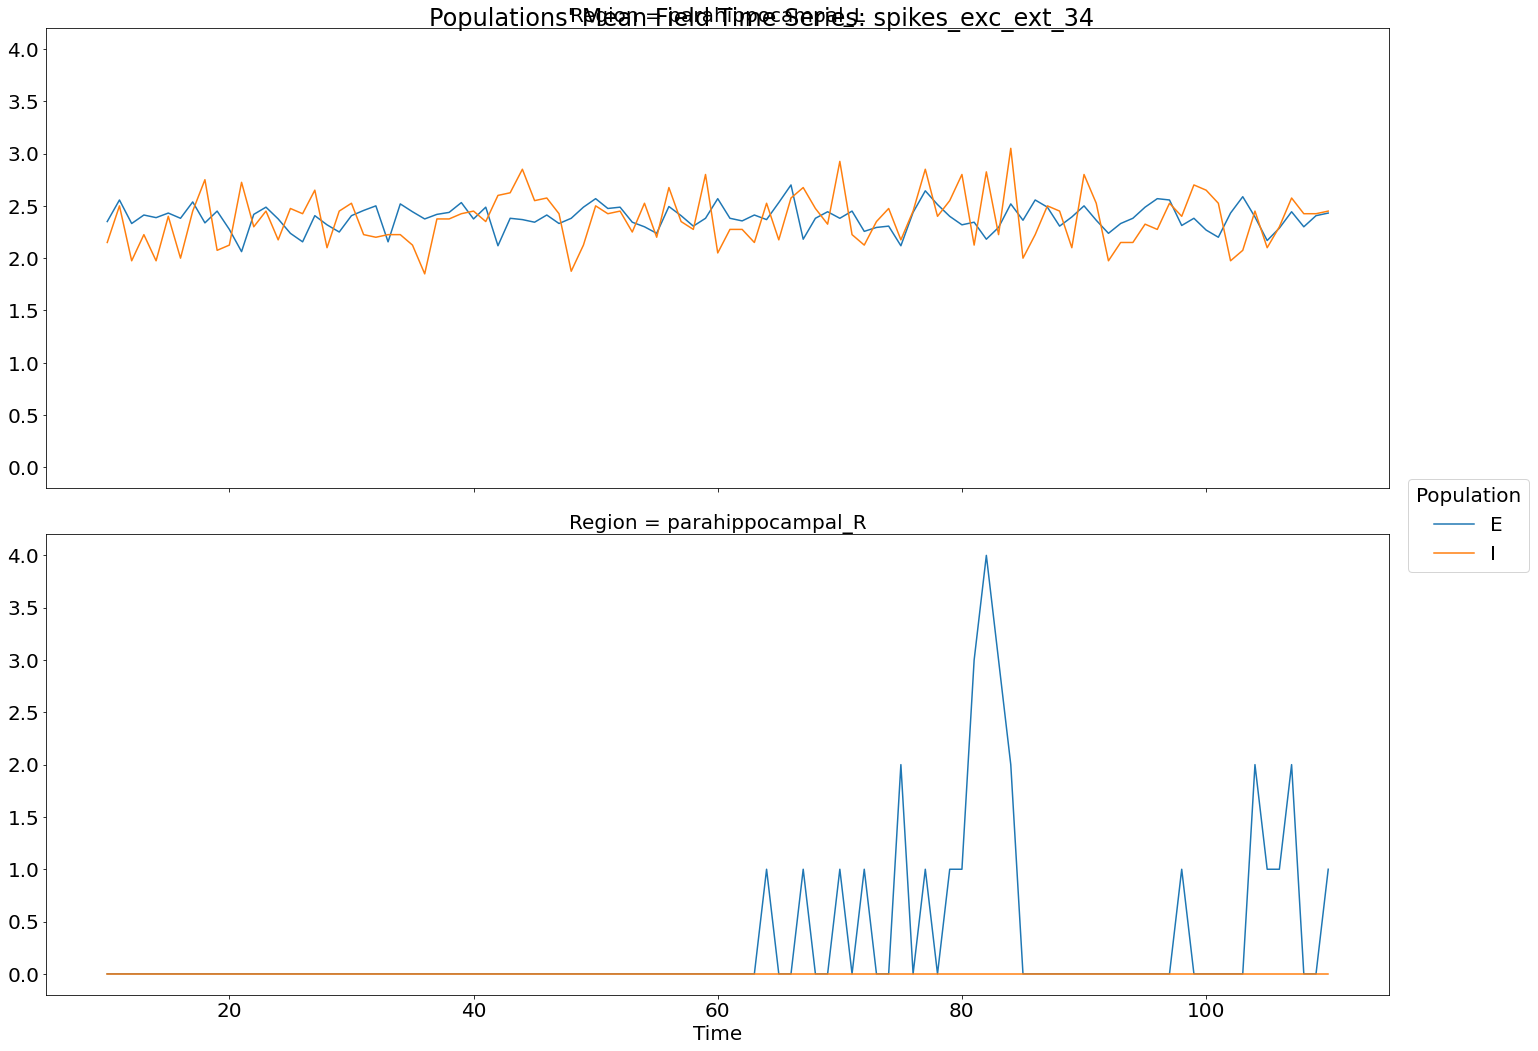

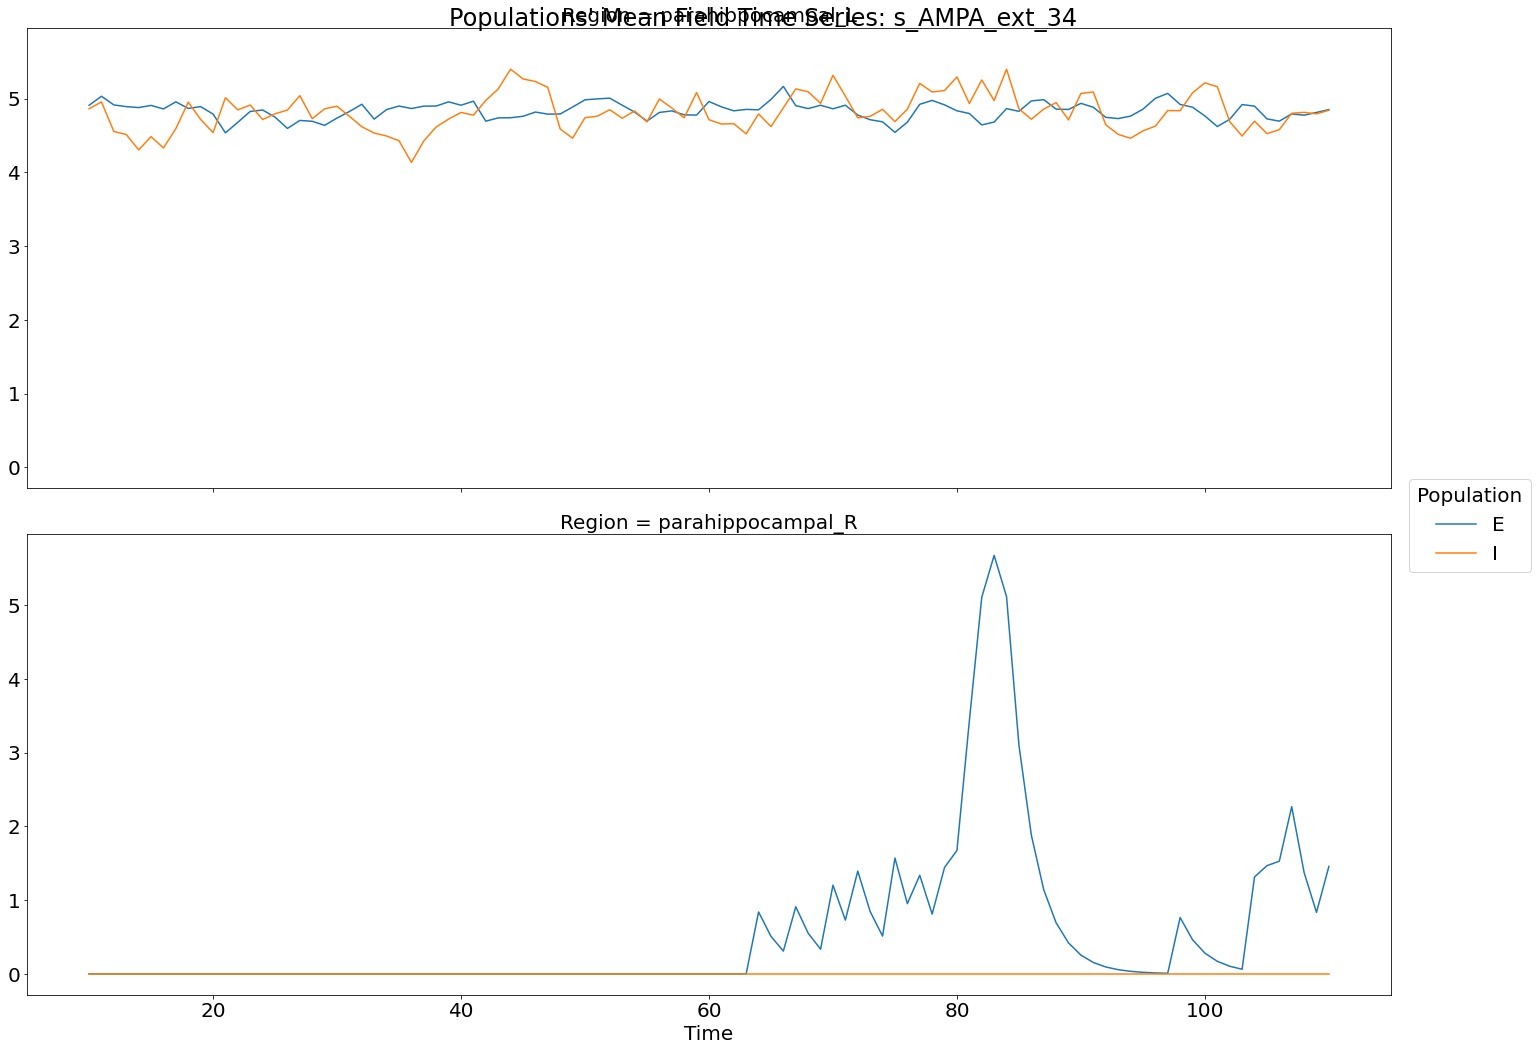

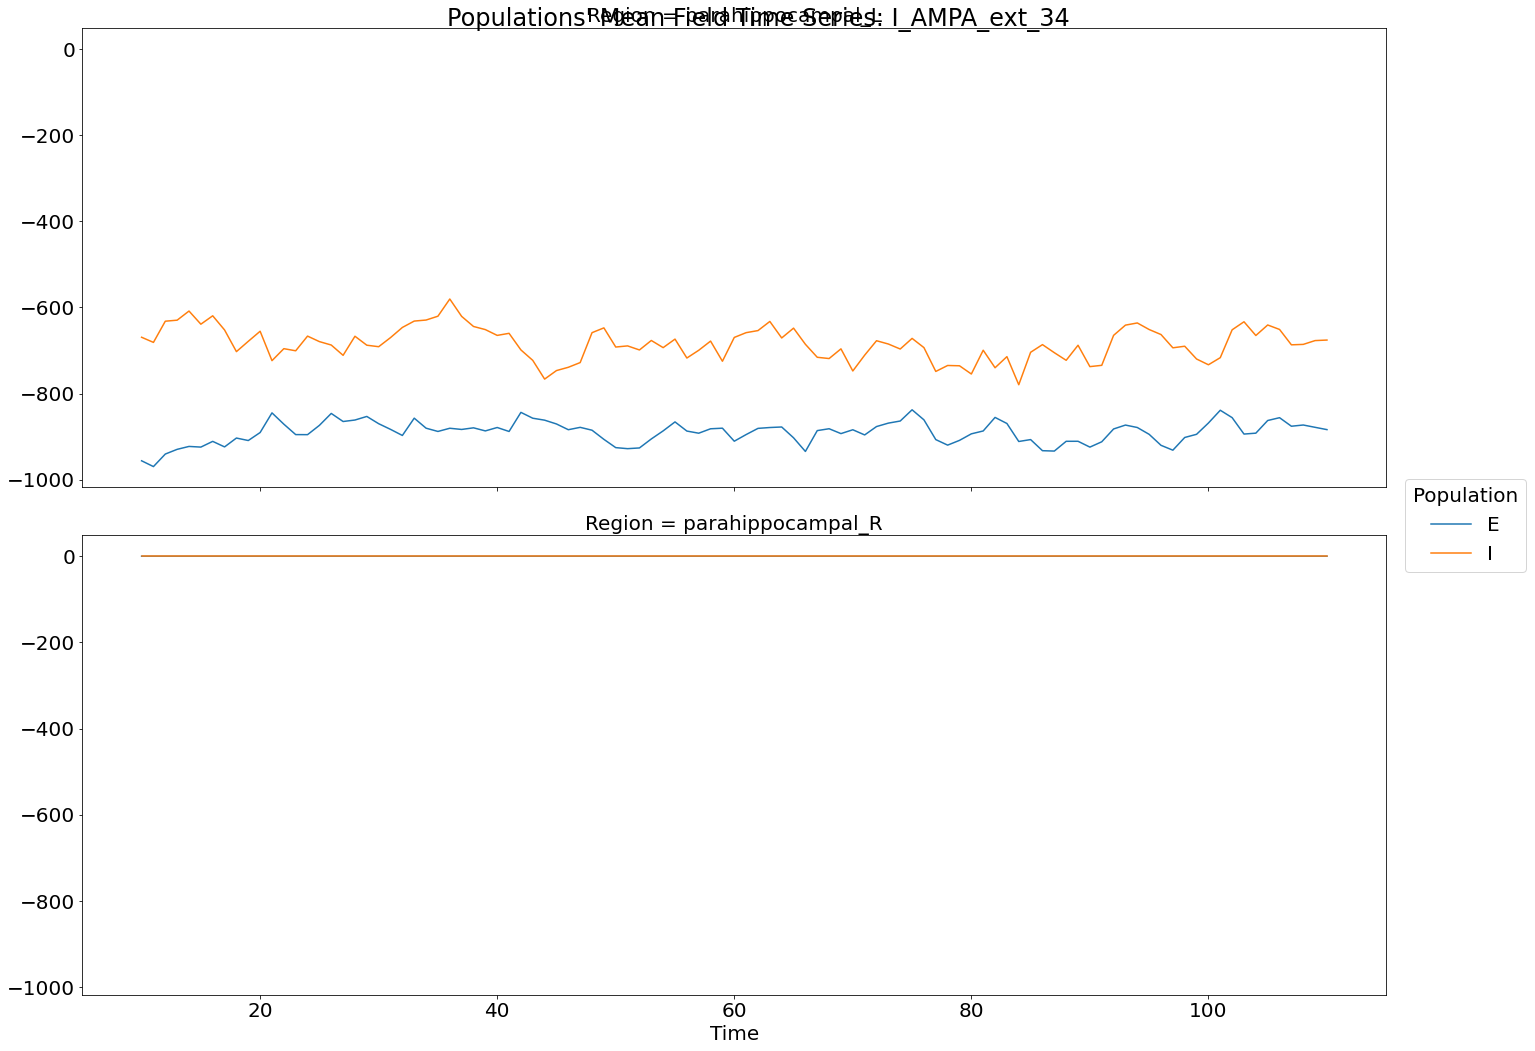

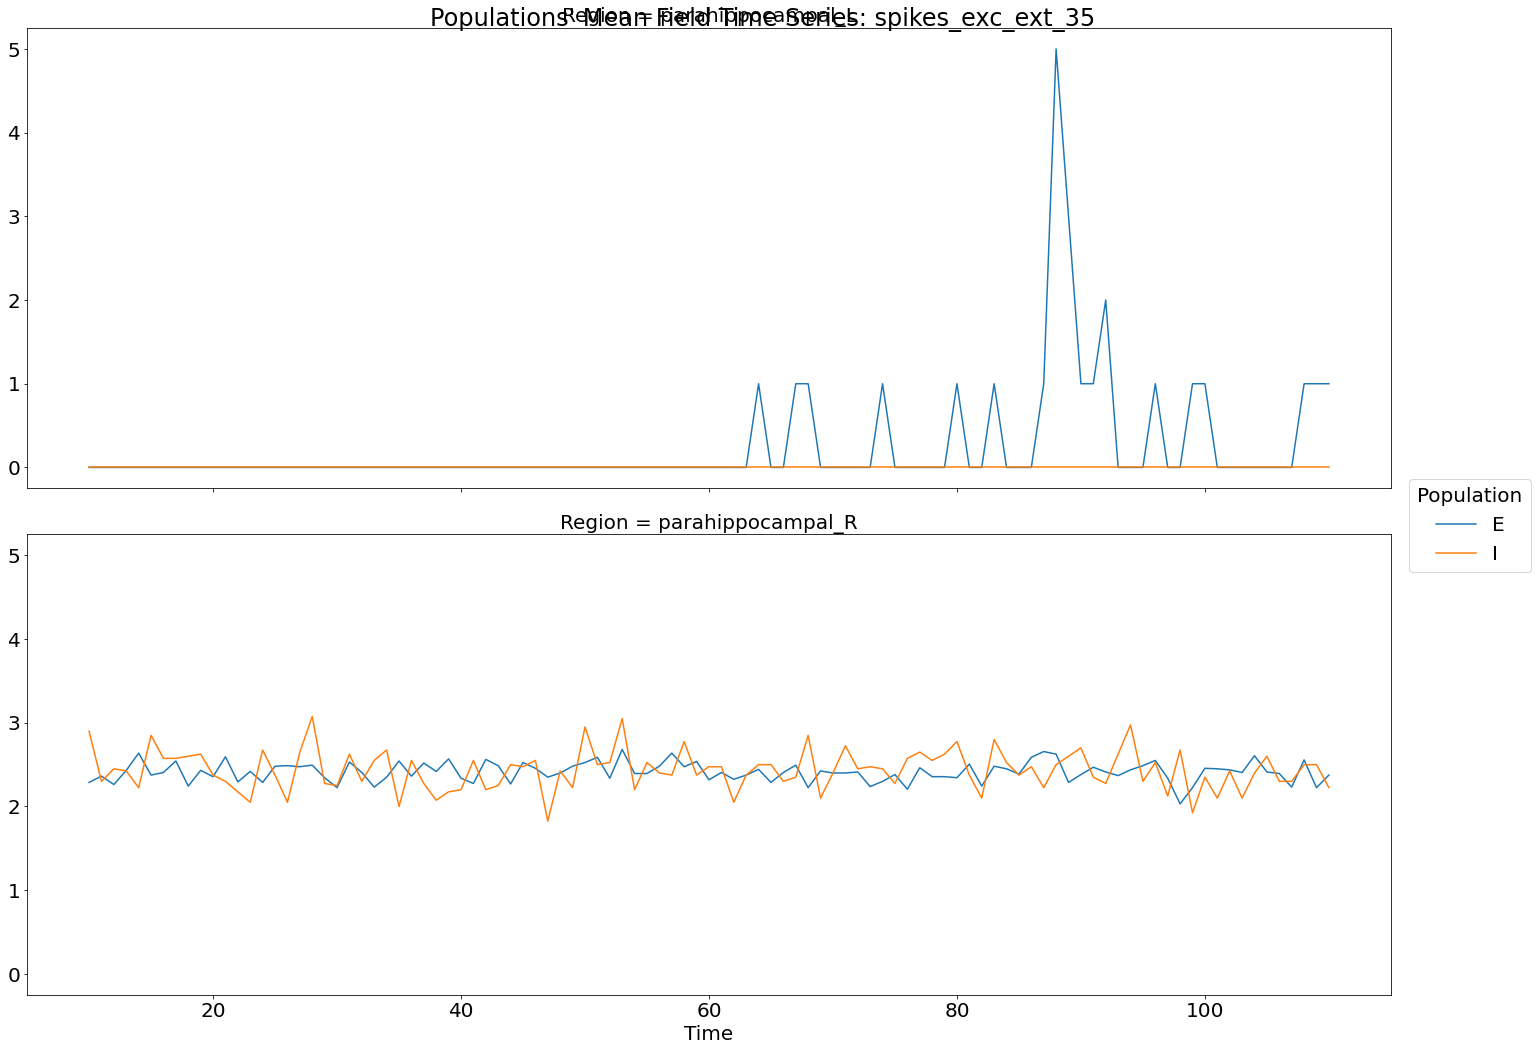

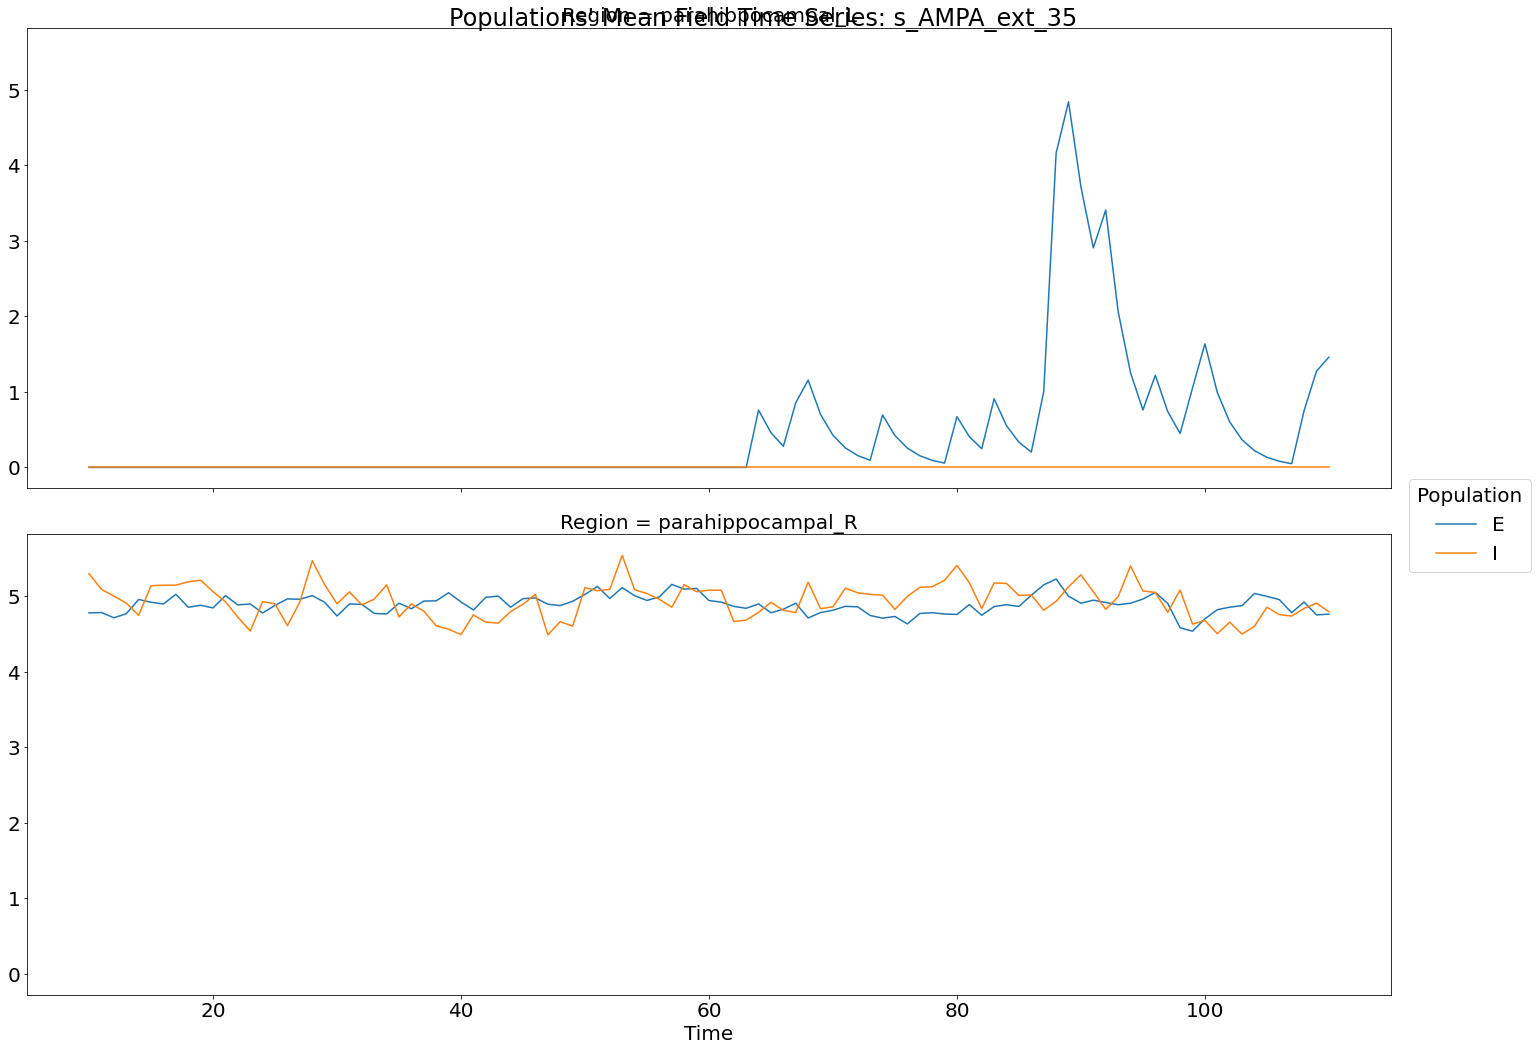

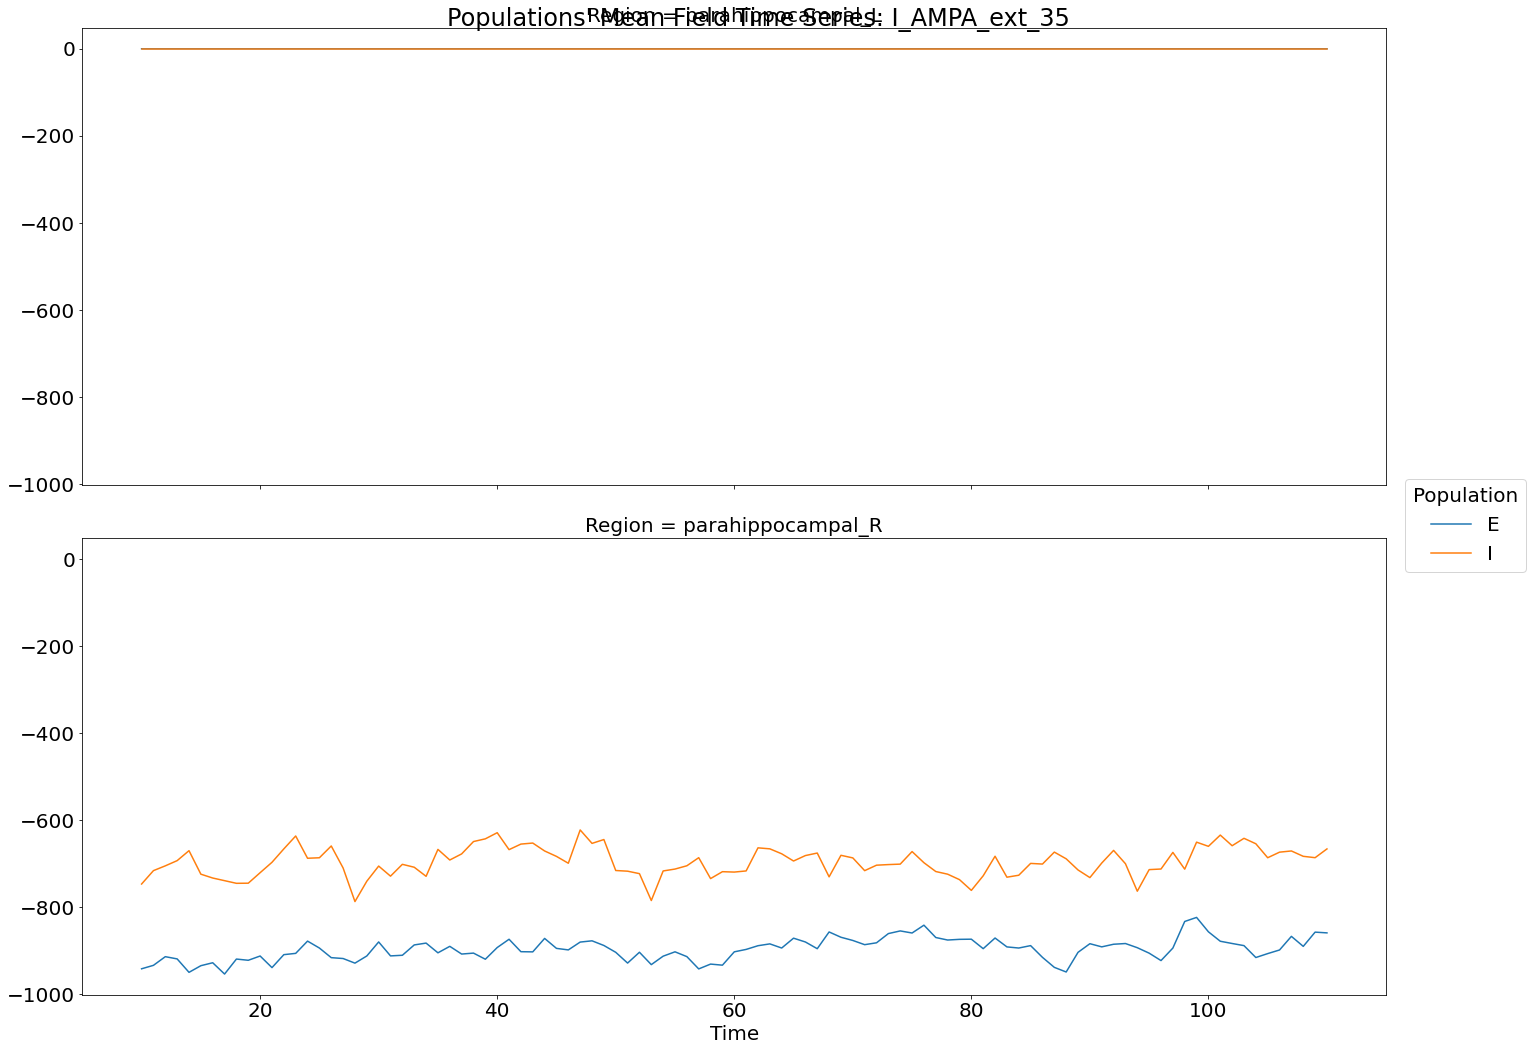

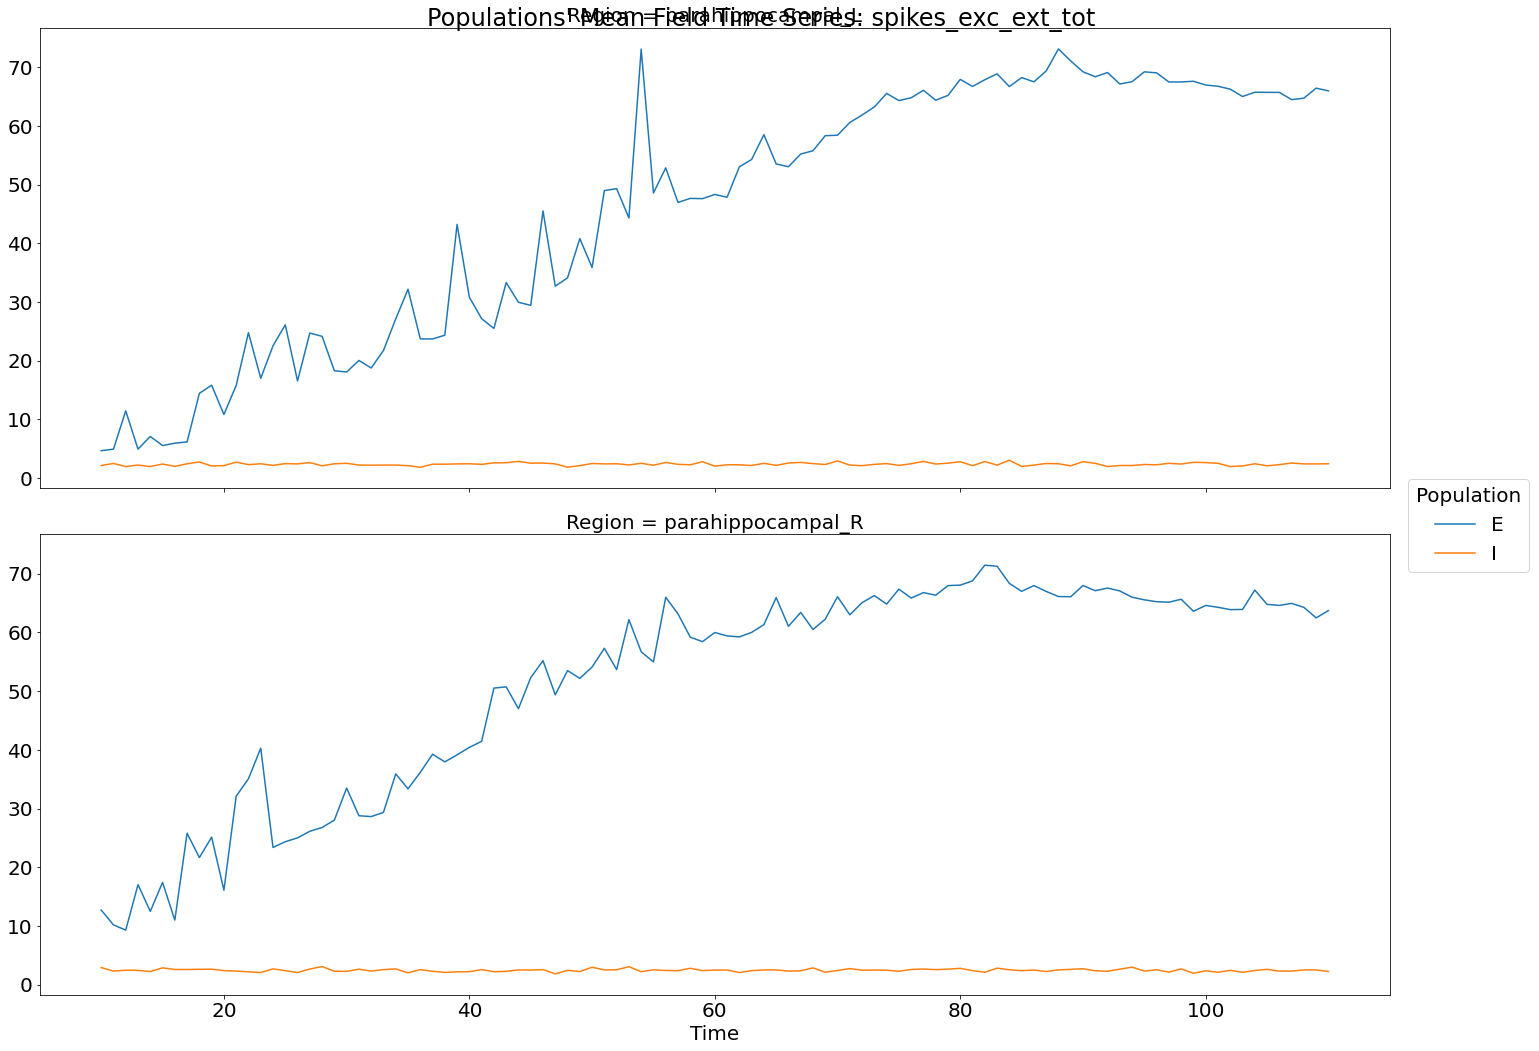

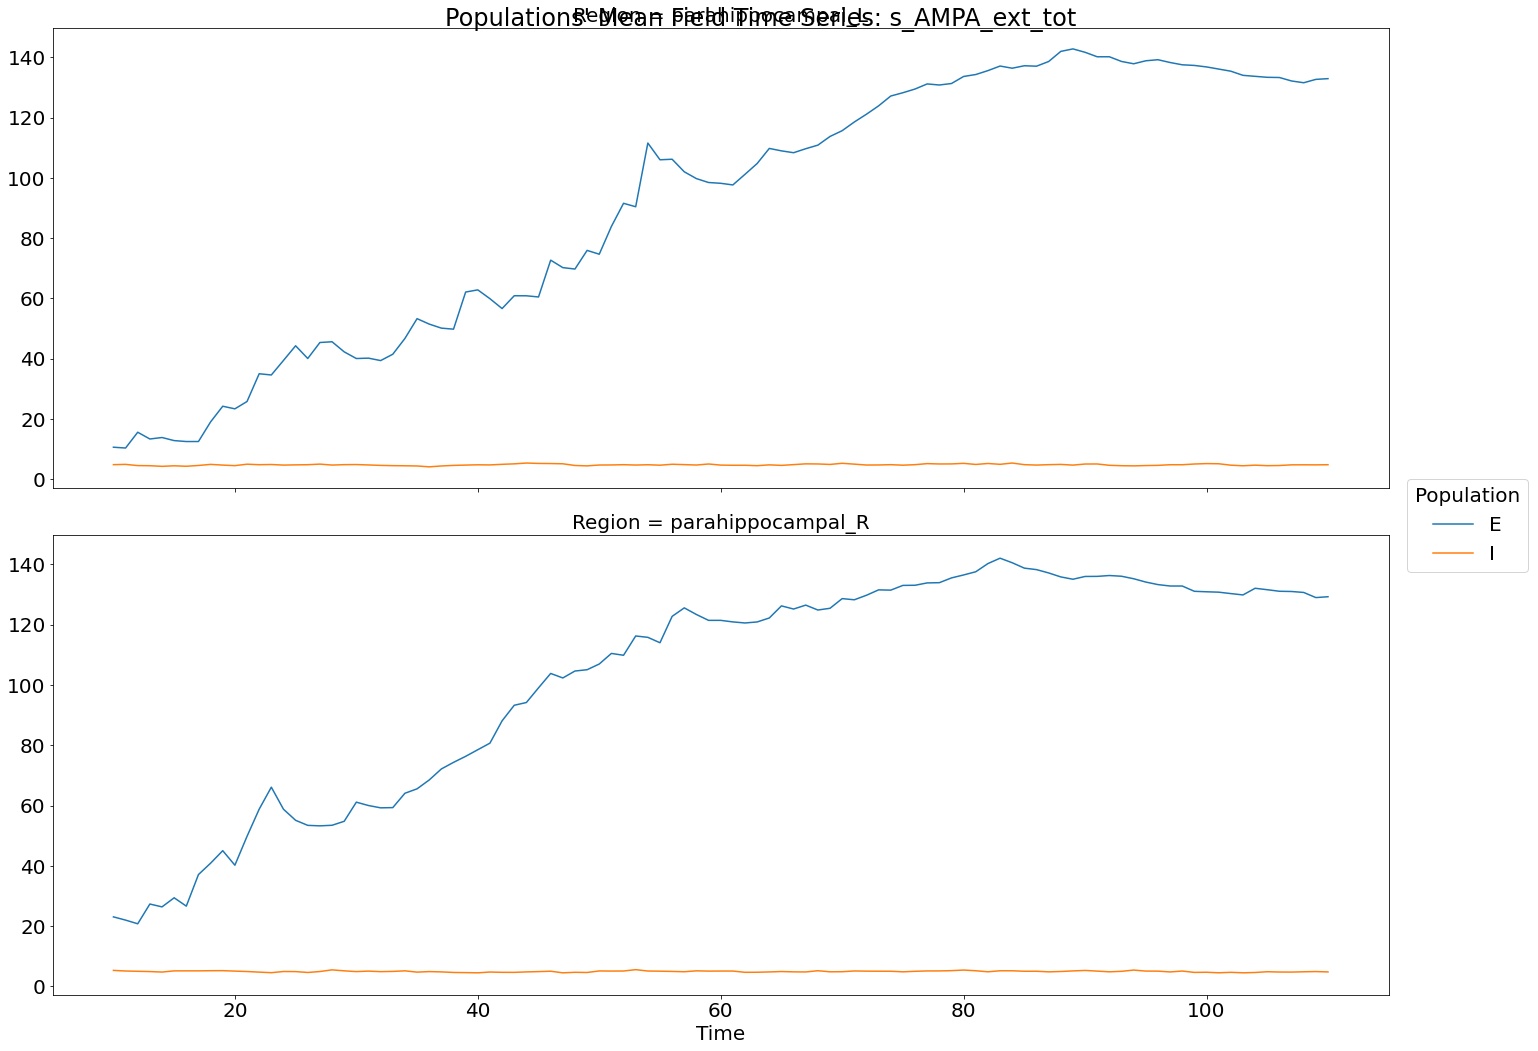

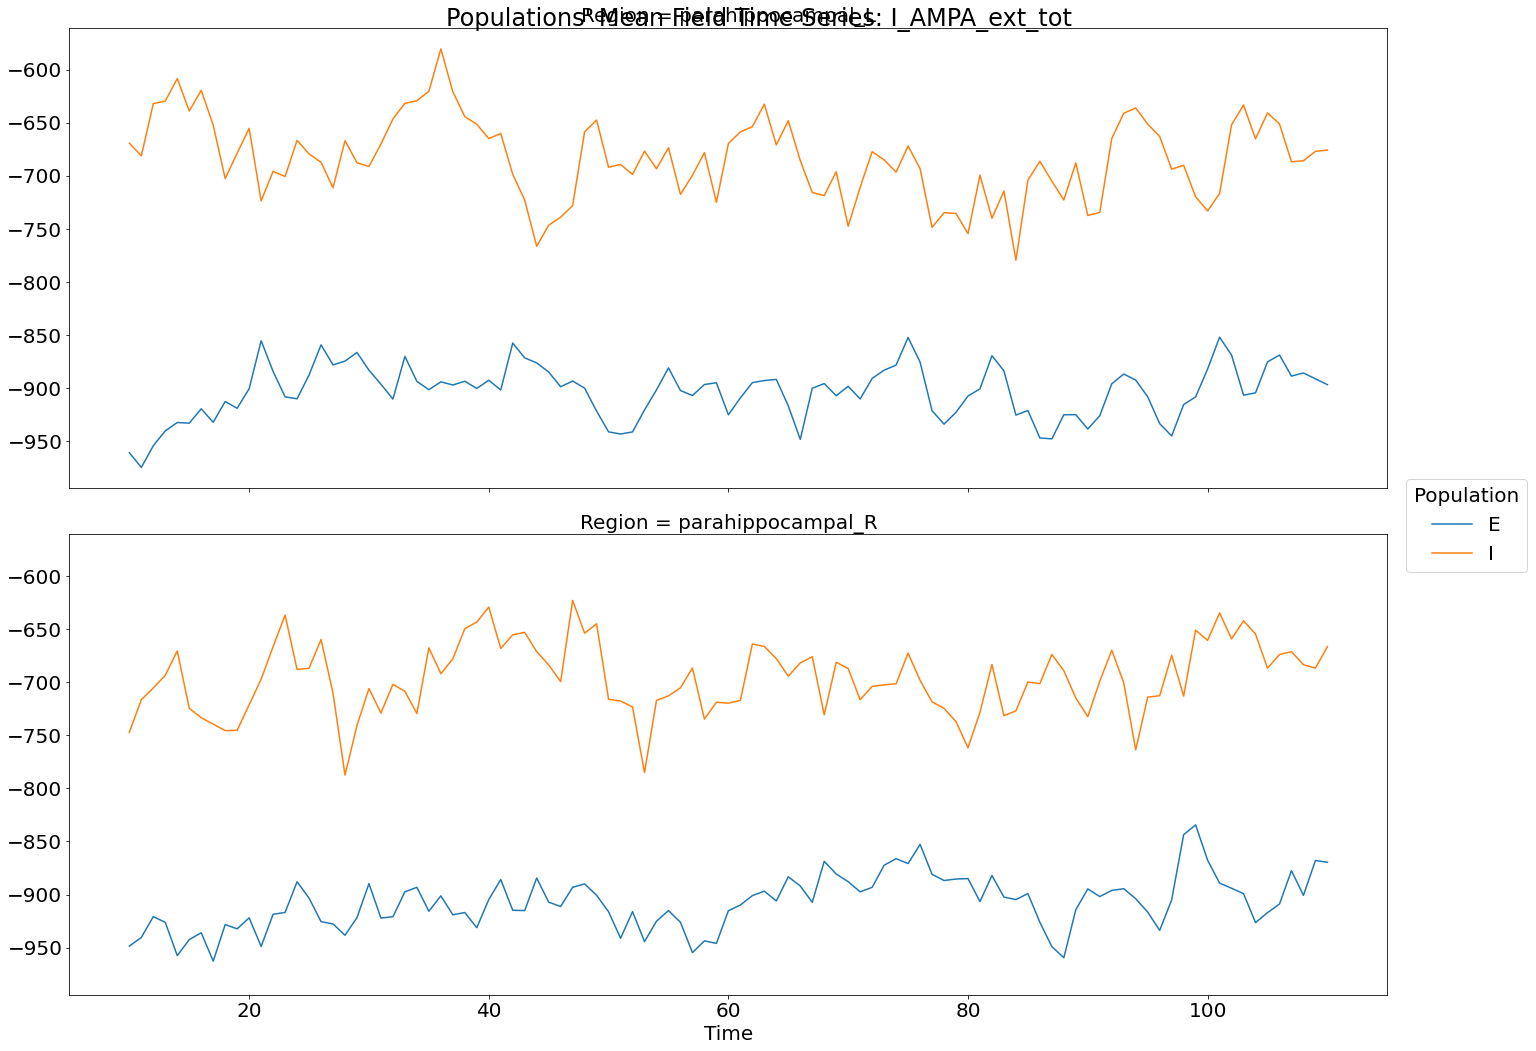

In [39]:
# Continuous time variables' data of spiking neurons
if plot_per_neuron:
    spikeNet_analyzer.return_data = True
else:
    spikeNet_analyzer.return_data = False
spikeNet_ts = \
    spikeNet_analyzer. \
         compute_spikeNet_mean_field_time_series(populations_devices=None, regions=None, variables=None,
                                                 computations_kwargs={}, data_kwargs={}, return_devices=False)
if spikeNet_ts:
    if plot_per_neuron:
        mean_field_ts = spikeNet_ts["mean_field_time_series"]  # mean field
        spikeNet_ts = spikeNet_ts["data_by_neuron"]  # per neuron data
    else:
        mean_field_ts = spikeNet_ts
        spikeNet_ts = None
    if mean_field_ts and mean_field_ts.size > 0:
        # Compute total sum of external synapses time series:
        mean_field_ext_mean = mean_field_ts[:, :3]
        for ilbl, lbl in enumerate(["spikes_exc_ext_0", "s_AMPA_ext_0", "I_AMPA_ext_0"]):
            mean_field_ext_mean._data[:, ilbl] = mean_field_ts[:, lbl::3].sum(axis=1)
        mean_field_ext_mean._data.name = "Total External Synapses' Mean Field Time Series"
        coords = dict(mean_field_ext_mean.coords)
        coords["Variable"] = ["spikes_exc_ext_tot", "s_AMPA_ext_tot", "I_AMPA_ext_tot"]
        mean_field_ext_mean._data = mean_field_ext_mean._data.assign_coords(coords)
        # Plot main and internal synapses' time series:
        mean_field_ts[:, :"I_GABA"].plot_timeseries(plotter_config=plotter.config, 
                                                    per_variable=mean_field_ts.shape[1] > MAX_VARS_IN_COLS)
        # Plot time series of nest_nodes_ids nodes' external synapses:
        for ind in nest_model_builder.spiking_nodes_inds:
            labels = ["spikes_exc_ext_%d" % ind, "s_AMPA_ext_%d" % ind, "I_AMPA_ext_%d" % ind]
            mean_field_ts[:, labels].plot_timeseries(plotter_config=plotter.config, 
                                                     per_variable=mean_field_ts.shape[1] > MAX_VARS_IN_COLS)
        # Plot total sum of external synapses' times series
        mean_field_ext_mean.plot_timeseries(plotter_config=plotter.config, 
                                            per_variable=mean_field_ts.shape[1] > MAX_VARS_IN_COLS)
        if mean_field_ts.number_of_labels > MIN_REGIONS_FOR_RASTER_PLOT:
            mean_field_ts[:, :"I_GABA"].plot_raster(plotter_config=plotter.config, 
                                                    per_variable=mean_field_ts.shape[1] > MAX_VARS_IN_COLS,
                                                    linestyle="--", alpha=0.5, linewidth=0.5)
            for ind in nest_model_builder.spiking_nodes_inds:
                labels = ["spikes_exc_ext_%d" % ind, "s_AMPA_ext_%d" % ind, "I_AMPA_ext_%d" % ind]
                mean_field_ts[:, labels].plot_raster(plotter_config=plotter.config, 
                                                     per_variable=mean_field_ts.shape[1] > MAX_VARS_IN_COLS,
                                                     linestyle="--", alpha=0.5, linewidth=0.5)
            mean_field_ext_mean.plot_raster(plotter_config=plotter.config, 
                                            per_variable=mean_field_ts.shape[1] > MAX_VARS_IN_COLS,
                                            linestyle="--", alpha=0.5, linewidth=0.5)
        del mean_field_ext_mean
                    
else:
    mean_field_ts = None

In [40]:
# Write results to file:
if mean_field_ts and writer:
    writer.write_tvb_to_h5(TimeSeriesRegion().from_xarray_DataArray(
                                       mean_field_ts._data,
                                       connectivity=mean_field_ts.connectivity),
                           os.path.join(config.out.FOLDER_RES, mean_field_ts.title) + ".h5", 
                           recursive=False)

### Compute per neuron spikes' rates times series and plot them

In [41]:
if spikes_res and plot_per_neuron:
    from tvb.simulator.plot.base_plotter import pyplot
    spikeNet_analyzer.return_data = False
    rates_ts_per_neuron = \
        spikeNet_analyzer. \
            compute_spikeNet_rates_time_series(populations_devices=None, regions=None,
                                               computations_kwargs={}, data_kwargs={},
                                               return_spikes_trains=False, return_devices=False);
    if rates_ts_per_neuron is not None and rates_ts_per_neuron.size:
        # Regions in rows
        row = rates_ts_per_neuron.dims[2] if rates_ts_per_neuron.shape[2] > 1 else None
        if row is None:
            # Populations in rows
            row = rates_ts_per_neuron.dims[1] if rates_ts_per_neuron.shape[1] > 1 else None
            col = None
        else:
            # Populations in columns
            col = rates_ts_per_neuron.dims[1] if rates_ts_per_neuron.shape[1] > 1 else None
        pyplot.figure()
        rates_ts_per_neuron.plot(y=rates_ts_per_neuron.dims[3], row=row, col=col, cmap="jet")
        plotter.base._save_figure(figure_name="Spike rates per neuron")
        # del rates_ts_per_neuron # to free memory

### Plot per neuron SpikingNetwork time series

In [42]:
# Regions in rows
if spikeNet_ts is not None and spikeNet_ts.size:
    row = spikeNet_ts.dims[2] if spikeNet_ts.shape[2] > 1 else None
    if row is None:
        # Populations in rows
        row = spikeNet_ts.dims[3] if spikeNet_ts.shape[3] > 1 else None
        col = None
    else:
        # Populations in cols
         col = spikeNet_ts.dims[3] if spikeNet_ts.shape[3] > 1 else None
    for var in spikeNet_ts.coords[spikeNet_ts.dims[1]]:
        this_var_ts = spikeNet_ts.loc[:, var, :, :, :]
        this_var_ts.name = var.item()
        pyplot.figure()
        this_var_ts.plot(y=spikeNet_ts.dims[4], row=row, col=col, cmap="jet", figsize=FIGSIZE)
        plotter.base._save_figure(
            figure_name="Spiking Network variables' time series per neuron: %s" % this_var_ts.name)
    del spikeNet_ts # to free memory

# References

1 Paula Sanz Leon, Stuart A. Knock, M. Marmaduke Woodman, Lia Domide, <br>
  Jochen Mersmann, Anthony R. McIntosh, Viktor Jirsa (2013) <br>
  The Virtual Brain: a simulator of primate brain network dynamics. <br>
  Frontiers in Neuroinformatics (7:10. doi: 10.3389/fninf.2013.00010) <br>
  https://www.thevirtualbrain.org/tvb/zwei <br>
  https://github.com/the-virtual-brain <br>

2 Ritter P, Schirner M, McIntosh AR, Jirsa VK. 2013.  <br>
  The Virtual Brain integrates computational modeling  <br>
  and multimodal neuroimaging. Brain Connectivity 3:121–145. <br>
   
3 Deco Gustavo, Ponce-Alvarez Adrian, Patric Hagmann, <br>
  Gian Luca Romani, Dante Mantini,and Maurizio Corbetta. <br>
  How local Excitation-Inhibition Ratio Impacts the Whole Brain Dynamics <br>
  The Journal of Neuroscience 34(23), 7886-7898, 2014.<br>
  
4 Deco Gustavo, Ponce-Alvarez Adrian, Dante Mantini,<br>
  Gian Luca Romani, Patric Hagmann, and Maurizio Corbetta. <br>
  How local Excitation-Inhibition Ratio Impacts the Whole Brain Dynamics <br>
  The Journal of Neuroscience 33(27), 11239-11252, 2013.<br>

5 Jordan, Jakob; Mørk, Håkon; Vennemo, Stine Brekke;   Terhorst, Dennis; Peyser, <br>
  Alexander; Ippen, Tammo; Deepu, Rajalekshmi;   Eppler, Jochen Martin; <br>
  van Meegen, Alexander;   Kunkel, Susanne; Sinha, Ankur; Fardet, Tanguy; Diaz, <br>
  Sandra; Morrison, Abigail; Schenck, Wolfram; Dahmen, David;   Pronold, Jari; <br>
  Stapmanns, Jonas;   Trensch, Guido; Spreizer, Sebastian;   Mitchell, Jessica; <br>
  Graber, Steffen; Senk, Johanna; Linssen, Charl; Hahne, Jan; Serenko, Alexey; <br>
  Naoumenko, Daniel; Thomson, Eric;   Kitayama, Itaru; Berns, Sebastian;   <br>
  Plesser, Hans Ekkehard <br>
  NEST is a simulator for spiking neural network models that focuses <br>
  on the dynamics, size and structure of neural systems rather than on <br>
  the exact morphology of individual neurons. <br>
  For further information, visit http://www.nest-simulator.org. <br>
  The release notes for this release are available at  <br>
  https://github.com/nest/nest-simulator/releases/tag/v2.18.0 <br>